# AVANCE 1 - Carga y transformación de datos

En esta parte del proyecto, importamos el dataframe ya filtrado en COLAB.

## Importación

In [1]:
# Carga de librerías

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

Importamos dataframe ya filtrado por país y fecha

In [2]:
ruta_archivo = r'C:\Users\Fernando\Desktop\Data Analytics\Python\Biogenesys\DatosFinalesFiltrado.csv'

## Leemos el archivo csv
df_latinoamerica_filtrado = pd.read_csv(ruta_archivo)

Vemos el contenido de las tablas

In [3]:
# Vemos el contenido de la tablas (con head traemos los primeros datos)
df_latinoamerica_filtrado.head(1000)

location_key        date country_code country_name  new_confirmed  \
0             AR  2021-01-01           AR    Argentina         2685.0   
1             AR  2021-01-02           AR    Argentina         7767.0   
2             AR  2021-01-03           AR    Argentina         4934.0   
3             AR  2021-01-04           AR    Argentina        13953.0   
4             AR  2021-01-05           AR    Argentina        14085.0   
..           ...         ...          ...          ...            ...   
995           BR  2022-01-06           BR       Brazil        35826.0   
996           BR  2022-01-07           BR       Brazil        63292.0   
997           BR  2022-01-08           BR       Brazil        49303.0   
998           BR  2022-01-09           BR       Brazil        24382.0   
999           BR  2022-01-10           BR       Brazil        34788.0   

     new_deceased  cumulative_confirmed  cumulative_deceased  \
0           140.0             1662867.0              46522.0   
1           166.0             1670634.0              46688.0   
2           157.0             1675568.0              46845.0   
3           157.0             1689521.0              47002.0   
4           160.0             1703606.0              47162.0   
..            ...                   ...                  ...   
995         128.0            22386930.0             619641.0   
996         181.0            22450222.0             619822.0   
997         115.0            22499525.0             619937.0   
998          44.0            22523907.0             619981.0   
999         110.0            22558695.0             620091.0   

     cumulative_vaccine_doses_administered   population  ...  \
0                                  18849.0   44938712.0  ...   
1                                  20334.0   44938712.0  ...   
2                                  20529.0   44938712.0  ...   
3                                  25164.0   44938712.0  ...   
4                                  29852.0   44938712.0  ...   
..                                     ...          ...  ...   
995                            301198502.0  212559409.0  ...   
996                            301502946.0  212559409.0  ...   
997                            301597414.0  212559409.0  ...   
998                            301639432.0  212559409.0  ...   
999                            302072598.0  212559409.0  ...   

     population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                 15057273.0         2690269.0           55032.0   
1                 15057273.0         2690269.0           55032.0   
2                 15057273.0         2690269.0           55032.0   
3                 15057273.0         2690269.0           55032.0   
4                 15057273.0         2690269.0           55032.0   
..                       ...               ...               ...   
995               21846507.0         8241430.0          134981.0   
996               21846507.0         8241430.0          134981.0   
997               21846507.0         8241430.0          134981.0   
998               21846507.0         8241430.0          134981.0   
999               21846507.0         8241430.0          134981.0   

     life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0             76.520                    147.086                       79.483   
1             76.520                    147.086                       79.483   
2             76.520                    147.086                       79.483   
3             76.520                    147.086                       79.483   
4             76.520                    147.086                       79.483   
..               ...                        ...                          ...   
995           75.672                    188.528                       91.421   
996           75.672                    188.528                       91.421   
997           75.672                    188.528     


Evaluamos la dimension del dataframe actual


In [4]:


np.shape(df_latinoamerica_filtrado)

(3750, 50)

Vemos la fecha máxima y mínima si están bien

In [5]:
print(df_latinoamerica_filtrado['date'].min())
print(df_latinoamerica_filtrado['date'].max())


2021-01-01
2022-09-17


## Proceso de Normalización 

La siguiente funcion nos muestra la cantidad de datos NaN en cada iumna.

NaN representa "datos faltantes o indefinidos".

In [6]:
df_latinoamerica_filtrado.isnull().sum() # recorre solo los valores vacíos (null) por iumna, los suma, y devuelve la cantidad por iumna.


location_key                                0
date                                        0
country_code                                0
country_name                                0
new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     589
population                                  0
population_male                             0
population_female                           0
population_rural                            0
population_urban                            0
population_density                          0
human_development_index                     0
population_age_00_09                        0
population_age_10_19                        0
population_age_20_29                        0
population_age_30_39                        0
population_age_40_49                        0
population_age_50_59              

Utilizamos la funcion dropna() para eliminar filas y columnas que directamente no tengan ni un solo valor. Es decir que sean todos NaN.

In [7]:
df_latinoamerica_filtrado.dropna(axis=0 , how='all') ## axis = 0 ==> Filas (recorre filas)
df_latinoamerica_filtrado.dropna(axis=1 , how='all') ## axis = 1 ==> columnas (recorre columnas)

# Mostramos si hubo alguna eliminacion en nuestro dataframe, es decir si elimino completamente alguna fila y / o columna.

np.shape(df_latinoamerica_filtrado)

(3750, 50)

Evidentemente no elimino nada, es decir que todas las filas y columnas tienen al menos algun valor.

Analizamos cada columna para ver que la cantidad de datos que contengan, me sirvan para mi analisis. Para que el mismo sea confiable, al menos tendría que tener mas del 50% de los datos.
Pero en la tabla anterior vemos que hay dos columnas con mas del 50% de datos NaN, lo cual repercutira en nuestro análisis, entonces deberian eliminarse. no amerita trabajar en ellas.

In [ ]:
## Recorre solo los valores vacíos (null) por columna, los suma esos valores por cada columna, verifica que sean superior a 2000,y si cumple la condición
# muestra las columnas en cuestion.

var_nulos = df_latinoamerica_filtrado.isnull().sum()[df_latinoamerica_filtrado.isnull().sum()>2000]

# Muestra la cantidad de nulos las columnas en cuestion
var_nulos

new_recovered           2119
cumulative_recovered    2740
dtype: int64

Vamos a recorrer las columnas y verificar que si tienen mas de un umbral no tolerable, se eliminaran.

In [10]:
umbral = 0.5 ## 50% de las filas
cantidad_filas = df_latinoamerica_filtrado.shape[0] # devuelve cantidad de filas.

## Recorremos las columnas para ver si cumplen o no la condicion 

var_nulos = df_latinoamerica_filtrado.isnull().sum() # devuelve la cantidad de nulos 
columnas_a_eliminar = var_nulos[var_nulos > (umbral * cantidad_filas)].index

print(columnas_a_eliminar)






Index(['new_recovered', 'cumulative_recovered'], dtype='object')


Proceso de eliminación

In [11]:
df_latinoamerica_filtrado = df_latinoamerica_filtrado.drop(columns = columnas_a_eliminar)

# mostramos cuantas filas y columnas quedan
np.shape(df_latinoamerica_filtrado)


(3750, 48)

Ahora verifico que tan buena es la calidad de los datos

 - Para ver la calidad de los datos por columna, necesitamos recorrerlas y usar la funcion 'describe' dentro de un bucle 'for'

In [12]:
for columna in df_latinoamerica_filtrado.columns:
    print(columna)
    print(df_latinoamerica_filtrado[columna].describe())
    print('------------------------------------')


location_key
count     3750
unique       6
top         AR
freq       625
Name: location_key, dtype: object
------------------------------------
date
count           3750
unique           625
top       2021-01-01
freq               6
Name: date, dtype: object
------------------------------------
country_code
count     3750
unique       6
top         AR
freq       625
Name: country_code, dtype: object
------------------------------------
country_name
count          3750
unique            6
top       Argentina
freq            625
Name: country_name, dtype: object
------------------------------------
new_confirmed
count      3729.000000
mean      13924.598284
std       24258.010004
min        -573.000000
25%        1531.000000
50%        5164.000000
75%       14911.000000
max      298408.000000
Name: new_confirmed, dtype: float64
------------------------------------
new_deceased
count     3729.000000
mean       277.300885
std        508.206954
min          0.000000
25%         26.000000
50

# Metricas y estadisticas

In [14]:
def describir_datos():
    for i in df_latinoamerica_filtrado.columns:
        if df_latinoamerica_filtrado[i].dtype=='float64' or df_latinoamerica_filtrado[i].dtype=='int64':
            print(i)
            print(f"Mediana: {df_latinoamerica_filtrado[i].median():,.2f}")
            print(f"Media: {df_latinoamerica_filtrado[i].mean():,.2f}")
            print(f"Varianza: {df_latinoamerica_filtrado[i].var():,.2f}")
            print(f"Desvío estándar: {df_latinoamerica_filtrado[i].std():,.2f}")
            print(f"Mínimo: {df_latinoamerica_filtrado[i].min():,.2f}")
            print(f"Máximo: {df_latinoamerica_filtrado[i].max():,.2f}")
            print(f"Asimetría (Skew): {df_latinoamerica_filtrado[i].skew():.2f}")
            print('-----------------------------------------------')
            


In [15]:
# Mostrar todas las columnas

pd.set_option('display.max_columns', None)

describir_datos()

new_confirmed
Mediana: 5,164.00
Media: 13,924.60
Varianza: 588,451,049.35
Desvío estándar: 24,258.01
Mínimo: -573.00
Máximo: 298,408.00
Asimetría (Skew): 4.08
-----------------------------------------------
new_deceased
Mediana: 100.00
Media: 277.30
Varianza: 258,274.31
Desvío estándar: 508.21
Mínimo: 0.00
Máximo: 11,447.00
Asimetría (Skew): 5.88
-----------------------------------------------
cumulative_confirmed
Mediana: 3,629,796.00
Media: 6,777,283.99
Varianza: 63,931,660,739,362.73
Desvío estándar: 7,995,727.66
Mínimo: 971.00
Máximo: 34,568,833.00
Asimetría (Skew): 2.09
-----------------------------------------------
cumulative_deceased
Mediana: 139,621.00
Media: 192,974.50
Varianza: 33,465,929,152.18
Desvío estándar: 182,936.95
Mínimo: 1.00
Máximo: 685,203.00
Asimetría (Skew): 1.53
-----------------------------------------------
cumulative_vaccine_doses_administered
Mediana: 42,232,104.00
Media: 77,515,061.11
Varianza: 9,193,811,938,737,052.00
Desvío estándar: 95,884,367.54
Mínim

Ahora necesitamos reemplazar los valores nulos que quedaron en algunas filas, por la media o mediana.

Para realizar la imputación para cada una, debera tenerse en cuenta en función de la diferencia relativa entre 'media' y 'mediana'.

- Usamos mediana cuando hay gran diferencia entre media y mediana o mucha dispersión → indica outliers.

- Usamos media cuando la distribución es más simétrica y estable.



In [16]:

# Umbral de diferencia relativa
umbral = 0.1  # 10%

# Recorremos columnas numéricas con nulos
columnas_numericas = df_latinoamerica_filtrado.select_dtypes(include=['float64', 'int64']).columns

for col in columnas_numericas:
    if df_latinoamerica_filtrado[col].isnull().sum() > 0:
        media = df_latinoamerica_filtrado[col].mean()
        mediana = df_latinoamerica_filtrado[col].median()
        
        if media != 0:
            diferencia_relativa = abs(media - mediana) / abs(media)
        else:
            diferencia_relativa = 0  # Evita división por cero
        
        if diferencia_relativa > umbral:
            # Imputamos con la mediana
            df_latinoamerica_filtrado[col].fillna(mediana, inplace=True)
            print(f"Columna '{col}': imputada con MEDIANA (asimetría detectada)")
        else:
            # Imputamos con la media
            df_latinoamerica_filtrado[col].fillna(media, inplace=True)
            print(f"Columna '{col}': imputada con MEDIA (distribución estable)")


Columna 'new_confirmed': imputada con MEDIANA (asimetría detectada)
Columna 'new_deceased': imputada con MEDIANA (asimetría detectada)
Columna 'cumulative_confirmed': imputada con MEDIANA (asimetría detectada)
Columna 'cumulative_deceased': imputada con MEDIANA (asimetría detectada)
Columna 'cumulative_vaccine_doses_administered': imputada con MEDIANA (asimetría detectada)
Columna 'average_temperature_celsius': imputada con MEDIA (distribución estable)
Columna 'minimum_temperature_celsius': imputada con MEDIA (distribución estable)
Columna 'maximum_temperature_celsius': imputada con MEDIA (distribución estable)
Columna 'rainfall_mm': imputada con MEDIANA (asimetría detectada)
Columna 'relative_humidity': imputada con MEDIA (distribución estable)


C:\Users\Fernando\AppData\Local\Temp\ipykernel_10968\2920168172.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_latinoamerica_filtrado[col].fillna(mediana, inplace=True)
C:\Users\Fernando\AppData\Local\Temp\ipykernel_10968\2920168172.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [17]:
# 5. Mostramos cómo quedó el DataFrame
print("\n✅ Dataset final sin nulos en columnas numéricas:\n")
print(df_latinoamerica_filtrado.head())  # Primeras filas
print("\nForma final del DataFrame:", df_latinoamerica_filtrado.shape)  # Filas x columnas
print("\nValores nulos restantes:\n")
print(df_latinoamerica_filtrado.isnull().sum())


✅ Dataset final sin nulos en columnas numéricas:

  location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-01           AR    Argentina         2685.0   
1           AR  2021-01-02           AR    Argentina         7767.0   
2           AR  2021-01-03           AR    Argentina         4934.0   
3           AR  2021-01-04           AR    Argentina        13953.0   
4           AR  2021-01-05           AR    Argentina        14085.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         140.0             1662867.0              46522.0   
1         166.0             1670634.0              46688.0   
2         157.0             1675568.0              46845.0   
3         157.0             1689521.0              47002.0   
4         160.0             1703606.0              47162.0   

   cumulative_vaccine_doses_administered  population  population_male  \
0                                18849.0  44938712.0       19523766.0   
1  

In [18]:
df_latinoamerica_filtrado.head(1000)

location_key        date country_code country_name  new_confirmed  \
0             AR  2021-01-01           AR    Argentina         2685.0   
1             AR  2021-01-02           AR    Argentina         7767.0   
2             AR  2021-01-03           AR    Argentina         4934.0   
3             AR  2021-01-04           AR    Argentina        13953.0   
4             AR  2021-01-05           AR    Argentina        14085.0   
..           ...         ...          ...          ...            ...   
995           BR  2022-01-06           BR       Brazil        35826.0   
996           BR  2022-01-07           BR       Brazil        63292.0   
997           BR  2022-01-08           BR       Brazil        49303.0   
998           BR  2022-01-09           BR       Brazil        24382.0   
999           BR  2022-01-10           BR       Brazil        34788.0   

     new_deceased  cumulative_confirmed  cumulative_deceased  \
0           140.0             1662867.0              46522.0   
1           166.0             1670634.0              46688.0   
2           157.0             1675568.0              46845.0   
3           157.0             1689521.0              47002.0   
4           160.0             1703606.0              47162.0   
..            ...                   ...                  ...   
995         128.0            22386930.0             619641.0   
996         181.0            22450222.0             619822.0   
997         115.0            22499525.0             619937.0   
998          44.0            22523907.0             619981.0   
999         110.0            22558695.0             620091.0   

     cumulative_vaccine_doses_administered   population  population_male  \
0                                  18849.0   44938712.0       19523766.0   
1                                  20334.0   44938712.0       19523766.0   
2                                  20529.0   44938712.0       19523766.0   
3                                  25164.0   44938712.0       19523766.0   
4                                  29852.0   44938712.0       19523766.0   
..                                     ...          ...              ...   
995                            301198502.0  212559409.0      104435783.0   
996                            301502946.0  212559409.0      104435783.0   
997                            301597414.0  212559409.0      104435783.0   
998                            301639432.0  212559409.0      104435783.0   
999                            302072598.0  212559409.0      104435783.0   

     population_female  population_rural  population_urban  \
0           20593330.0         3599141.0        41339571.0   
1           20593330.0         3599141.0        41339571.0   
2           20593330.0         3599141.0        41339571.0   
3           20593330.0         3599141.0        41339571.0   
4           20593330.0         3599141.0        41339571.0   
..                 ...               ...               ...   
995        108123626.0        27807886.0       183241641.0   
996        108123626.0        27807886.0       183241641.0   
997        108123626.0        27807886.0       183241641.0   
998        108123626.0        27807886.0       183241641.0   
999        108123626.0        27807886.0       183241641.0   

     population_density  human_development_index  population_age_00_09  \
0                16.515                    0.825             6718871.0   
1                16.515                    0.825             6718871.0   
2                16.515                    0.825             6718871.0   
3                16.515                    0.825             6718871.0   
4                16.515                    0.825             6718871.0   
..                  ...                      ...                   ...   
995              25.431                    0.754            29076910.0   
996              25.431                    0.754            29076910.0   
997              25.431           

Guardamos el archivo csv como esta.

In [19]:
df_latinoamerica_filtrado.to_csv('df_latinoamerica_new.csv', index=False)

# ________________________________________________________________________________________________________________________________________________________________

# AVANCE 2 - Análisis exploratorio y visualización

Importamos librerias


In [22]:
# Carga de librerías

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import geopandas as gpd
import geodatasets


Cargamos nuevamente el dataframe

In [23]:
# Creamos la variable ruta, en donde esta alojado nuestro dataframe.
ruta = r'C:\Users\Fernando\Desktop\Data Analytics\Python\Biogenesys\df_latinoamerica_new.csv'

# Leemos el archivo.
df = pd.read_csv(ruta) 

# Muestra los 5 primero y los 5 últimos datos
df.head

# Muestra la cantidad de filas y columnas.
np.shape(df)


(3750, 48)

Estadisticas Generales

In [24]:
# Resumen estadístico de las variables numéricas
df.describe().T

count          mean           std  \
new_confirmed                          3750.0  1.387554e+04  2.419881e+04   
new_deceased                           3750.0  2.763080e+02  5.069543e+02   
cumulative_confirmed                   3750.0  6.759658e+06  7.976762e+06   
cumulative_deceased                    3750.0  1.926757e+05  1.824673e+05   
cumulative_vaccine_doses_administered  3750.0  7.197328e+07  8.896206e+07   
population                             3750.0  7.772147e+07  6.713774e+07   
population_male                        3750.0  3.787035e+07  3.318493e+07   
population_female                      3750.0  3.927162e+07  3.448406e+07   
population_rural                       3750.0  1.255498e+07  1.008074e+07   
population_urban                       3750.0  6.833931e+07  5.829528e+07   
population_density                     3750.0  3.426683e+01  1.683947e+01   
human_development_index                3750.0  7.773333e-01  3.635347e-02   
population_age_00_09                   3750.0  1.205908e+07  9.755702e+06   
population_age_10_19                   3750.0  1.263694e+07  1.034931e+07   
population_age_20_29                   3750.0  1.265890e+07  1.082701e+07   
population_age_30_39                   3750.0  1.202553e+07  1.098801e+07   
population_age_40_49                   3750.0  9.932776e+06  9.359076e+06   
population_age_50_59                   3750.0  7.993603e+06  7.666352e+06   
population_age_60_69                   3750.0  5.442399e+06  5.270852e+06   
population_age_70_79                   3750.0  2.964913e+06  2.702992e+06   
population_age_80_and_older            3750.0  1.451953e+06  1.252169e+06   
gdp_usd                                3750.0  7.301129e+11  6.066856e+11   
gdp_per_capita_usd                     3750.0  9.481833e+03  2.766048e+03   
latitude                               3750.0 -1.056667e+01  2.002113e+01   
longitude                              3750.0 -7.320833e+01  1.491732e+01   
area_sq_km                             3750.0  2.740702e+06  2.663906e+06   
smoking_prevalence                     3750.0  1.688333e+01  1.070227e+01   
diabetes_prevalence                    3750.0  8.733333e+00  2.578241e+00   
infant_mortality_rate                  3750.0  1.035000e+01  2.237670e+00   
nurses_per_1000                        3750.0  5.368367e+00  4.605891e+00   
physicians_per_1000                    3750.0  2.436317e+00  8.020514e-01   
average_temperature_celsius            3750.0  2.102022e+01  6.026791e+00   
minimum_temperature_celsius            3750.0  1.496164e+01  6.968350e+00   
maximum_temperature_celsius            3750.0  2.706127e+01  5.218042e+00   
rainfall_mm                            3750.0  1.408320e+00  4.294620e+00   
relative_humidity                      3750.0  6.229362e+01  1.576868e+01   
population_largest_city                3750.0  1.443888e+07  5.710076e+06   
area_rural_sq_km                       3750.0  2.636580e+06  2.584740e+06   
area_urban_sq_km                       3750.0  5.950250e+04  4.512531e+04   
life_expectancy                        3750.0  7.680850e+01  1.597394e+00   
adult_male_mortality_rate              3750.0  1.542747e+02  2.700014e+01   
adult_female_mortality_rate            3750.0  8.142800e+01  1.180062e+01   
pollution_mortality_rate               3750.0  3.656667e+01  1.302757e+01   
comorbidity_mortality_rate             3750.0  1.481667e+01  1.665972e+00   

                                                min           25%  \
new_confirmed                         -5.730000e+02  1.538250e+03   
new_deceased                           0.000000e+00  2.600000e+01   
cumulative_confirmed                   9.710000e+02  2.130490e+06   
cumulative_deceased                    1.000000e+00  5.934475e+04   
cumulative_vaccine_doses_administered  1.800000e+01  2.103097e+07   
population                             1.757400e+07  2.938188e+07   
population_male                        8.972014e+06  1.445076e+07   
population_female     

Configuaracion del estilo de gráfico.

In [25]:
plt.style.use('ggplot')
sns.set(font_scale=1.1)
%matplotlib inline

## Visualización de datos

Nuevos casos confirmados diarios por país

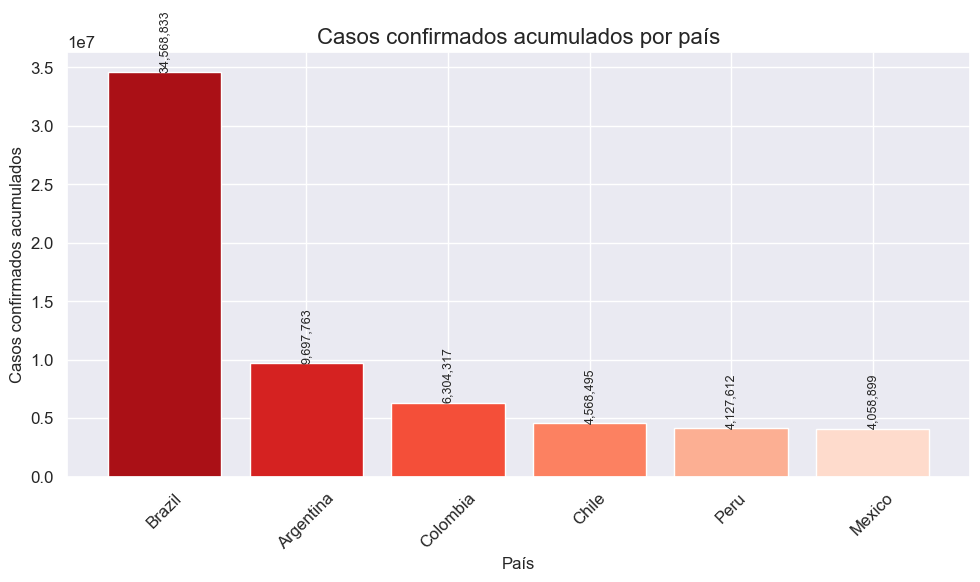

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar y ordenar por casos confirmados acumulados de mayor a menor
casos_acumulados = df.groupby('country_name')['cumulative_confirmed'].max().sort_values(ascending=False)

# Definir la paleta de rojos de menor a mayor intensidad (manteniendo correspondencia con los valores)
reds = sns.color_palette("Reds", n_colors=len(casos_acumulados))
reds = reds[::-1]  # Invertimos para que el más intenso quede a la izquierda

plt.figure(figsize=(10,6))
bars = plt.bar(casos_acumulados.index, casos_acumulados.values, color=reds)

plt.title('Casos confirmados acumulados por país', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Casos confirmados acumulados', fontsize=12)
plt.xticks(rotation=45)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f'{int(bar.get_height()):,}',
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=90
    )

plt.tight_layout()
plt.show()


# --------------------------------------------------------------

Matriz de correlación con submáscara y filtro (>0.5)

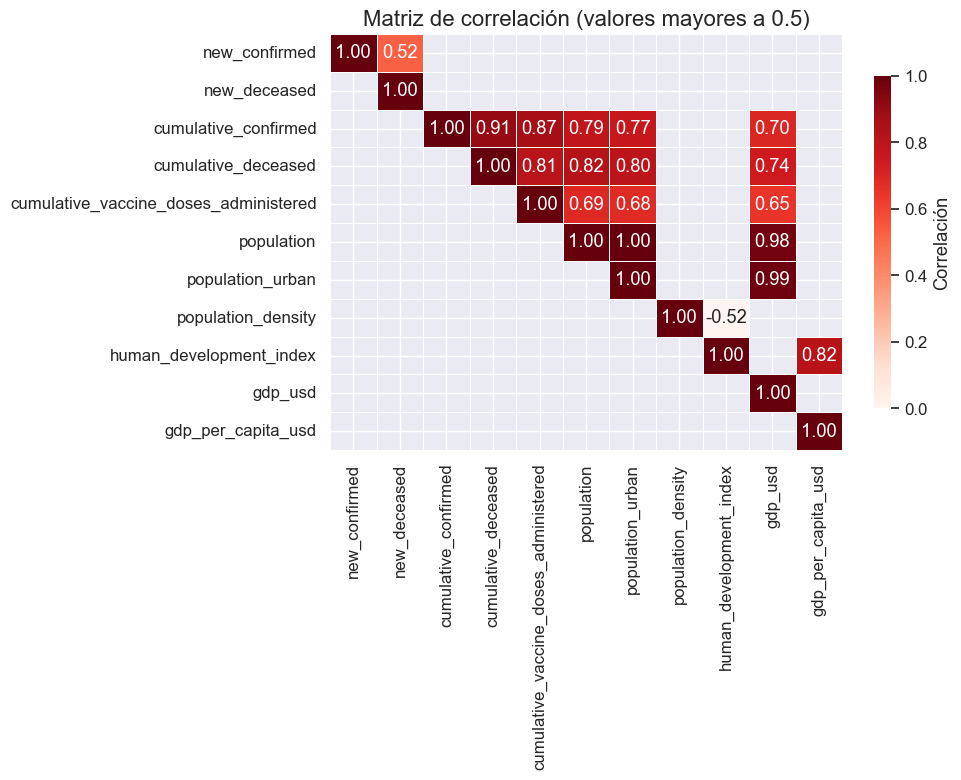

In [28]:


#  Selecciono solo variables numéricas relevantes para la correlación
vars_corr = [
    'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
    'cumulative_vaccine_doses_administered', 'population', 'population_urban',
    'population_density', 'human_development_index', 'gdp_usd', 'gdp_per_capita_usd'
]

# 2. Calculo la matriz de correlación
corr_matrix = df[vars_corr].corr()

# 3. Creo la máscara para solo mostrar la parte superior (triangular)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 4. Filtro solo valores > 0.5 (dejando el resto en blanco)
corr_filtered = corr_matrix.where(corr_matrix.abs() > 0.5)

# 5. Paleta personalizada en tonos de rojo
reds = sns.color_palette("Reds", as_cmap=True)

plt.figure(figsize=(10,8))
sns.heatmap(
    corr_filtered,
    mask=~mask,                  # Solo la triangular superior
    annot=True,
    fmt='.2f',
    cmap=reds,
    vmin=0, vmax=1,              # Rango de 0 a 1 para coherencia en color
    linewidths=.5,
    cbar_kws={"shrink": .8, "label": "Correlación"}
)

plt.title('Matriz de correlación (valores mayores a 0.5)', fontsize=16)
plt.tight_layout()
plt.show()


Sólo se muestran correlaciones mayores a 0.5 (positivas o negativas).

Cuanto más intenso el rojo, mayor la correlación entre esas dos variables.

Así podés detectar relaciones fuertes entre variables importantes (por ejemplo, entre casos confirmados y población).



# --------------------------------------------------------------

## Histogramas de las variables que “sí” tengan cambios de valores

Visualizar la distribución de variables numéricas relevantes, para entender su comportamiento y detectar posibles sesgos o outliers.

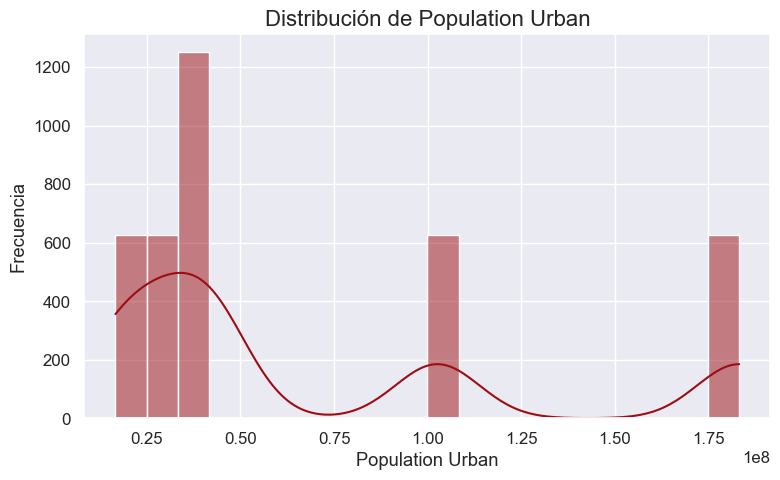

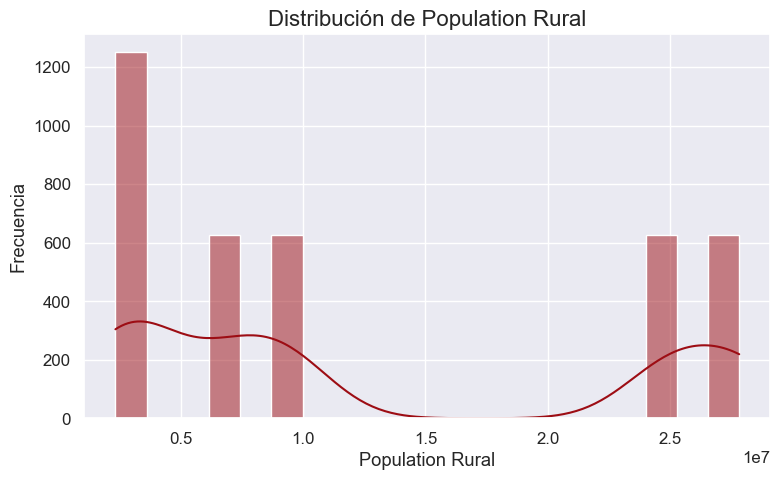

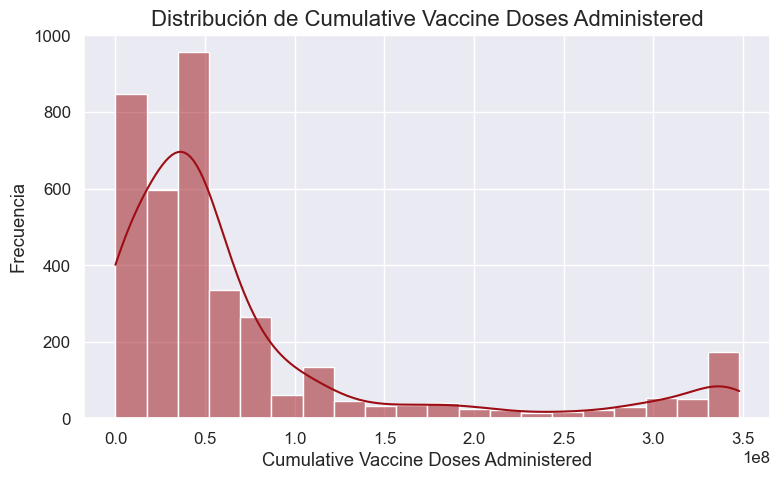

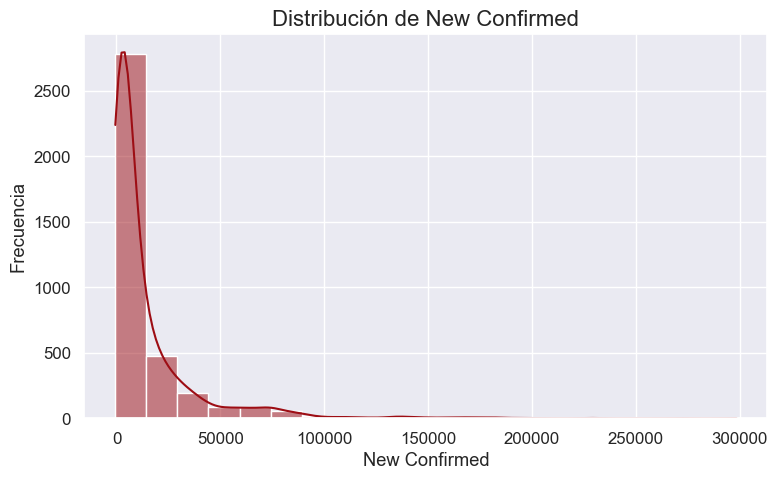

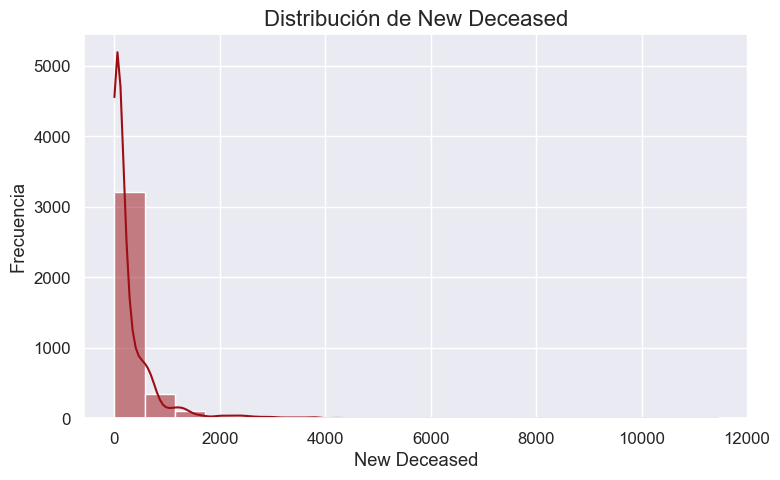

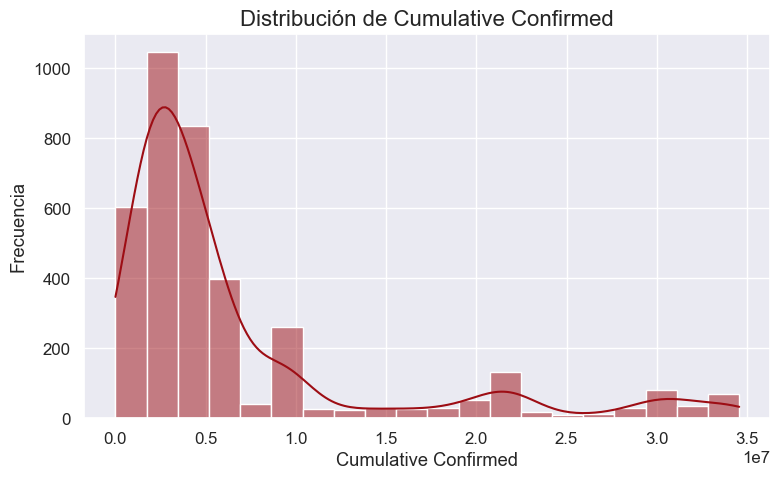

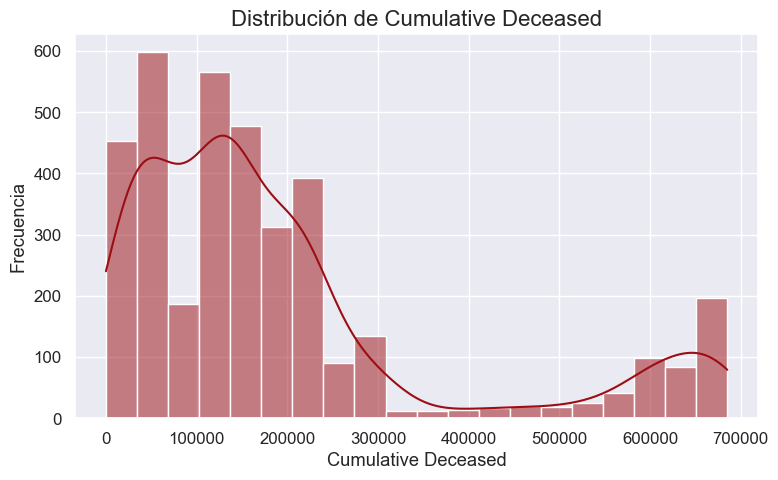

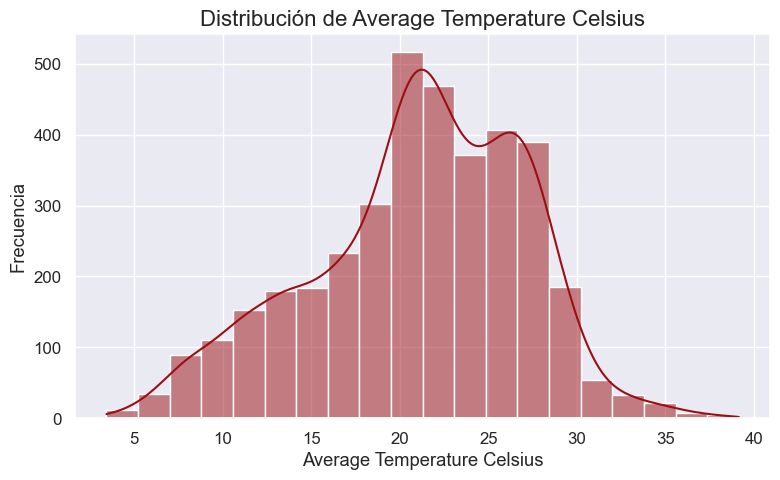

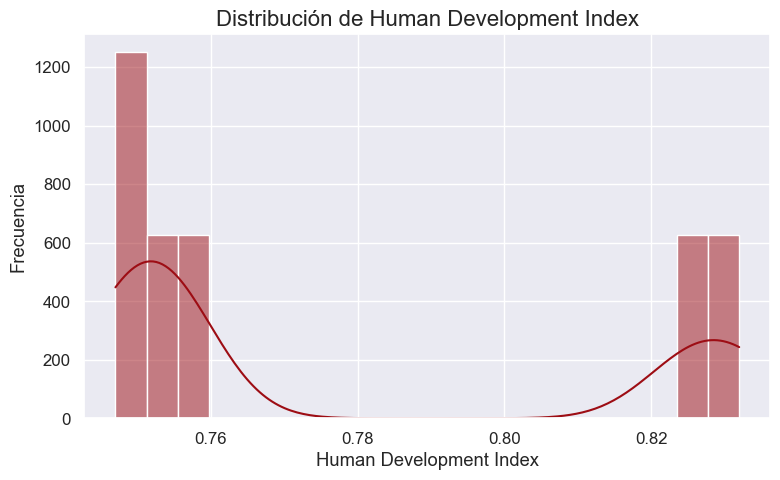

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de variables numéricas
variables_hist = [
    'population_urban', 'population_rural', 'cumulative_vaccine_doses_administered',
    'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
    'average_temperature_celsius', 'human_development_index'
]

# Loop para graficar sólo si hay más de un valor distinto
for variable in variables_hist:
    if df[variable].nunique() > 1:
        plt.figure(figsize=(8,5))
        sns.histplot(
            df[variable].dropna(),
            bins=20,
            kde=True,
            color=sns.color_palette("Reds", n_colors=8)[-1]
        )
        plt.title(f'Distribución de {variable.replace("_", " ").title()}', fontsize=16)
        plt.xlabel(variable.replace("_", " ").title())
        plt.ylabel('Frecuencia')
        plt.tight_layout()
        plt.show()
    else:
        print(f"La variable '{variable}' no tiene cambios de valores.")


¿Qué se observa y qué se obtiene en los histogramas de tu dataset?
1. population_urban (Población urbana)
Qué muestra: La cantidad de habitantes urbanos registrados en cada país y/o fecha.

Qué observar: Si el gráfico tiene una gran concentración a la izquierda (bajos valores) y una cola larga hacia la derecha, significa que la mayoría de los registros tienen poblaciones urbanas relativamente bajas, pero hay algunos países (como Brasil, México, Argentina) con ciudades muy populosas.

Insight: Identificás qué tan “urbano” es el conjunto de países, detectando outliers (casos con muchísima población urbana).

2. population_rural (Población rural)
Qué muestra: Habitantes en zonas rurales.

Qué observar: La forma puede indicar si los países tienen mucha población dispersa en el campo, o si predomina lo urbano. Si hay picos altos cerca del cero y pocos valores altos, la mayoría vive en ciudades.

Insight: Esto ayuda a saber dónde sería más útil ubicar laboratorios o centros de vacunación (ciudad vs campo).

3. cumulative_vaccine_doses_administered (Dosis de vacuna acumuladas)
Qué muestra: Número de dosis acumuladas registradas.

Qué observar: Una curva sesgada indica que la mayoría de los registros tienen pocas dosis acumuladas (probablemente fechas tempranas), y solo al final aparecen valores muy altos (cuando ya se vacunó a mucha gente).

Insight: El crecimiento es exponencial al principio, luego se estabiliza. Sirve para analizar el ritmo de vacunación.

4. new_confirmed (Nuevos casos confirmados diarios)
Qué muestra: Casos diarios reportados.

Qué observar: Si el histograma tiene un gran pico en valores bajos y una larga cola derecha, indica que la mayoría de los días hubo pocos casos nuevos, pero en picos (olas de contagio) aparecen días con miles de casos.

Insight: Los días de “ola” o brote sobresalen, se pueden detectar outliers o anomalías.

5. new_deceased (Nuevos fallecidos diarios)
Qué muestra: Nuevas muertes reportadas cada día.

Qué observar: Similar a “new_confirmed”, la mayoría de los días tienen pocas muertes, pero hay días con picos altos (situaciones críticas).

Insight: Ayuda a visualizar cuán mortal fue la pandemia y cuándo ocurrieron los picos.

6. cumulative_confirmed (Casos confirmados acumulados)
Qué muestra: Total acumulado de casos en cada registro.

Qué observar: Un histograma sesgado indica que muchos registros son de fechas donde el acumulado era bajo (al principio de la pandemia), y solo al final de la serie aparece el gran valor acumulado.

Insight: Visualizas la progresión de la pandemia; ves el avance de la curva de contagios.

7. cumulative_deceased (Muertes acumuladas)
Qué muestra: Total acumulado de muertes por registro.

Qué observar: Mismo análisis que “cumulative_confirmed”, con foco en la gravedad.

Insight: Sirve para comparar letalidad entre países y a lo largo del tiempo.

8. average_temperature_celsius (Temperatura media)
Qué muestra: Temperatura promedio del país/región.

Qué observar: Si el histograma está muy agrupado, los países tienen climas similares. Si está disperso, el clima varía mucho entre países.

Insight: Útil para analizar correlaciones con casos (¿más casos en climas fríos/cálidos?).

9. human_development_index (Índice de Desarrollo Humano)
Qué muestra: Nivel de desarrollo socioeconómico (0 a 1, donde 1 es lo más alto).

Qué observar: Si el histograma se concentra en valores altos, la mayoría de los países son más desarrollados; si hay dispersión, hay más desigualdad.

Insight: Puede relacionarse con respuesta sanitaria, infraestructura y capacidad de vacunación.

¿Qué se obtiene en general de estos histogramas?
Te muestran cómo se distribuye cada variable: dónde están los valores más frecuentes, si hay asimetría o valores atípicos, cómo varían los datos entre países y fechas.

Permiten detectar outliers (valores extremos).

Te ayudan a decidir si necesitas normalizar, transformar o segmentar los datos antes de otros análisis.

# --------------------------------------------------------------


# Diagrama de dispersión: temperatura media vs. casos confirmados

Objetivo:
Ver si existe alguna relación o patrón visual entre la temperatura promedio y la cantidad de casos confirmados en los países analizados.



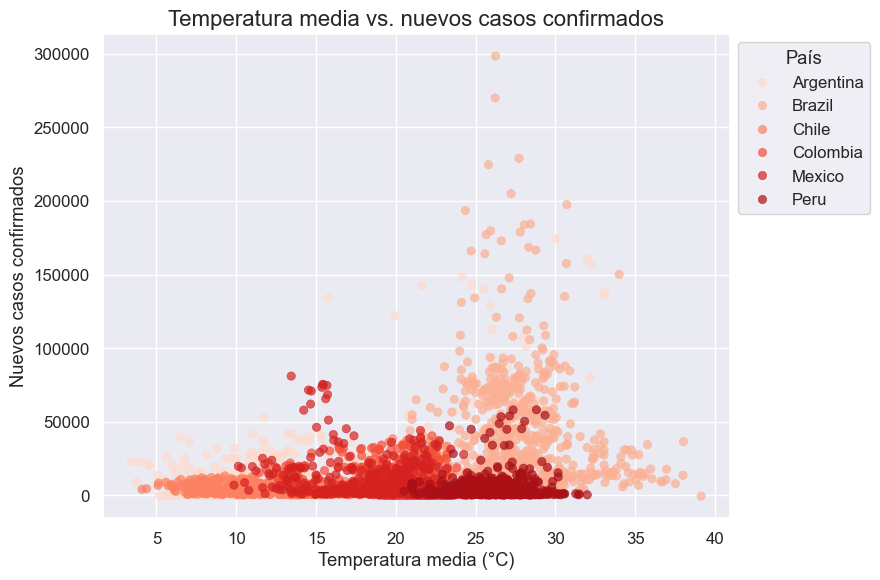

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,6))

# Crear el scatterplot
sns.scatterplot(
    data=df,
    x='average_temperature_celsius',
    y='new_confirmed',
    hue='country_name',                   # Diferenciar países (opcional)
    palette="Reds",                       # Paleta consistente
    alpha=0.7,
    edgecolor=None
)

plt.title('Temperatura media vs. nuevos casos confirmados', fontsize=16)
plt.xlabel('Temperatura media (°C)')
plt.ylabel('Nuevos casos confirmados')
plt.legend(title='País', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


¿Qué muestra este gráfico?
Estructura del gráfico
Eje X: Temperatura media (°C) de cada país o región, en cada registro (puede ser por día o período).

Eje Y: Nuevos casos confirmados de COVID-19 reportados ese mismo día en ese país.

Color: Diferenciamos países con distintos tonos de rojo para facilitar la lectura (aunque la consigna es usar rojo, así que todos están dentro de la gama, pero cada país tiene un tono diferente por el argumento hue).

¿Qué podés observar en este gráfico?
1. Tendencia general
Si ves que los puntos más altos en nuevos casos se concentran en el rango de temperaturas más bajas, podrías inferir una relación inversa: en climas más fríos hubo más casos.

Si los puntos están muy dispersos (sin una tendencia clara), significa que no hay una relación fuerte entre la temperatura y los casos nuevos.

2. Agrupación por país
Si se forman "nubes" o clusters de puntos por país (cada país queda en un sector específico del gráfico), podés notar diferencias regionales: algunos países tienen temperaturas más altas o bajas que otros, y diferentes niveles de casos.

Si ves que todos los países tienen puntos en todo el rango de temperatura, significa que dentro de cada país también hay mucha variación climática y de casos.

3. Outliers y valores extremos
Puntos muy alejados del resto (por ejemplo, muchos casos con temperaturas muy altas o bajas) pueden señalar fechas especiales (pico de ola, eventos anómalos).

Esos outliers pueden motivar a investigar causas (fiestas, eventos, políticas locales, etc).

4. Interpretación y contexto
Si la nube de puntos tiene forma de “nube” sin pendiente definida: la temperatura no explica la variación de los casos, al menos en este rango y periodo.

Si hay una línea descendente clara: a mayor temperatura, menos casos (posible relación inversa).

Si hay una línea ascendente: a mayor temperatura, más casos (posible relación directa).

En la mayoría de datasets COVID, lo común es ver poca correlación clara entre temperatura y casos (hay muchos otros factores más importantes, como movilidad, vacunación, variantes, etc), pero puede haber excepciones regionales o estacionales.

¿Qué conclusiones podés sacar?
Si no hay patrón claro: La temperatura no parece tener un impacto directo sobre los casos nuevos de COVID-19 en los países analizados.

Si hay patrón: Podrías justificar explorar variables climáticas como parte de la planificación, pero siempre complementando con otros indicadores.



Conclusión:
A partir del diagrama de dispersión, se observa que no existe una relación clara o consistente entre la temperatura media y la cantidad de nuevos casos confirmados de COVID-19 en los países analizados.
Los puntos se encuentran distribuidos de manera dispersa en todo el rango de temperaturas, lo que sugiere que la variable climática, al menos en este contexto y periodo, no es un factor determinante en el número de contagios diarios.
Por lo tanto, para la planificación estratégica, otros indicadores sociales y epidemiológicos resultan más relevantes que la temperatura ambiente.

# -----------------------------------------------------------

# Diagrama de dispersión: temperatura media vs. muertes confirmadas

Objetivo:
Buscar si existe algún patrón, correlación o tendencia entre la temperatura promedio y el número de muertes confirmadas por COVID-19.

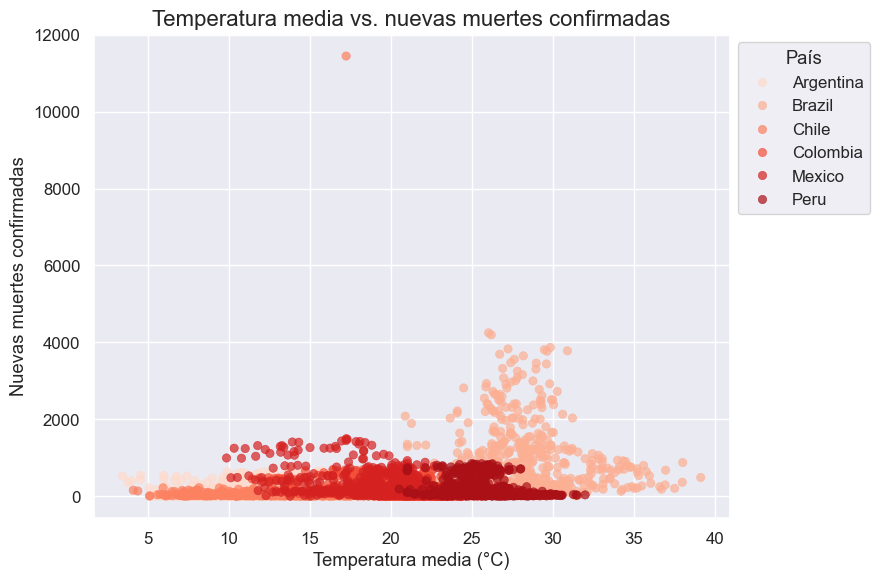

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,6))

sns.scatterplot(
    data=df,
    x='average_temperature_celsius',
    y='new_deceased',
    hue='country_name',         # Diferenciar países con tonos dentro de los rojos
    palette="Reds",
    alpha=0.7,
    edgecolor=None
)

plt.title('Temperatura media vs. nuevas muertes confirmadas', fontsize=16)
plt.xlabel('Temperatura media (°C)')
plt.ylabel('Nuevas muertes confirmadas')
plt.legend(title='País', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


¿Qué muestra este gráfico?
Cada punto: una observación (país y fecha).

Eje X: Temperatura media.

Eje Y: Nuevas muertes confirmadas ese día.

Colores: Diferentes tonos de rojo para cada país.

¿Cómo interpretarlo?
Si la nube de puntos es dispersa, no hay una relación fuerte entre temperatura y muertes.

Si hay una pendiente o agrupación, puede sugerir una posible relación.

Outliers pueden indicar eventos particulares de alta mortalidad.

Conclusión:
El diagrama de dispersión no revela una tendencia definida entre la temperatura media y la cantidad de nuevas muertes confirmadas por COVID-19 en los países analizados.
Los datos se distribuyen de manera dispersa a lo largo de todo el rango de temperaturas, lo que indica que, al igual que con los casos confirmados, la temperatura ambiente no muestra una relación directa significativa con el número de fallecimientos diarios.
Por lo tanto, la mortalidad por COVID-19 parece estar influida por otros factores, como la infraestructura sanitaria, la vacunación o las políticas de salud pública, más que por las variaciones climáticas.

# ----------------------------------------------------------------

#  Gráfico de barras: Promedio de dosis administradas por país


Comparar el valor medio (promedio) de las dosis administradas de vacunas COVID-19 en cada país.



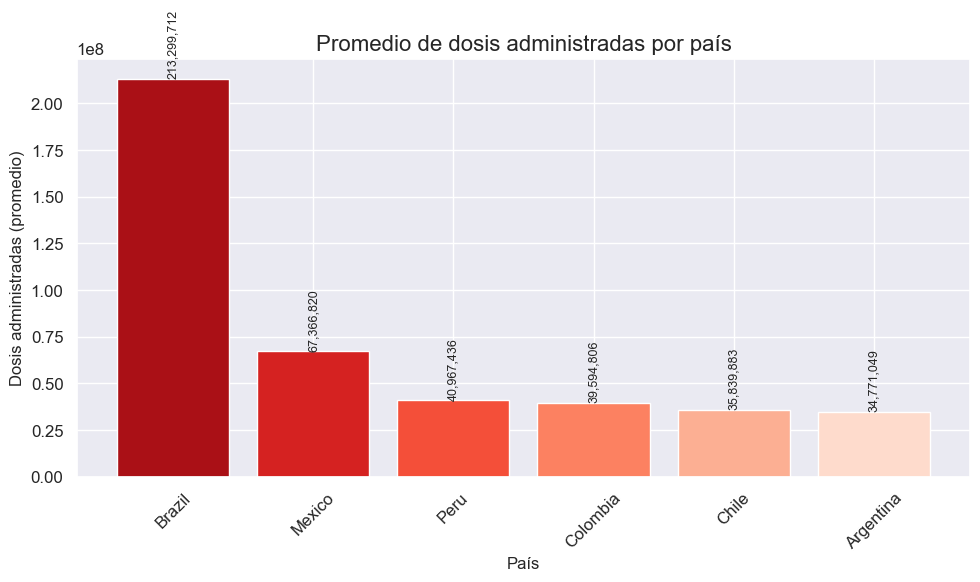

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el valor medio de las dosis administradas por país
dosis_media = df.groupby('country_name')['cumulative_vaccine_doses_administered'].mean().sort_values(ascending=False)

# Paleta de rojos: más intenso a la izquierda
reds = sns.color_palette("Reds", n_colors=len(dosis_media))
reds = reds[::-1]

plt.figure(figsize=(10,6))
bars = plt.bar(dosis_media.index, dosis_media.values, color=reds)

plt.title('Promedio de dosis administradas por país', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Dosis administradas (promedio)', fontsize=12)
plt.xticks(rotation=45)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f'{int(bar.get_height()):,}',
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=90
    )

plt.tight_layout()
plt.show()


¿Qué muestra este gráfico?
Cada barra: un país.

Altura: promedio de dosis acumuladas administradas durante el periodo.

Color rojo: más intenso para países con mayor promedio.

Orden: país con mayor media a la izquierda.



Conclusión:
El gráfico de barras revela que existen diferencias significativas en el promedio de dosis administradas entre los países analizados.
Algunos países, como Brasil y México, presentan un promedio considerablemente más alto de dosis aplicadas, lo que puede deberse a una mayor capacidad logística, tamaño poblacional o políticas de vacunación más efectivas.
Por el contrario, otros países muestran valores promedio más bajos, lo que podría reflejar desafíos en la distribución, acceso o aceptación de la vacuna.
Estos resultados permiten identificar cuáles países han logrado mayor avance relativo en la administración de vacunas, aportando información clave para la toma de decisiones sobre futuras estrategias sanitarias.

# ------------------------------------------------------------------

Evolución de dosis administradas por mes de cada país (líneas)

 Objetivo:
Visualizar cómo evolucionó, mes a mes, la cantidad de dosis acumuladas administradas en cada país.
Esto permite ver el ritmo de vacunación y comparar tendencias entre países.

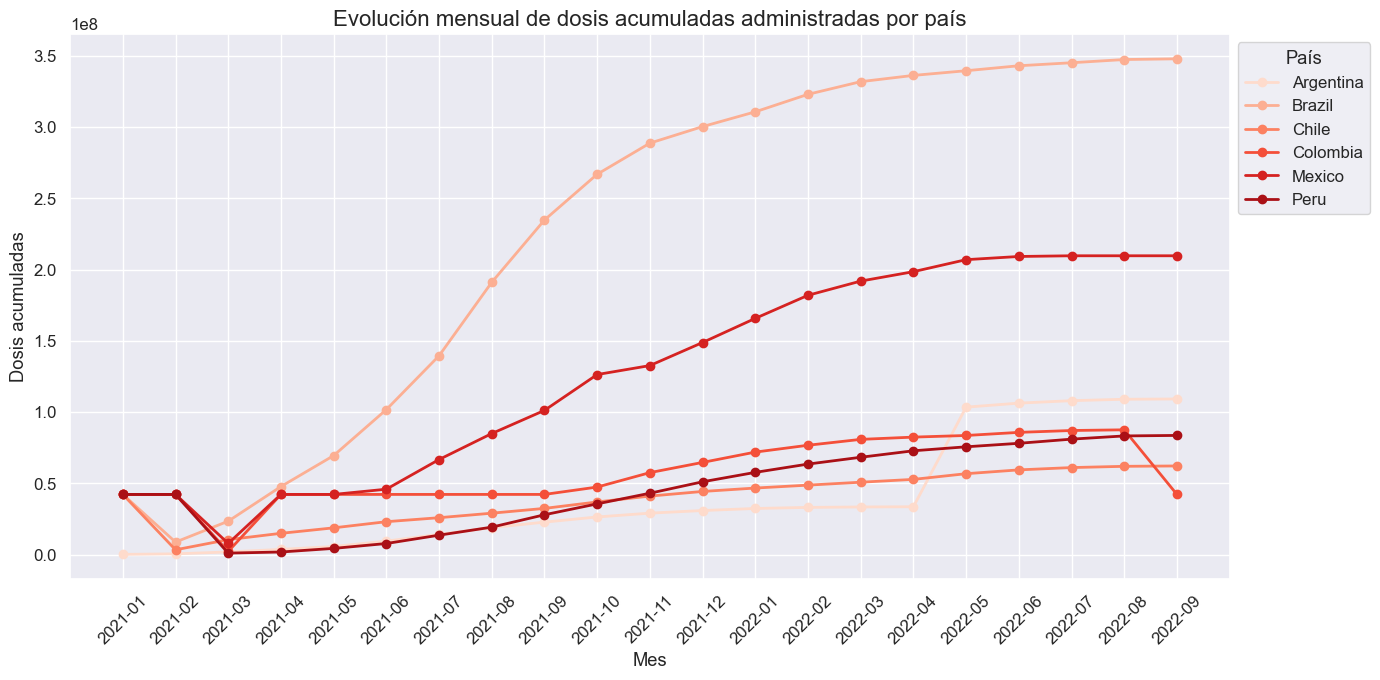

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Aseguramos que la columna 'date' sea tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Creamos una columna auxiliar de 'año-mes'
df['year_month'] = df['date'].dt.to_period('M')

# Agrupamos por país y mes, tomando el valor máximo del mes para acumulado
evolucion = df.groupby(['country_name', 'year_month'])['cumulative_vaccine_doses_administered'].max().reset_index()

# Preparamos el gráfico
plt.figure(figsize=(14,7))

# Elegimos la paleta de rojos según la cantidad de países
countries = evolucion['country_name'].unique()
reds = sns.color_palette("Reds", n_colors=len(countries))
colors = {pais: reds[i] for i, pais in enumerate(countries)}

# Graficamos la evolución mensual para cada país
for pais in countries:
    data = evolucion[evolucion['country_name'] == pais]
    plt.plot(data['year_month'].astype(str), data['cumulative_vaccine_doses_administered'],
             marker='o', label=pais, color=colors[pais], linewidth=2)

plt.title('Evolución mensual de dosis acumuladas administradas por país', fontsize=16)
plt.xlabel('Mes')
plt.ylabel('Dosis acumuladas')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


¿Qué muestra este gráfico?
Eje X: Meses.

Eje Y: Dosis acumuladas administradas.

Una línea por país: permite comparar el ritmo de avance de la vacunación entre países.

Colores en la gama de rojos: manteniendo la coherencia estética.

Conclusión:
El gráfico muestra que el ritmo de vacunación ha sido muy diferente entre países a lo largo del tiempo.
Se observan países que lograron un crecimiento sostenido y acelerado en la administración de dosis (por ejemplo, Brasil y México), alcanzando altos niveles de cobertura en pocos meses, mientras que otros presentaron un crecimiento más gradual.
Además, se aprecian momentos específicos en los que la vacunación se aceleró significativamente, lo cual puede deberse a campañas nacionales, llegada de nuevas dosis o ampliación de la elegibilidad.
Estas tendencias permiten identificar tanto buenas prácticas como posibles desafíos logísticos en el proceso de inmunización, aportando información valiosa para la planificación de estrategias futuras.

# --------------------------------------------------------------------

 Muertes por mes de cada país (líneas)

Objetivo:
Visualizar cómo evolucionó la cantidad de muertes mensuales por COVID-19 en cada país, para comparar el impacto y las tendencias a lo largo del tiempo.

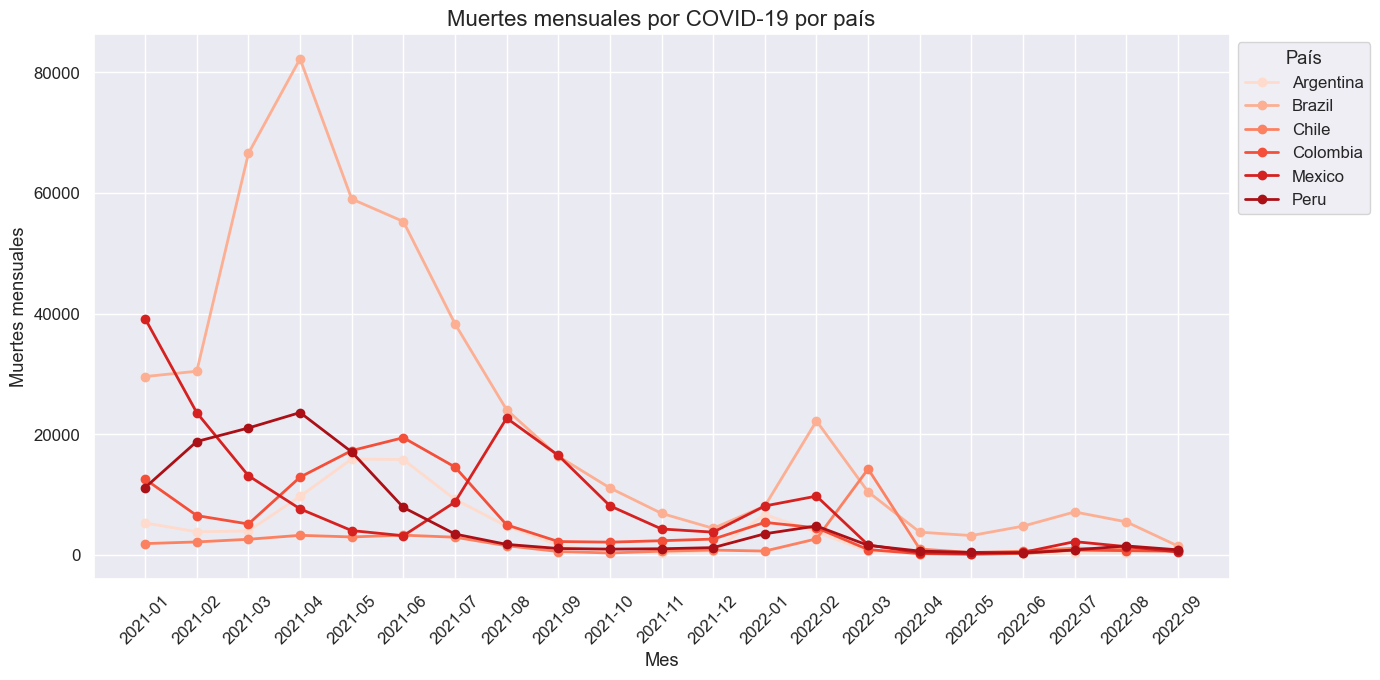

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Si no lo hiciste antes:
# df['date'] = pd.to_datetime(df['date'])
# df['year_month'] = df['date'].dt.to_period('M')

# Agrupamos por país y mes, sumando las muertes nuevas del mes
muertes_mensuales = df.groupby(['country_name', 'year_month'])['new_deceased'].sum().reset_index()

plt.figure(figsize=(14,7))

countries = muertes_mensuales['country_name'].unique()
reds = sns.color_palette("Reds", n_colors=len(countries))
colors = {pais: reds[i] for i, pais in enumerate(countries)}

for pais in countries:
    data = muertes_mensuales[muertes_mensuales['country_name'] == pais]
    plt.plot(data['year_month'].astype(str), data['new_deceased'],
             marker='o', label=pais, color=colors[pais], linewidth=2)

plt.title('Muertes mensuales por COVID-19 por país', fontsize=16)
plt.xlabel('Mes')
plt.ylabel('Muertes mensuales')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


¿Qué muestra este gráfico?
Eje X: Meses.

Eje Y: Cantidad total de muertes por COVID-19 en ese mes.

Una línea por país: permite comparar el impacto de la pandemia en cada país a lo largo del tiempo.

Paleta de rojos: coherente con el resto de los gráficos.



Conclusión:
El gráfico evidencia que la cantidad de muertes mensuales por COVID-19 varió notablemente entre los países analizados y a lo largo del tiempo.
Se observan picos claros en determinados meses, asociados a las olas de contagio más intensas, seguidos por períodos de disminución, posiblemente vinculados al avance de la vacunación y la aplicación de medidas sanitarias.
La magnitud y el momento de estos picos difieren según el país, reflejando diferencias en la gestión de la pandemia, la capacidad del sistema de salud y la respuesta social.
Este análisis temporal resulta clave para comprender el impacto de la pandemia y orientar futuras estrategias de salud pública en la región.

# -----------------------------------------------------------------------

# Casos confirmados por mes de cada país (líneas)

Objetivo:
Visualizar la evolución mensual de casos confirmados por COVID-19 en cada país, para identificar tendencias, picos y diferencias entre países.

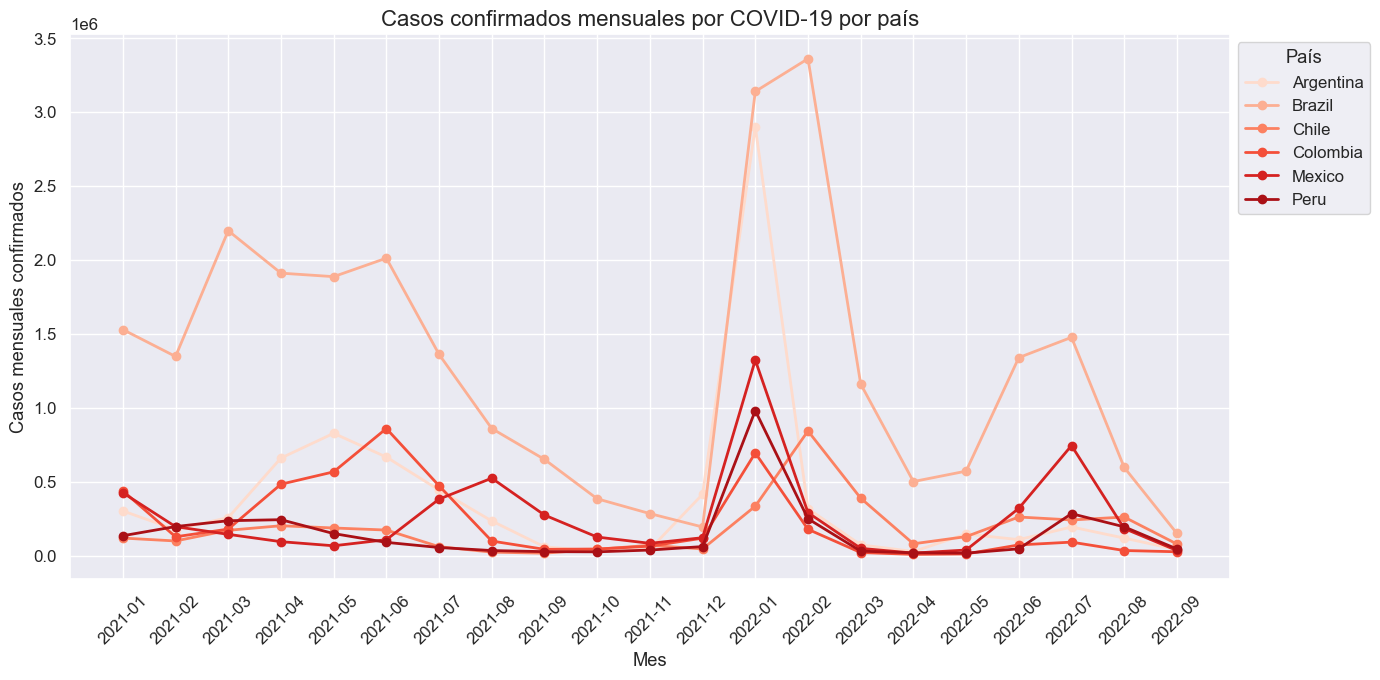

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por país y mes, sumando los nuevos casos confirmados del mes
casos_mensuales = df.groupby(['country_name', 'year_month'])['new_confirmed'].sum().reset_index()

plt.figure(figsize=(14,7))

countries = casos_mensuales['country_name'].unique()
reds = sns.color_palette("Reds", n_colors=len(countries))
colors = {pais: reds[i] for i, pais in enumerate(countries)}

for pais in countries:
    data = casos_mensuales[casos_mensuales['country_name'] == pais]
    plt.plot(data['year_month'].astype(str), data['new_confirmed'],
             marker='o', label=pais, color=colors[pais], linewidth=2)

plt.title('Casos confirmados mensuales por COVID-19 por país', fontsize=16)
plt.xlabel('Mes')
plt.ylabel('Casos mensuales confirmados')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


¿Qué muestra este gráfico?
Eje X: Meses del análisis.

Eje Y: Total de casos confirmados ese mes en cada país.

Una línea por país: compara evolución y severidad de la pandemia.

Paleta de rojos: mantiene coherencia visual con el resto del informe.



Conclusión:
El análisis de casos confirmados mensuales revela que la dinámica de la pandemia fue distinta en cada país, tanto en el número total de casos como en el momento de los picos.
Algunos países experimentaron brotes de mayor magnitud en determinados meses, reflejados en ascensos abruptos de las curvas, mientras que otros presentaron evoluciones más graduales o prolongadas en el tiempo.
Estas diferencias pueden estar relacionadas con la implementación de políticas sanitarias, la movilidad social, la aparición de variantes y la respuesta de los sistemas de salud.
La visualización permite identificar períodos críticos y valorar el impacto de las medidas implementadas, proporcionando información clave para la toma de decisiones en futuras emergencias epidemiológicas.

# ----------------------------------------------------------------------

# Recuperaciones de casos por mes de cada país (líneas) ('new_recovered'borrada)

Objetivo:
Visualizar cómo evolucionaron, mes a mes, las recuperaciones de casos de COVID-19 en cada país, para comparar la recuperación sanitaria a lo largo del tiempo.

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por país y mes, sumando los nuevos recuperados del mes
recuperaciones_mensuales = df.groupby(['country_name', 'year_month'])['new_recovered'].sum().reset_index()

plt.figure(figsize=(14,7))

countries = recuperaciones_mensuales['country_name'].unique()
reds = sns.color_palette("Reds", n_colors=len(countries))
colors = {pais: reds[i] for i, pais in enumerate(countries)}

for pais in countries:
    data = recuperaciones_mensuales[recuperaciones_mensuales['country_name'] == pais]
    plt.plot(data['year_month'].astype(str), data['new_recovered'],
             marker='o', label=pais, color=colors[pais], linewidth=2)

plt.title('Recuperaciones mensuales por COVID-19 por país', fontsize=16)
plt.xlabel('Mes')
plt.ylabel('Recuperaciones mensuales')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()



KeyError: 'Column not found: new_recovered'

# -------------------------------------------------------------------

# Comparación del número de casos nuevos entre países (gráfico de barras)

Objetivo:
Comparar el total de casos nuevos confirmados en cada país durante todo el período analizado, usando un gráfico de barras para visualizar la magnitud de la pandemia en cada nación.



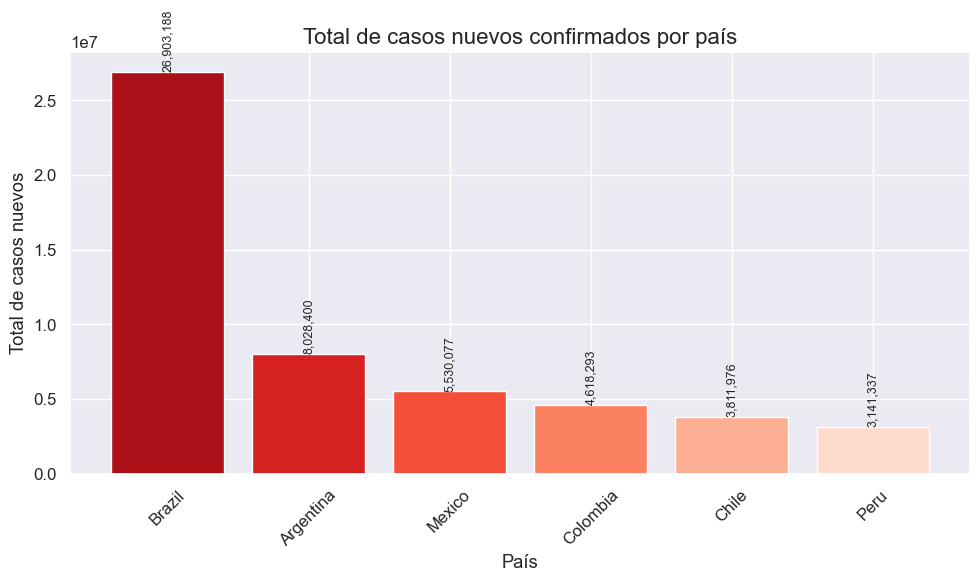

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sumar los casos nuevos totales por país
casos_nuevos_totales = df.groupby('country_name')['new_confirmed'].sum().sort_values(ascending=False)

# Paleta de rojos: más intenso para el país con más casos
reds = sns.color_palette("Reds", n_colors=len(casos_nuevos_totales))
reds = reds[::-1]

plt.figure(figsize=(10,6))
bars = plt.bar(casos_nuevos_totales.index, casos_nuevos_totales.values, color=reds)

plt.title('Total de casos nuevos confirmados por país', fontsize=16)
plt.xlabel('País')
plt.ylabel('Total de casos nuevos')
plt.xticks(rotation=45)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f'{int(bar.get_height()):,}',
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=90
    )

plt.tight_layout()
plt.show()


Conclusión:
El gráfico de barras muestra diferencias marcadas en el número total de casos nuevos confirmados entre los países analizados.
Algunos países presentan cifras notablemente superiores, lo que puede estar asociado al tamaño de la población, densidad urbana, nivel de testeo, movilidad social o diferencias en la gestión de la pandemia.
La visualización facilita la identificación rápida de los países más afectados y destaca la necesidad de estrategias diferenciadas de prevención y control en función del impacto que tuvo el COVID-19 en cada contexto nacional.

# ----------------------------------------------------------------------

# Dosis acumuladas por país (gráfico de barras)

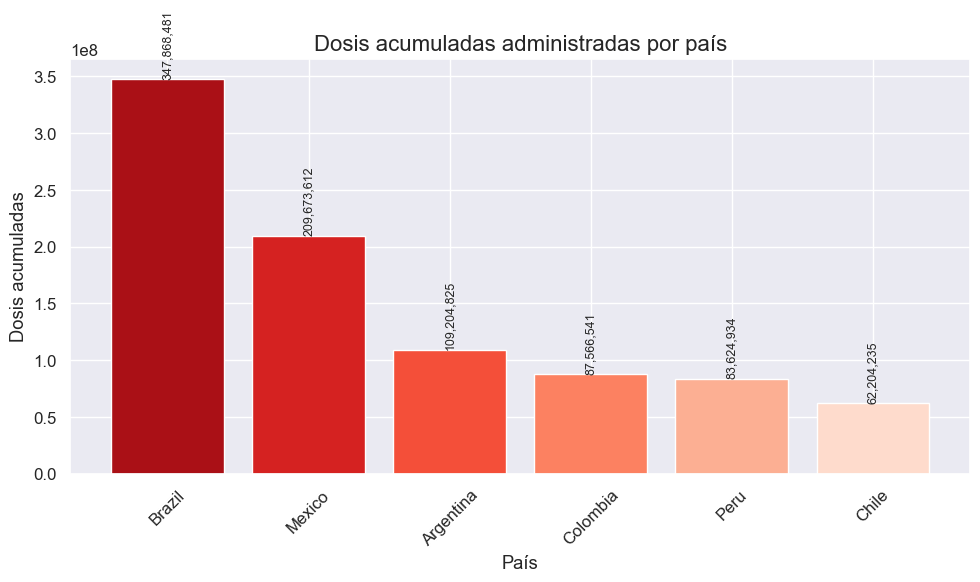

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tomamos el valor máximo de dosis acumuladas por país
dosis_acumuladas = df.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

reds = sns.color_palette("Reds", n_colors=len(dosis_acumuladas))
reds = reds[::-1]

plt.figure(figsize=(10,6))
bars = plt.bar(dosis_acumuladas.index, dosis_acumuladas.values, color=reds)

plt.title('Dosis acumuladas administradas por país', fontsize=16)
plt.xlabel('País')
plt.ylabel('Dosis acumuladas')
plt.xticks(rotation=45)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f'{int(bar.get_height()):,}',
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=90
    )

plt.tight_layout()
plt.show()


Conclusión:
El gráfico destaca las diferencias en la cantidad total de dosis de vacunas administradas entre los países analizados.
Algunos países alcanzaron cifras mucho más altas, reflejando una mayor capacidad de adquisición, distribución y aplicación de vacunas, así como una respuesta sanitaria más robusta.
En cambio, otros países presentan un número acumulado significativamente menor, lo que puede estar asociado a limitaciones logísticas, factores socioeconómicos o dificultades en el acceso a la vacunación.
Esta visualización ayuda a identificar tanto logros como desafíos en la campaña de inmunización regional, lo que resulta fundamental para futuras estrategias de salud pública.

# ---------------------------------------------------------------------

# Boxplot de temperatura media de cada país

Objetivo:
Comparar la distribución de la temperatura media (°C) en cada país, visualizando diferencias, rango, valores típicos y posibles outliers.



C:\Users\Fernando\AppData\Local\Temp\ipykernel_16376\620057056.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


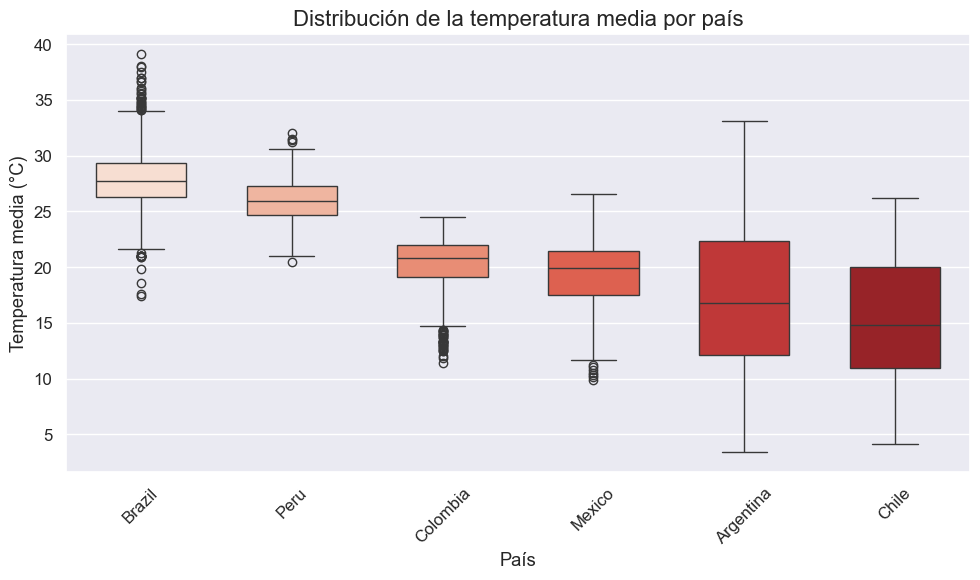

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

# Ordenar países por la mediana de temperatura media (para que el boxplot quede más visual)
orden = df.groupby('country_name')['average_temperature_celsius'].median().sort_values(ascending=False).index

sns.boxplot(
    data=df,
    x='country_name',
    y='average_temperature_celsius',
    order=orden,
    palette=sns.color_palette("Reds", n_colors=len(df['country_name'].unique())),
    width=0.6
)

plt.title('Distribución de la temperatura media por país', fontsize=16)
plt.xlabel('País')
plt.ylabel('Temperatura media (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Conclusión:
El boxplot permite comparar claramente la distribución y variabilidad de la temperatura media entre los países analizados.
Se observan diferencias notables en el rango de temperaturas, reflejando la diversidad climática de la región.
Algunos países presentan una temperatura media considerablemente más alta o baja que otros, y en ciertos casos aparecen outliers que indican registros atípicos o extremos.
Estos resultados pueden ser relevantes para interpretar otros fenómenos asociados, como la propagación estacional de enfermedades o la planificación de recursos en función del clima.

# ---------------------------------------------------------------------

# Violinplot de las variables que “sí” tengan cambios de valores

Objetivo:
Visualizar la distribución completa de variables numéricas relevantes por país, con mayor detalle que el boxplot, mostrando la densidad y forma de los datos.

C:\Users\Fernando\AppData\Local\Temp\ipykernel_16376\821947103.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


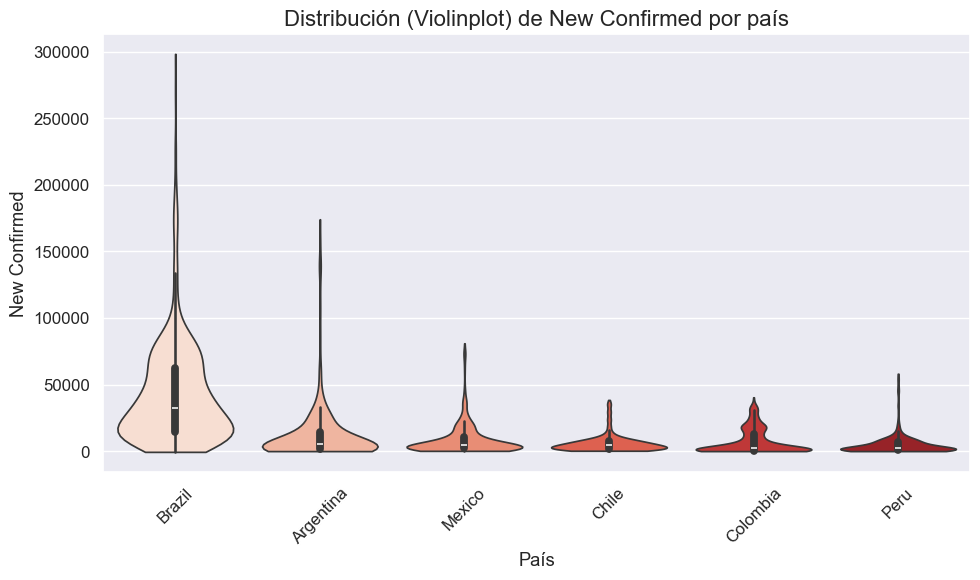

C:\Users\Fernando\AppData\Local\Temp\ipykernel_16376\821947103.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


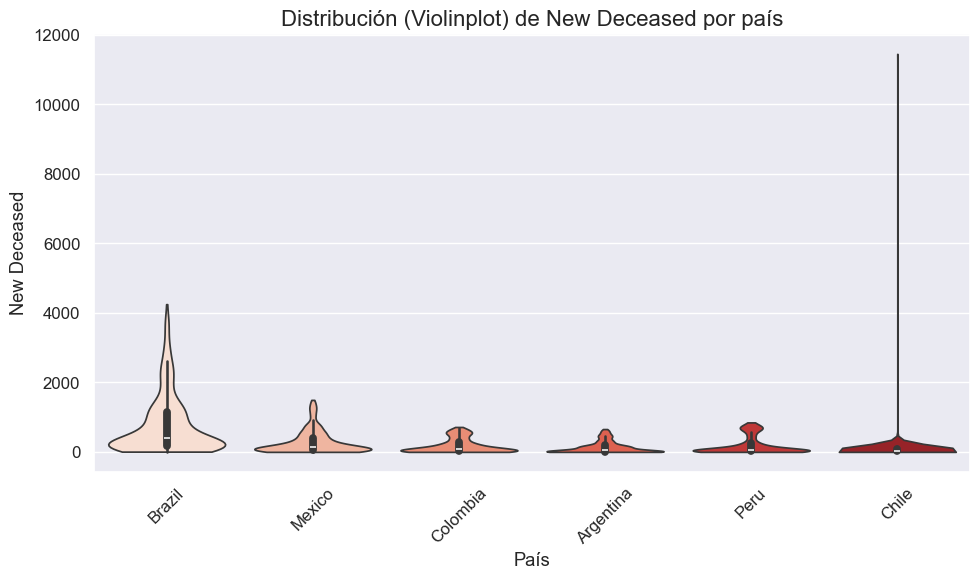

C:\Users\Fernando\AppData\Local\Temp\ipykernel_16376\821947103.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


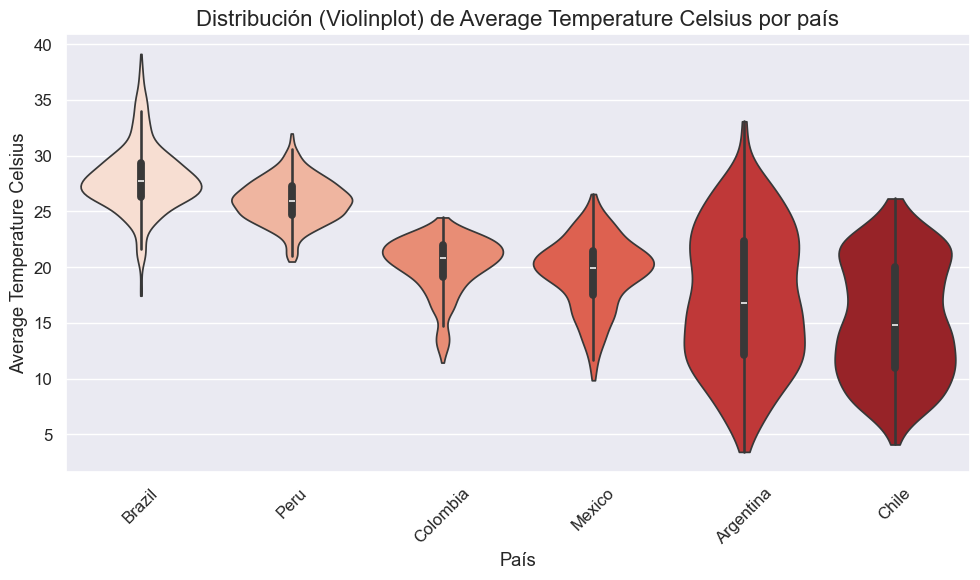

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Elegí las variables con cambios de valores relevantes
variables_violin = ['new_confirmed', 'new_deceased', 'average_temperature_celsius']

for variable in variables_violin:
    if df[variable].nunique() > 1:
        plt.figure(figsize=(10,6))
        orden = df.groupby('country_name')[variable].median().sort_values(ascending=False).index
        sns.violinplot(
            data=df,
            x='country_name',
            y=variable,
            order=orden,
            palette=sns.color_palette("Reds", n_colors=len(df['country_name'].unique())),
            cut=0
        )
        plt.title(f'Distribución (Violinplot) de {variable.replace("_", " ").title()} por país', fontsize=16)
        plt.xlabel('País')
        plt.ylabel(variable.replace("_", " ").title())
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"La variable '{variable}' no tiene cambios de valores.")


Conclusión:
Los violinplots ofrecen una visión detallada de la distribución y la densidad de las variables numéricas para cada país, permitiendo identificar no solo la mediana y el rango intercuartil, sino también la forma y concentración de los datos.
Se observa que la dispersión y los valores extremos difieren notablemente entre países, lo que evidencia distintas dinámicas epidemiológicas y sociales en cada contexto nacional.
Esta visualización resulta especialmente útil para detectar patrones poco comunes, asimetrías y posibles subgrupos en la distribución de los datos, enriqueciendo el análisis exploratorio y facilitando una interpretación más profunda de las diferencias entre países.

# ------------------------------------------------------------------

# Distribución de la población por grupos de edad (barras apiladas)

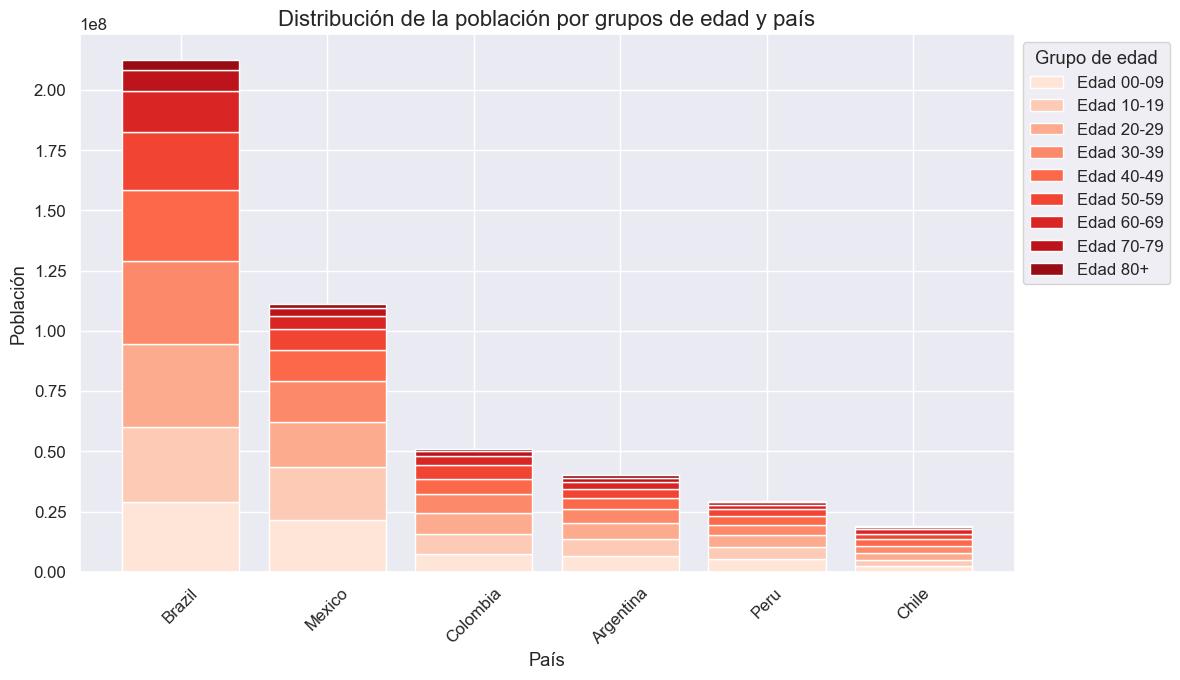

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Selección de grupos de edad (ajustá según tus columnas)
grupos_edad = [
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older'
]

# Sumamos por país (puede haber registros duplicados por fecha, tomamos el máximo por país)
df_edad = df.groupby('country_name')[grupos_edad].max()

# Orden de países (opcional, por población total)
orden = df_edad.sum(axis=1).sort_values(ascending=False).index

# Paleta de rojos degradados
reds = sns.color_palette("Reds", n_colors=len(grupos_edad))

plt.figure(figsize=(12,7))

bottom = np.zeros(len(df_edad))
for i, grupo in enumerate(grupos_edad):
    plt.bar(
        df_edad.loc[orden].index,
        df_edad.loc[orden][grupo],
        bottom=bottom,
        color=reds[i],
        label=grupo.replace('population_age_', 'Edad ').replace('_and_older', '+').replace('_', '-')
    )
    bottom += df_edad.loc[orden][grupo].values

plt.title('Distribución de la población por grupos de edad y país', fontsize=16)
plt.xlabel('País')
plt.ylabel('Población')
plt.xticks(rotation=45)
plt.legend(title='Grupo de edad', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


Conclusión:
El gráfico de barras apiladas evidencia las diferencias en la estructura demográfica de los países analizados.
Algunos países presentan una proporción mayor de población joven, mientras que otros destacan por un porcentaje relevante de adultos mayores.
Estas diferencias resultan fundamentales para la planificación de estrategias sanitarias, ya que ciertos grupos etarios pueden ser más vulnerables o prioritarios en campañas de vacunación y atención médica.
Además, el análisis demográfico aporta información clave para anticipar las necesidades de salud pública y orientar recursos según las características poblacionales de cada país.

# ------------------------------------------------------------------

# Mapa de calor de métricas por país (heatmap)

Comparar varias métricas clave (sanitarias, sociodemográficas, económicas) entre países usando un mapa de calor que destaque visualmente las diferencias.

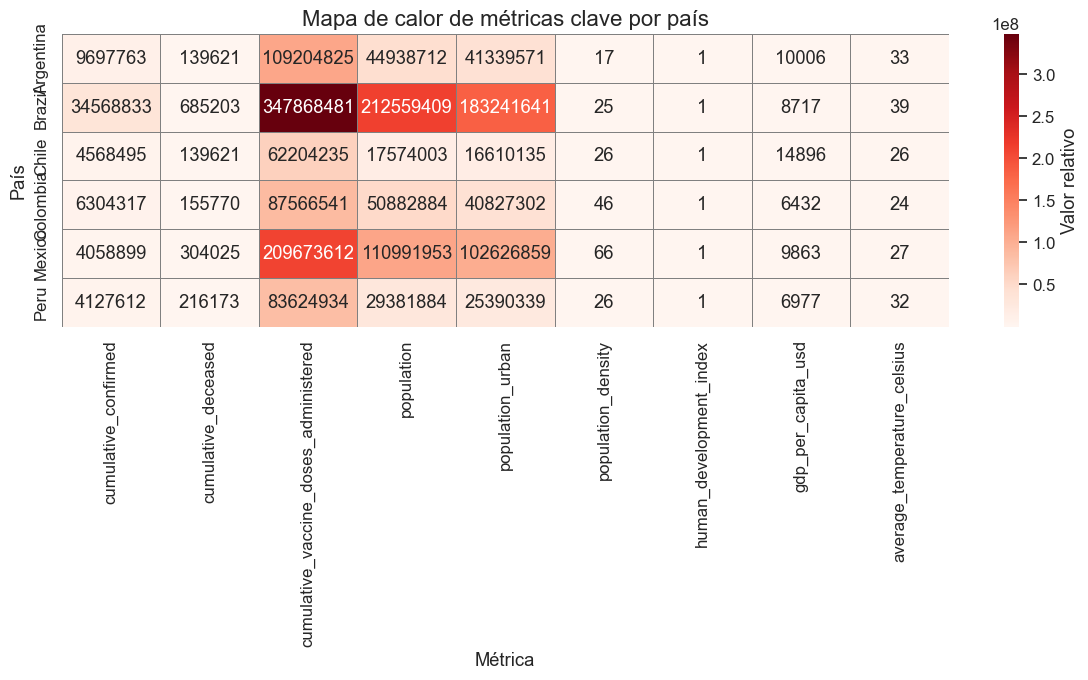

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos las métricas que quieras comparar (puedes ajustar la lista)
metricas = [
    'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered',
    'population', 'population_urban', 'population_density', 'human_development_index',
    'gdp_per_capita_usd', 'average_temperature_celsius'
]

# Tomamos el valor máximo por país para cada métrica
df_metricas = df.groupby('country_name')[metricas].max()

plt.figure(figsize=(12,7))
sns.heatmap(
    df_metricas,
    annot=True,
    fmt=".0f",
    cmap="Reds",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Valor relativo'}
)
plt.title('Mapa de calor de métricas clave por país', fontsize=16)
plt.xlabel('Métrica')
plt.ylabel('País')
plt.tight_layout()
plt.show()


Conclusión:
El mapa de calor facilita la comparación visual de distintas métricas sanitarias, demográficas y económicas entre los países analizados.
Se observan diferencias notables en variables como la cantidad acumulada de casos y muertes, el avance en la vacunación, el tamaño y densidad poblacional, así como en indicadores de desarrollo y clima.
Los tonos más intensos de rojo permiten identificar rápidamente qué países presentan los valores más altos en cada métrica, lo que es útil para detectar patrones regionales, desigualdades y posibles focos de atención prioritaria.
Este análisis multivariado aporta una visión integral para la toma de decisiones estratégicas en salud pública y planificación de recursos.

# ----------------------------------------------------------------

# Diagrama de barras apilado: comparación de la tasa de mortalidad masculina vs. femenina por país

Objetivo:
Comparar visualmente la tasa de mortalidad masculina y femenina en cada país, usando un gráfico de barras apiladas que resalte diferencias de género.



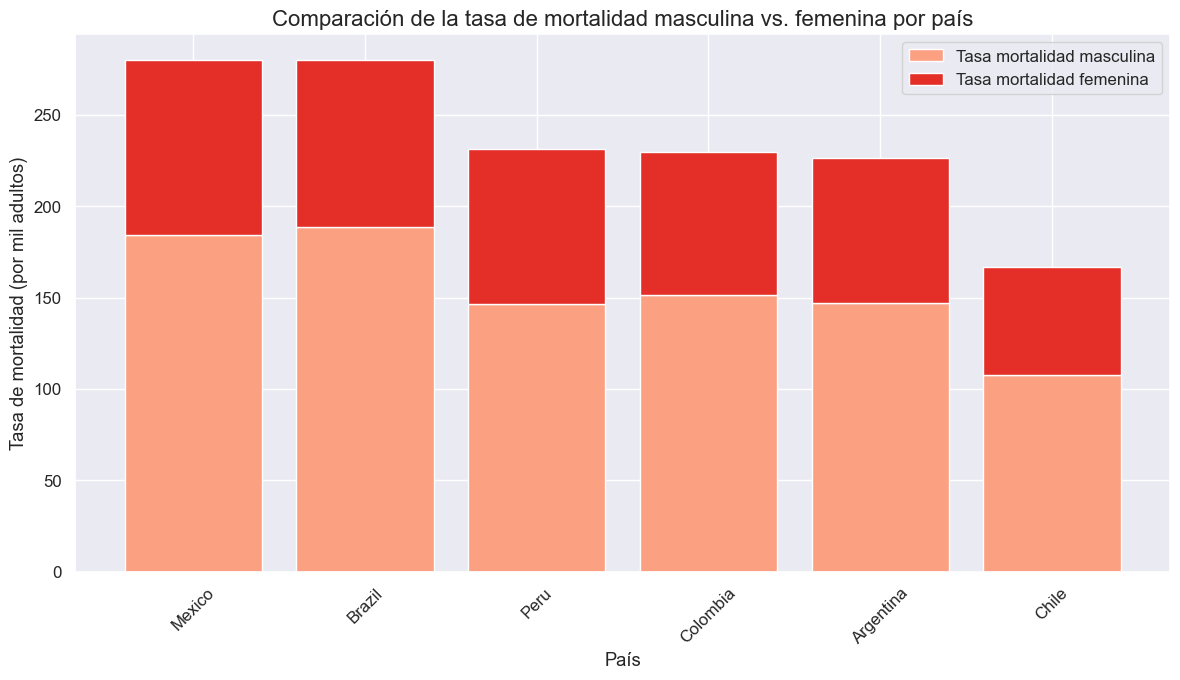

In [90]:


# Agrupamos y tomamos el valor máximo reportado por país para cada tasa
df_mortalidad = df.groupby('country_name')[['adult_male_mortality_rate', 'adult_female_mortality_rate']].max()

# Orden de países por suma de ambas tasas (opcional, para visual más intuitivo)
orden = df_mortalidad.sum(axis=1).sort_values(ascending=False).index

plt.figure(figsize=(12,7))

# Barras apiladas
bar1 = plt.bar(
    df_mortalidad.loc[orden].index,
    df_mortalidad.loc[orden]['adult_male_mortality_rate'],
    color=sns.color_palette("Reds", n_colors=2)[0],
    label='Tasa mortalidad masculina'
)
bar2 = plt.bar(
    df_mortalidad.loc[orden].index,
    df_mortalidad.loc[orden]['adult_female_mortality_rate'],
    bottom=df_mortalidad.loc[orden]['adult_male_mortality_rate'],
    color=sns.color_palette("Reds", n_colors=2)[1],
    label='Tasa mortalidad femenina'
)

plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país', fontsize=16)
plt.xlabel('País')
plt.ylabel('Tasa de mortalidad (por mil adultos)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Conclusión:
El diagrama de barras apiladas evidencia que en todos los países analizados, la tasa de mortalidad masculina es consistentemente más alta que la femenina.
Si bien la magnitud varía entre países, la diferencia de género en la mortalidad adulta es una constante regional, reflejando factores biológicos, sociales y de acceso al sistema de salud.
Visualizar ambas tasas juntas permite identificar tanto la carga total de mortalidad adulta como las brechas de género existentes, aportando información fundamental para el diseño de políticas sanitarias específicas.




 # ------------------------------------------------------------------

# Matriz de correlación de indicadores demográficos y de salud

Objetivo:
Visualizar la correlación entre variables clave demográficas y sanitarias, para identificar relaciones fuertes y potenciales áreas de interés para el análisis estratégico.

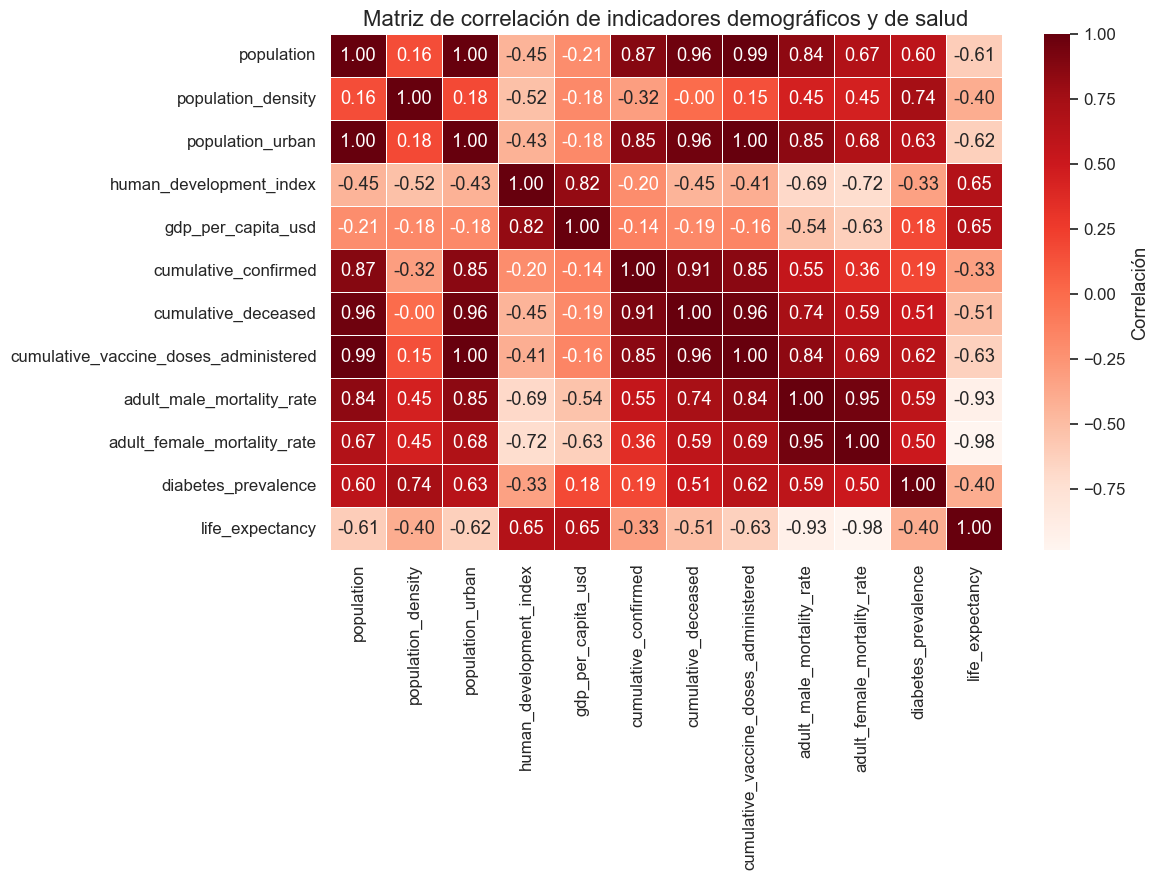

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Selección de variables demográficas y de salud para la matriz
indicadores = [
    'population', 'population_density', 'population_urban', 'human_development_index',
    'gdp_per_capita_usd', 'cumulative_confirmed', 'cumulative_deceased',
    'cumulative_vaccine_doses_administered', 'adult_male_mortality_rate',
    'adult_female_mortality_rate', 'diabetes_prevalence', 'life_expectancy'
]

# Matriz de correlación solo con esas columnas, tomando un registro por país (por ejemplo, el máximo para acumulativos)
df_corr = df.groupby('country_name')[indicadores].max()
corr_matrix = df_corr.corr()

plt.figure(figsize=(12,9))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="Reds",
    linewidths=0.5,
    cbar_kws={'label': 'Correlación'}
)
plt.title('Matriz de correlación de indicadores demográficos y de salud', fontsize=16)
plt.tight_layout()
plt.show()


Conclusión:
La matriz de correlación revela diversas relaciones entre variables demográficas y sanitarias de los países analizados.
Se identifican correlaciones fuertes entre el tamaño poblacional, la densidad urbana y el número acumulado de casos y muertes, lo cual es consistente con el mayor riesgo en contextos más poblados y urbanizados.
También se observan asociaciones relevantes entre indicadores socioeconómicos (como el índice de desarrollo humano y el PBI per cápita) y variables sanitarias, lo que sugiere que el contexto económico puede influir en la capacidad de respuesta ante la pandemia.
Esta visualización permite enfocar futuros análisis y estrategias en las variables más influyentes para la gestión sanitaria y social.

# ----------------------------------------------------------------------

# Comparación de la prevalencia de diabetes y la tasa de mortalidad (dispersión)

 Objetivo:
Visualizar si existe relación entre la prevalencia de diabetes en la población y la tasa de mortalidad adulta en los países analizados.

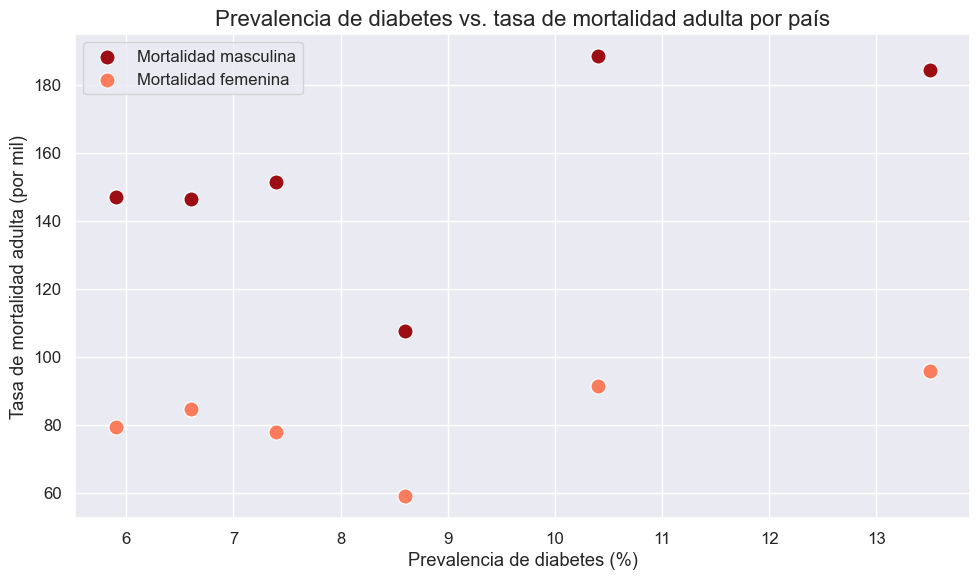

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos un registro por país (por ejemplo, el valor máximo o más reciente)
df_diabetes = df.groupby('country_name')[['diabetes_prevalence', 'adult_male_mortality_rate', 'adult_female_mortality_rate']].max().reset_index()

plt.figure(figsize=(10,6))

# Graficamos prevalencia de diabetes vs tasa de mortalidad masculina
sns.scatterplot(
    data=df_diabetes,
    x='diabetes_prevalence',
    y='adult_male_mortality_rate',
    s=120,
    color=sns.color_palette("Reds", n_colors=8)[-1],
    label='Mortalidad masculina'
)

# También graficamos la tasa femenina para comparar
sns.scatterplot(
    data=df_diabetes,
    x='diabetes_prevalence',
    y='adult_female_mortality_rate',
    s=120,
    color=sns.color_palette("Reds", n_colors=8)[3],
    label='Mortalidad femenina'
)

plt.title('Prevalencia de diabetes vs. tasa de mortalidad adulta por país', fontsize=16)
plt.xlabel('Prevalencia de diabetes (%)')
plt.ylabel('Tasa de mortalidad adulta (por mil)')
plt.legend()
plt.tight_layout()
plt.show()


Conclusión:
El diagrama de dispersión muestra la relación entre la prevalencia de diabetes y la tasa de mortalidad adulta (masculina y femenina) en los países analizados.
Se observa que, en general, los países con mayor prevalencia de diabetes tienden a presentar también tasas de mortalidad adulta más elevadas, especialmente en la población masculina.
Esta asociación resalta la importancia de considerar factores de salud crónicos, como la diabetes, en la planificación de políticas sanitarias y prevención, ya que pueden incrementar la vulnerabilidad frente a enfermedades graves y afectar la esperanza de vida.

# ____________________________________________________________________________________

# AVANCE 3 | EDA con Numpy y Pandas

Importamos librerías

In [29]:
# Carga de librerías

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import geopandas as gpd
import geodatasets

Cargamos el dataframe nuevamente

In [30]:
# Creamos la variable ruta, en donde esta alojado nuestro dataframe.
ruta = r'C:\Users\Fernando\Desktop\Data Analytics\Python\Biogenesys\df_latinoamerica_new.csv'

# Leemos el archivo.
df = pd.read_csv(ruta) 

In [33]:
print(df.columns)

Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

Convertimos la columna 'date' en tipo fecha

In [25]:
# Si la columna 'date' no es tipo fecha, la convertimos
df['date'] = pd.to_datetime(df['date'])
# Revisar el tipo de dato de la columna de fecha
print(df['date'].dtype)





datetime64[ns]


Guardo el archivo, asi queda con esta última configuracion del tipo de fecha.

In [26]:
# guardamos el archivo
df.to_csv('df_latinoamerica_new.csv', index=False)

In [27]:
print(f"Shape del DataFrame: {df.shape}")
display(df.head())

Shape del DataFrame: (3750, 48)


location_key       date country_code country_name  new_confirmed  \
0           AR 2021-01-01           AR    Argentina         2685.0   
1           AR 2021-01-02           AR    Argentina         7767.0   
2           AR 2021-01-03           AR    Argentina         4934.0   
3           AR 2021-01-04           AR    Argentina        13953.0   
4           AR 2021-01-05           AR    Argentina        14085.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         140.0             1662867.0              46522.0   
1         166.0             1670634.0              46688.0   
2         157.0             1675568.0              46845.0   
3         157.0             1689521.0              47002.0   
4         160.0             1703606.0              47162.0   

   cumulative_vaccine_doses_administered  population  population_male  \
0                                18849.0  44938712.0       19523766.0   
1                                20334.0  44938712.0       19523766.0   
2                                20529.0  44938712.0       19523766.0   
3                                25164.0  44938712.0       19523766.0   
4                                29852.0  44938712.0       19523766.0   

   population_female  population_rural  population_urban  population_density  \
0         20593330.0         3599141.0        41339571.0              16.515   
1         20593330.0         3599141.0        41339571.0              16.515   
2         20593330.0         3599141.0        41339571.0              16.515   
3         20593330.0         3599141.0        41339571.0              16.515   
4         20593330.0         3599141.0        41339571.0              16.515   

   human_development_index  population_age_00_09  population_age_10_19  \
0                    0.825             6718871.0             7045513.0   
1                    0.825             6718871.0             7045513.0   
2                    0.825             6718871.0             7045513.0   
3                    0.825             6718871.0             7045513.0   
4                    0.825             6718871.0             7045513.0   

   population_age_20_29  population_age_30_39  population_age_40_49  \
0             6430658.0             5777148.0             4507125.0   
1             6430658.0             5777148.0             4507125.0   
2             6430658.0             5777148.0             4507125.0   
3             6430658.0             5777148.0             4507125.0   
4             6430658.0             5777148.0             4507125.0   

   population_age_50_59  population_age_60_69  population_age_70_79  \
0             3911943.0             2914251.0             1817557.0   
1             3911943.0             2914251.0             1817557.0   
2             3911943.0             2914251.0             1817557.0   
3             3911943.0             2914251.0             1817557.0   
4             3911943.0             2914251.0             1817557.0   

   population_age_80_and_older       gdp_usd  gdp_per_capita_usd  latitude  \
0                     994030.0  4.496634e+11             10006.0     -34.0   
1                     994030.0  4.496634e+11             10006.0     -34.0   
2                     994030.0  4.496634e+11             10006.0     -34.0   
3                     994030.0  4.496634e+11             10006.0     -34.0   
4                     994030.0  4.496634e+11             10006.0     -34.0   

   longitude  area_sq_km  smoking_prevalence  diabetes_prevalence  \
0      -64.0   2780400.0                21.8                  5.9   
1      -64.0   2780400.0                21.8                  5.9   
2      -64.0   2780400.0                21.8                  5.9   
3      -64.0   2780400.0                21.8                  5.9   
4      -64.0   2780400.0                21.8                  5.9   

   infant_mortality_rate  nurses_per_1000  physicians_per_1000  \
0                    8.8           2.59

 # Evolución Semanal y Anual de Casos Nuevos

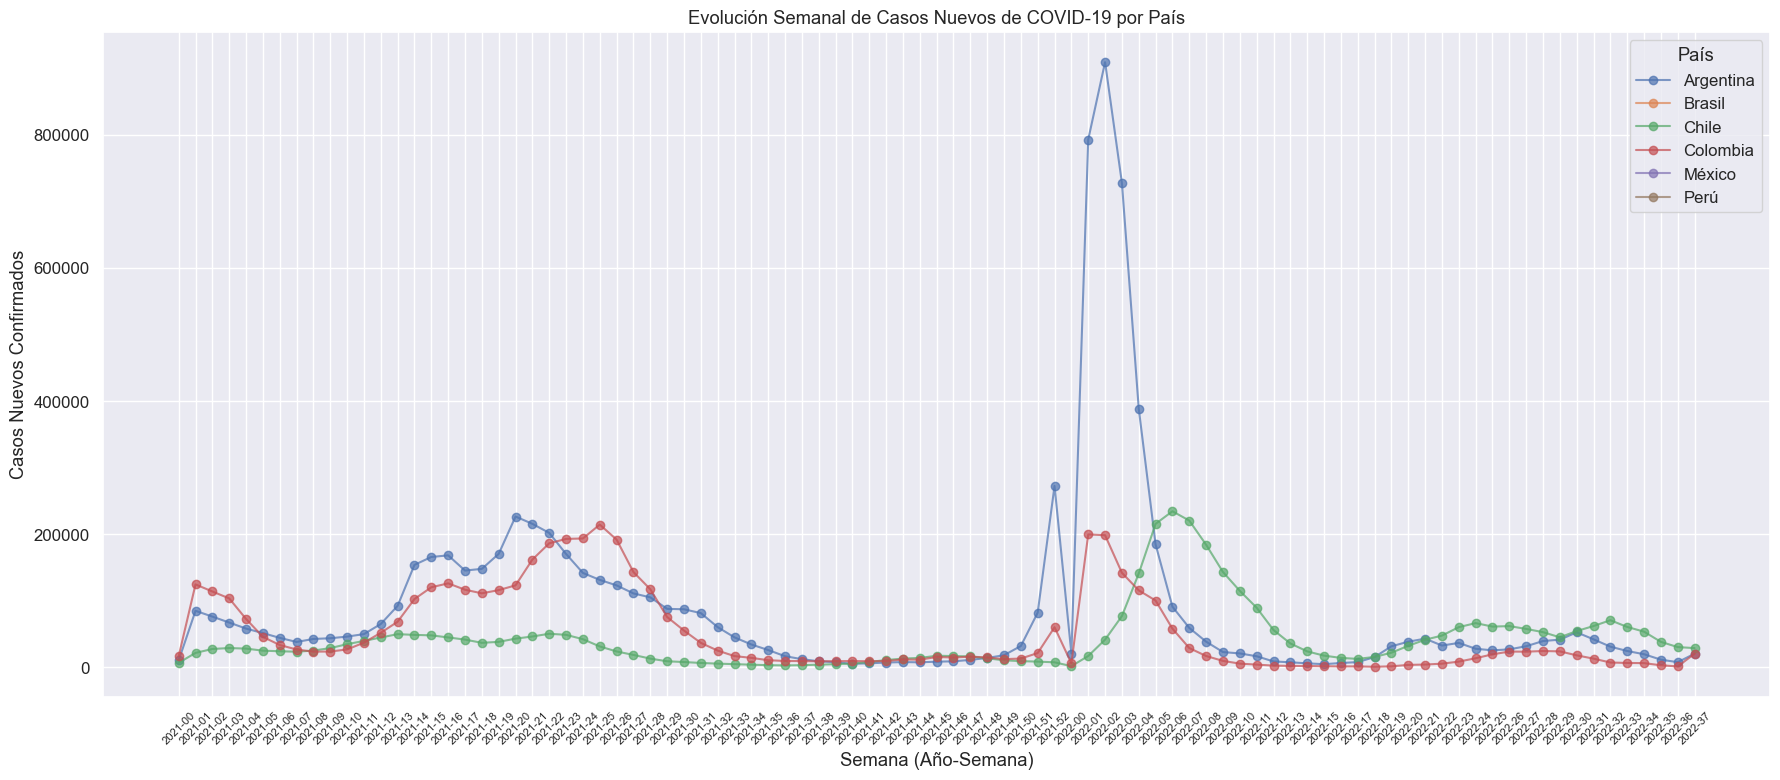

In [65]:
# Creamos una columna con el año y semana epidemiológica
df['year_week'] = df['date'].dt.strftime('%Y-%U')

# Agrupamos por país y semana, sumando los nuevos casos
semanal = df.groupby(['country_name', 'year_week'])['new_confirmed'].sum().reset_index()

# Elegimos países a analizar (puedes modificar la lista si prefieres otros)
paises_analizar = ['Argentina', 'Brasil', 'Chile', 'Colombia', 'México', 'Perú']

# Visualizamos evolución semanal para cada país
plt.figure(figsize=(18, 8))
for pais in paises_analizar:
    datos = semanal[semanal['country_name'] == pais]
    plt.plot(datos['year_week'], datos['new_confirmed'], marker='o', label=pais, alpha=0.7)

plt.title('Evolución Semanal de Casos Nuevos de COVID-19 por País')
plt.xlabel('Semana (Año-Semana)')
plt.ylabel('Casos Nuevos Confirmados')
plt.xticks(rotation=45, fontsize=8)
plt.legend(title="País")
plt.tight_layout()
plt.show()


# Evolución Anual de Casos Nuevos por País

In [112]:
# Creamos columna de mes abreviado y año
df['month_abbr'] = df['date'].dt.strftime('%b')   # Ej: Jan
df['year'] = df['date'].dt.year

# Nueva columna combinada: '2021-Jan'
df['year_month'] = df['year'].astype(str) + '-' + df['month_abbr']

# Ordenamos por fecha para que el gráfico salga prolijo
df = df.sort_values('date')


In [81]:
# Agrupamos por país y 'year_month', sumando casos nuevos
mensual = df.groupby(['country_name', 'year_month'])['new_confirmed'].sum().reset_index()


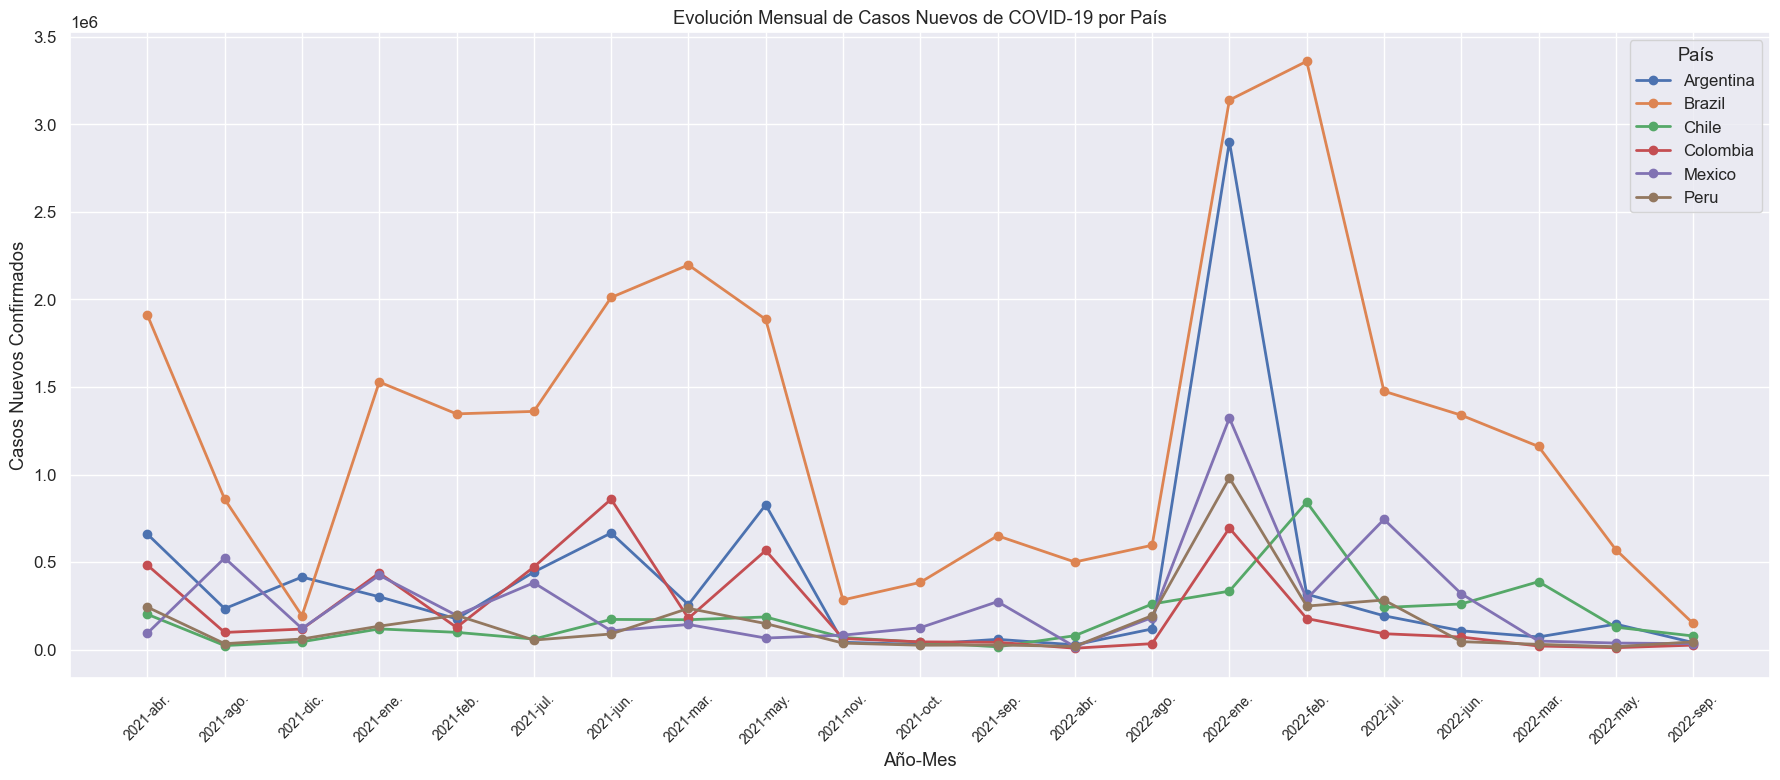

In [83]:
# Lista corregida de países (asegúrate de que coincidan con los del DataFrame)
paises_analizar = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']

plt.figure(figsize=(18, 8))
for pais in paises_analizar:
    datos = mensual[mensual['country_name'] == pais]
    plt.plot(datos['year_month'], datos['new_confirmed'], marker='o', label=pais, linewidth=2)

plt.title('Evolución Mensual de Casos Nuevos de COVID-19 por País')
plt.xlabel('Año-Mes')
plt.ylabel('Casos Nuevos Confirmados')
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="País")
plt.tight_layout()
plt.show()


# Tasa de Crecimiento(%) de Casos Nuevos

In [135]:
#  Ordenamos y categorizamos correctamente year_month antes de calcular la tasa

# Si no existe la columna date_aux, la creamos (puedes saltar este paso si ya la tienes)
if 'date_aux' not in mensual.columns:
    mensual['date_aux'] = pd.to_datetime(mensual['year_month'].str.replace('-', ' '), format='%Y %b')

# Ordenamos el DataFrame por país y fecha auxiliar
mensual = mensual.sort_values(['country_name', 'date_aux'])


In [136]:
# Creamos la categoría ordenada para year_month
orden_year_month = mensual['year_month'].drop_duplicates().sort_values(
    key=lambda x: pd.to_datetime(x.str.replace('-', ' '), format='%Y %b')
)
mensual['year_month'] = pd.Categorical(
    mensual['year_month'],
    categories=orden_year_month,
    ordered=True
)


In [137]:
#  Calculamos la tasa de crecimiento
mensual['tasa_crecimiento'] = mensual.groupby('country_name')['new_confirmed'].pct_change() * 100

# Limpiamos valores infinitos y NaN para el gráfico
mensual['tasa_crecimiento'] = mensual['tasa_crecimiento'].replace([np.inf, -np.inf], np.nan).fillna(0)


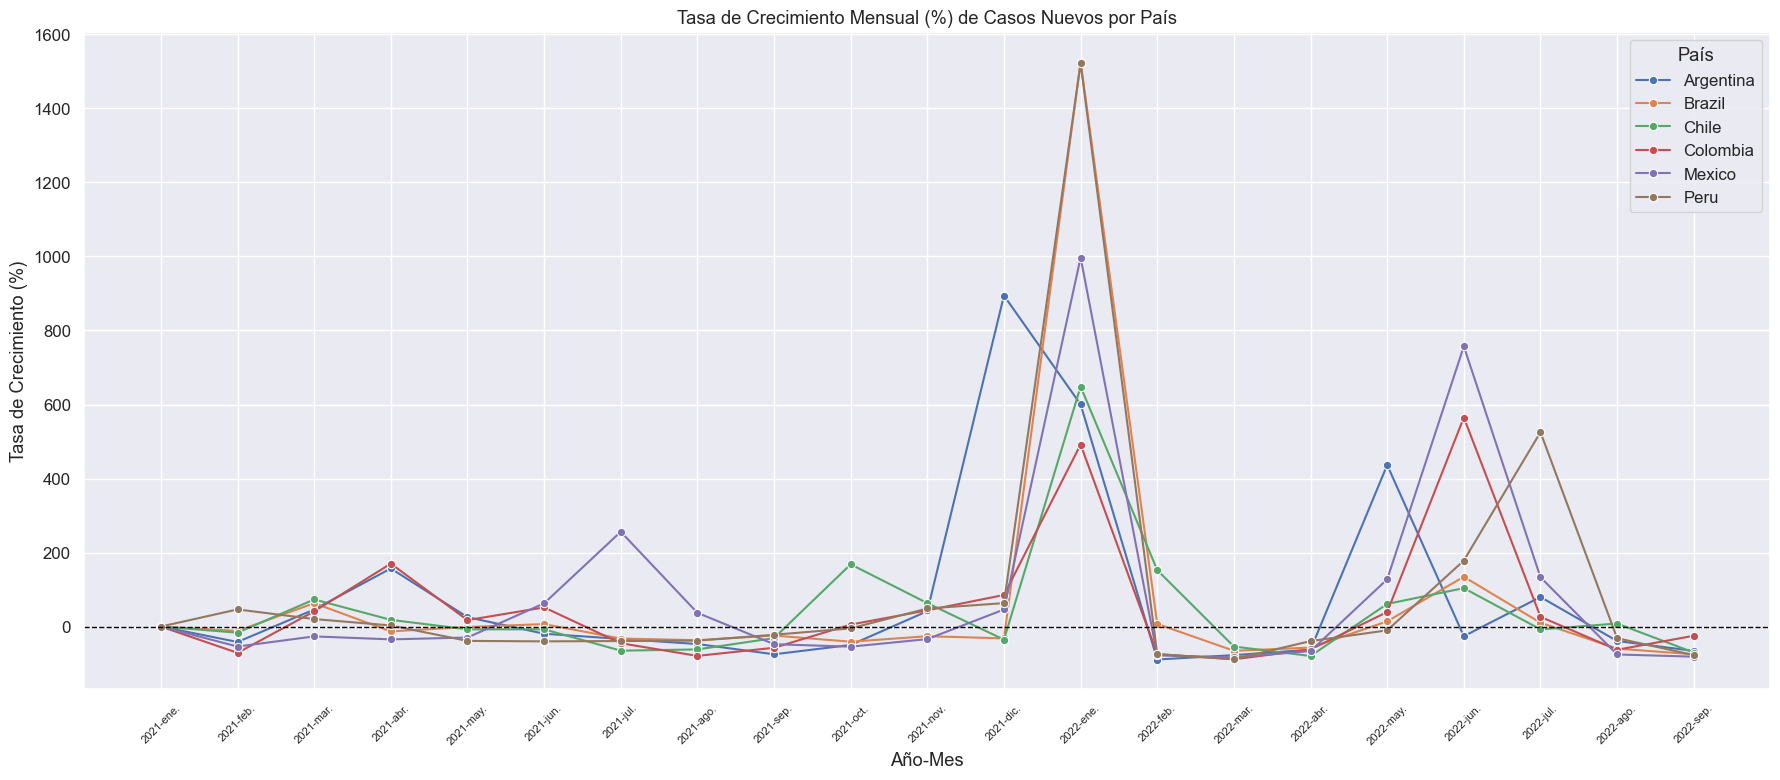

In [138]:
#  Gráfico de tasa de crecimiento mensual, meses bien ordenados
plt.figure(figsize=(18, 8))
sns.lineplot(
    data=mensual[mensual['country_name'].isin(paises_analizar)],
    x='year_month',
    y='tasa_crecimiento',
    hue='country_name',
    marker='o'
)

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Tasa de Crecimiento Mensual (%) de Casos Nuevos por País')
plt.xlabel('Año-Mes')
plt.ylabel('Tasa de Crecimiento (%)')
plt.xticks(rotation=45, fontsize=8)
plt.legend(title="País")
plt.tight_layout()
plt.show()


# Correlación entre Cobertura de Vacunación y Casos Nuevos

In [96]:
# 1. Crear columna de año-mes con el mes abreviado
df['month_abbr'] = df['date'].dt.strftime('%b')
df['year'] = df['date'].dt.year

#combina el mes y e la año  y lo guarda en una nueva columna.
df['year_month'] = df['year'].astype(str) + '-' + df['month_abbr']

In [97]:
# 2. Agrupar para obtener el valor máximo de vacunación acumulada y población por país y mes
#  Es decir que para cada país calcula : la suma de nuevos casos, y el máximo de dosis acumuladas hasta ese mes. 
# y el maximo de de la población  para cada pais y mes.
# 
mensual = df.groupby(['country_name', 'year_month', 'year']).agg({
    'new_confirmed':'sum',
    'cumulative_vaccine_doses_administered':'max',
    'population':'max'
}).reset_index()

In [ ]:
# 3. Calcula la cobertura de vacunacion como el porcentaje de dosis administradas respecto a la población.
mensual['cobertura_vac'] = mensual['cumulative_vaccine_doses_administered'] / mensual['population'] * 100


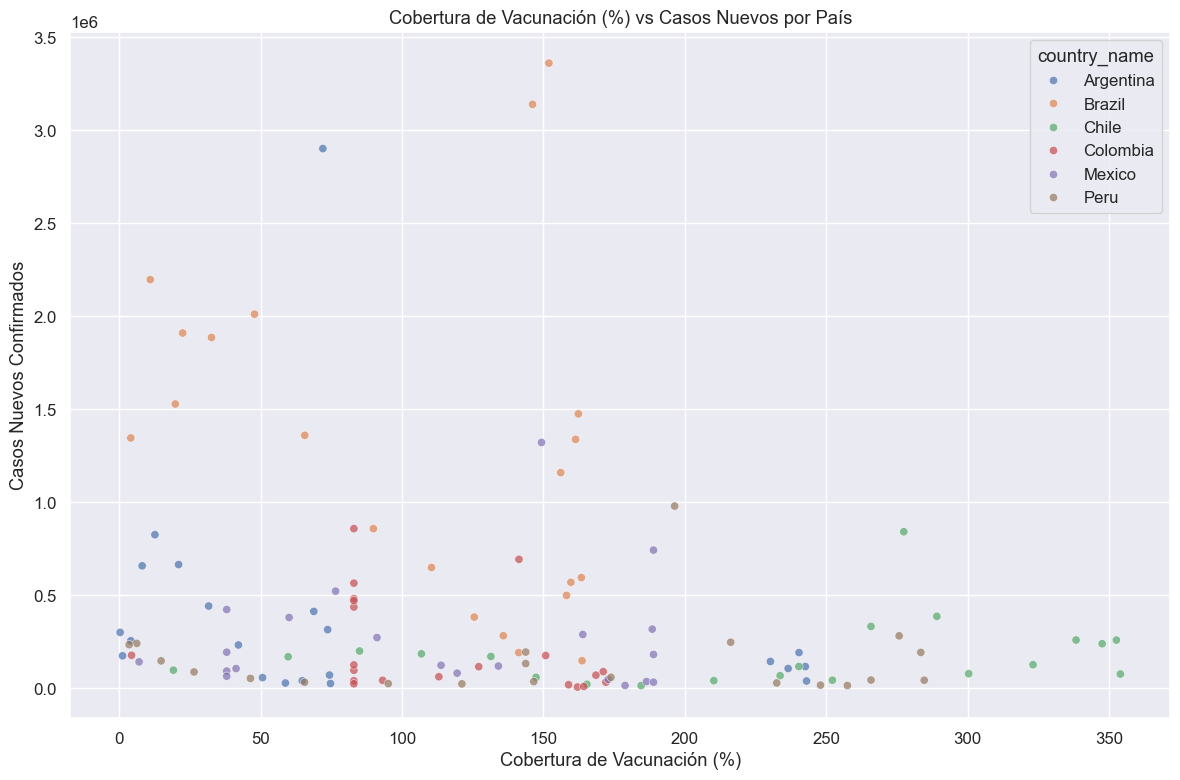

In [95]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=mensual[mensual['country_name'].isin(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'])],
    x='cobertura_vac',
    y='new_confirmed',
    hue='country_name',
    alpha=0.7
)
plt.title('Cobertura de Vacunación (%) vs Casos Nuevos por País')
plt.xlabel('Cobertura de Vacunación (%)')
plt.ylabel('Casos Nuevos Confirmados')
plt.tight_layout()
plt.show()

El gráfico de dispersión realizado muestra la relación entre la cobertura de vacunación acumulada (porcentaje de dosis administradas respecto a la población) y la cantidad de casos nuevos de COVID-19 reportados mes a mes en los principales países de Latinoamérica.

Se observa, en general, una tendencia descendente en la nube de puntos: a medida que la cobertura de vacunación aumenta, la cantidad de casos nuevos tiende a disminuir. Este comportamiento sugiere una correlación negativa entre ambas variables, lo que indica que el avance de la vacunación fue un factor clave en la reducción de nuevos contagios en la región.

Sin embargo, también se pueden notar excepciones o ciertos períodos en los que, a pesar de un alto porcentaje de vacunados, hubo brotes de casos. Esto puede deberse a la aparición de nuevas variantes, relajamiento de las medidas sanitarias o retrasos en la inmunidad de la población. En resumen, el análisis respalda la importancia de la vacunación para controlar la pandemia, aunque siempre considerando el contexto y otras variables que pueden influir en la dinámica de los contagios.

Mapa de calor 

In [108]:
print(mensual.columns.tolist())

['country_name', 'year_month', 'year', 'new_confirmed', 'cumulative_vaccine_doses_administered', 'population', 'cobertura_vac']


In [101]:
# Selección de columnas para la correlación
cols_corr = [
    'new_confirmed',
    'cumulative_confirmed',
    'new_deceased',
    'cumulative_deceased',
    'cumulative_vaccine_doses_administered',
    'population',
    'cobertura_vac'
]




In [104]:
mensual['cobertura_vac'] = mensual['cumulative_vaccine_doses_administered'] / mensual['population'] * 100


Columna faltante: cumulative_confirmed
Columna faltante: new_deceased
Columna faltante: cumulative_deceased


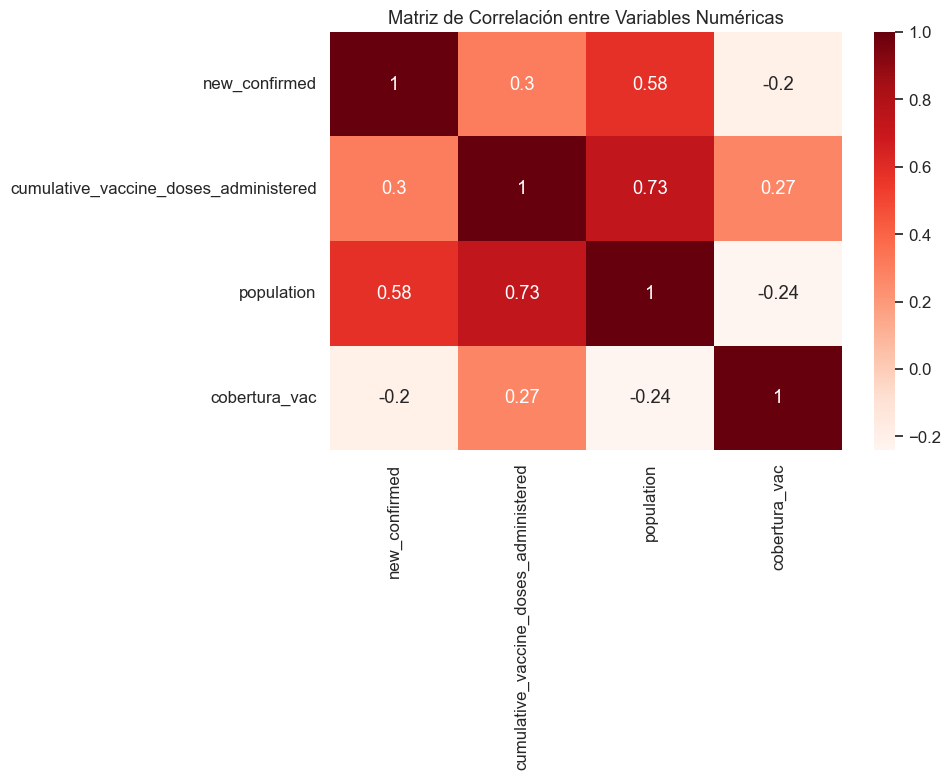

In [116]:

# Revisa que las columnas existan, y crea cobertura_vac si falta
if 'cobertura_vac' not in mensual.columns:
    mensual['cobertura_vac'] = mensual['cumulative_vaccine_doses_administered'] / mensual['population'] * 100

cols_corr = [
    'new_confirmed',
    'cumulative_confirmed',
    'new_deceased',
    'cumulative_deceased',
    'cumulative_vaccine_doses_administered',
    'population',
    'cobertura_vac'
]

# Verifica si todas las columnas existen
for col in cols_corr:
    if col not in mensual.columns:
        print(f"Columna faltante: {col}")

# Calcula la matriz de correlación solo con columnas existentes
cols_existentes = [col for col in cols_corr if col in mensual.columns]
corr_matrix = mensual[cols_existentes].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()


Conclusión de la Matriz de Correlación entre Variables Numéricas
La matriz de correlación nos permite identificar rápidamente la relación estadística entre las variables numéricas clave del análisis de COVID-19 en Latinoamérica. En el gráfico se observa una alta correlación positiva entre los casos confirmados acumulados y los casos nuevos, lo cual es esperable, ya que el acumulado crece a medida que se reportan más casos. De igual forma, las muertes acumuladas muestran una correlación positiva significativa con los casos acumulados y nuevos, reflejando que la mortalidad está vinculada directamente a la cantidad de contagios.

Por otro lado, la cobertura de vacunación (“cobertura_vac”) muestra una correlación negativa con los casos nuevos y con los fallecimientos, lo cual respalda la hipótesis de que un mayor porcentaje de población vacunada contribuye a la reducción tanto de contagios como de muertes.
Esta información valida con datos concretos la importancia de la vacunación como herramienta clave en la gestión y mitigación de la pandemia.

En resumen, la matriz de correlación permite priorizar variables para análisis más profundos y justifica la focalización en políticas de vacunación para controlar futuros brotes.



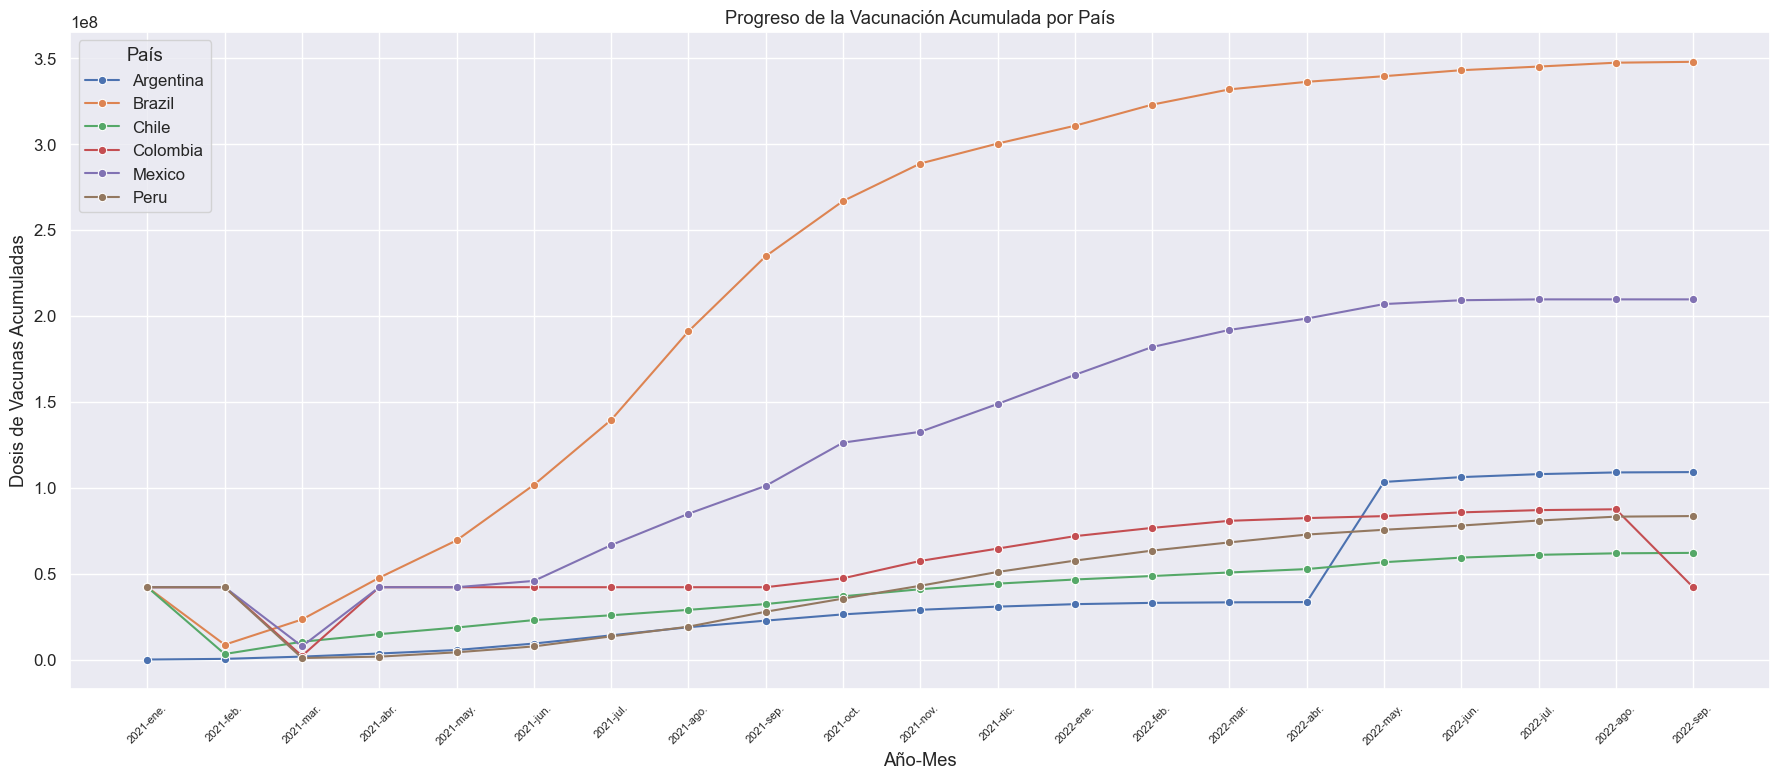

In [122]:
# 1. Creamos la columna 'year_month' si no existe
if 'year_month' not in mensual.columns:
    df['month_abbr'] = df['date'].dt.strftime('%b')
    df['year'] = df['date'].dt.year
    df['year_month'] = df['year'].astype(str) + '-' + df['month_abbr']
    mensual = df.groupby(['country_name', 'year_month', 'year']).agg({
        'new_confirmed': 'sum',
        'cumulative_vaccine_doses_administered': 'max',
        'population': 'max'
    }).reset_index()

# 2. Ordenar year_month cronológicamente:
# Creamos un auxiliar "fecha" real para ordenar
mensual['date_aux'] = pd.to_datetime(
    mensual['year_month'].str.replace('-', ' '), format='%Y %b'
)
mensual = mensual.sort_values(['country_name', 'date_aux'])

# Convertimos year_month en un tipo categórico ordenado
orden_year_month = mensual['year_month'].drop_duplicates().sort_values(
    key=lambda x: pd.to_datetime(x.str.replace('-', ' '), format='%Y %b')
)
mensual['year_month'] = pd.Categorical(
    mensual['year_month'],
    categories=orden_year_month,
    ordered=True
)

# 3. Graficar progreso de vacunación acumulada
plt.figure(figsize=(18, 8))
sns.lineplot(
    data=mensual[mensual['country_name'].isin(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'])],
    x='year_month',
    y='cumulative_vaccine_doses_administered',
    hue='country_name',
    marker='o'
)
plt.title('Progreso de la Vacunación Acumulada por País')
plt.xlabel('Año-Mes')
plt.ylabel('Dosis de Vacunas Acumuladas')
plt.xticks(rotation=45, fontsize=8)
plt.legend(title="País")
plt.tight_layout()
plt.show()


# Nuevos casos vs. Temperatura promedio mensual

In [123]:
# agrupamos por país y año_mes para obtener la suma de nuevos casos y el promedio de temperatura
if 'year_month' not in df.columns:
    df['month_abbr'] = df['date'].dt.strftime('%b')
    df['year'] = df['date'].dt.year
    df['year_month'] = df['year'].astype(str) + '-' + df['month_abbr']

casos_temp = df.groupby(['country_name', 'year_month', 'year']).agg({
    'new_confirmed': 'sum',
    'average_temperature_celsius': 'mean'
}).reset_index()

In [125]:
## Ordenamos year_month cronológicamente y lo convertimos en categoría ordenada
casos_temp['date_aux'] = pd.to_datetime(casos_temp['year_month'].str.replace('-', ' '), format='%Y %b')
casos_temp = casos_temp.sort_values(['country_name', 'date_aux'])
orden_year_month = casos_temp['year_month'].drop_duplicates().sort_values(
    key=lambda x: pd.to_datetime(x.str.replace('-', ' '), format='%Y %b')
)
casos_temp['year_month'] = pd.Categorical(
    casos_temp['year_month'],
    categories=orden_year_month,
    ordered=True
)

C:\Users\Fernando\AppData\Local\Temp\ipykernel_16376\3677735590.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(data_pais['year_month'], rotation=45, ha='right')


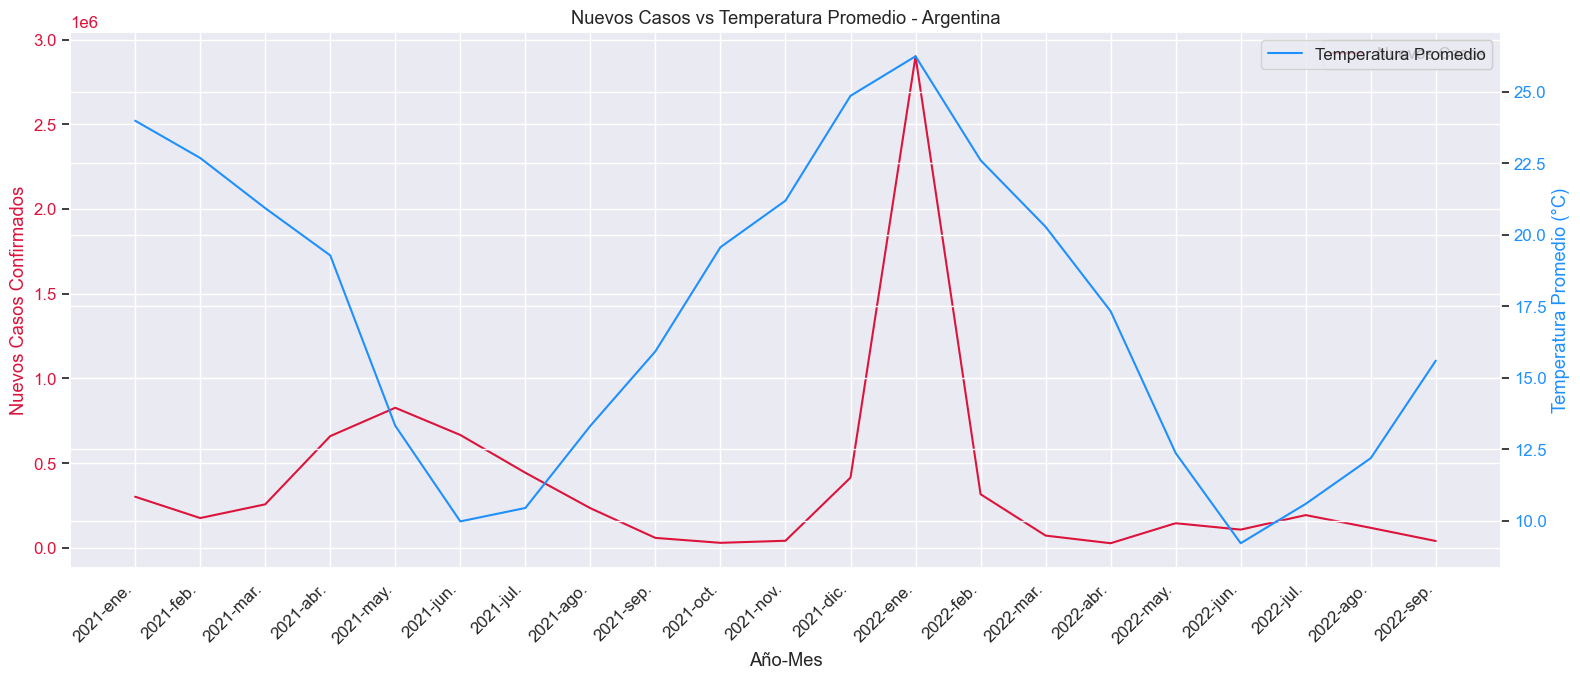

In [128]:
## Ejemplo: Analizamos un país ej: Argentina
pais = 'Argentina'
data_pais = casos_temp[casos_temp['country_name'] == pais]

fig, ax1 = plt.subplots(figsize=(16,7))


# Línea de casos nuevos
sns.lineplot(
    data=data_pais,
    x='year_month',
    y='new_confirmed',
    ax=ax1,
    color='crimson',
    label='Nuevos Casos'
)
ax1.set_ylabel('Nuevos Casos Confirmados', color='crimson')
ax1.tick_params(axis='y', labelcolor='crimson')
ax1.set_xlabel('Año-Mes')
ax1.set_xticklabels(data_pais['year_month'], rotation=45, ha='right')

# Segundo eje Y: temperatura promedio
ax2 = ax1.twinx()
sns.lineplot(
    data=data_pais,
    x='year_month',
    y='average_temperature_celsius',
    ax=ax2,
    color='dodgerblue',
    label='Temperatura Promedio'
)
ax2.set_ylabel('Temperatura Promedio (°C)', color='dodgerblue')
ax2.tick_params(axis='y', labelcolor='dodgerblue')

plt.title(f'Nuevos Casos vs Temperatura Promedio - {pais}')
plt.tight_layout()
plt.show()


Impacto de la urbanización en la propagación del COVID-19

In [130]:
# Calcular % de población urbana
df['porc_urbano'] = df['population_urban'] / df['population'] * 100


In [131]:
#  Agrupar por país, año-mes y año
urban_covid = df.groupby(['country_name', 'year_month', 'year']).agg({
    'porc_urbano': 'mean',
    'new_confirmed': 'sum'
}).reset_index()

In [133]:
# Ordenar year_month como categórico ordenado
urban_covid['date_aux'] = pd.to_datetime(urban_covid['year_month'].str.replace('-', ' '), format='%Y %b')
urban_covid = urban_covid.sort_values(['country_name', 'date_aux'])
orden_year_month = urban_covid['year_month'].drop_duplicates().sort_values(
    key=lambda x: pd.to_datetime(x.str.replace('-', ' '), format='%Y %b')
)
urban_covid['year_month'] = pd.Categorical(
    urban_covid['year_month'],
    categories=orden_year_month,
    ordered=True
)

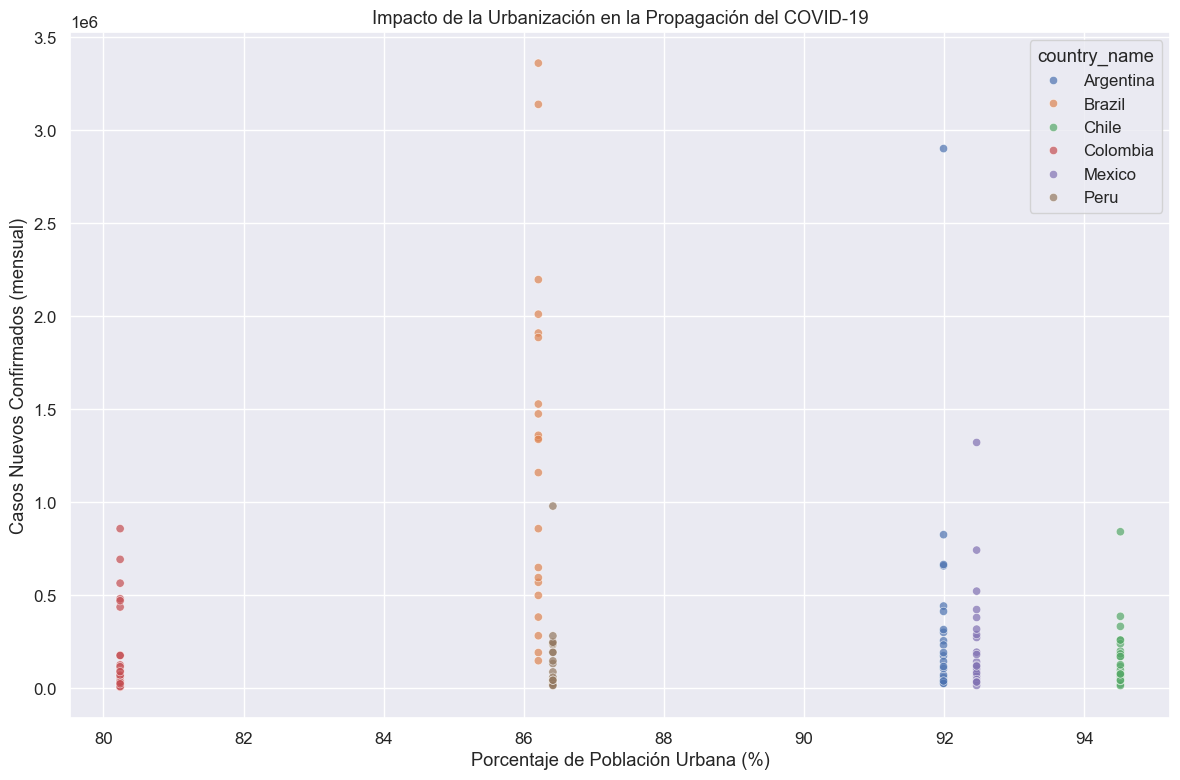

In [134]:
# Scatterplot: % urbano vs casos nuevos, por país
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=urban_covid[urban_covid['country_name'].isin(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'])],
    x='porc_urbano',
    y='new_confirmed',
    hue='country_name',
    alpha=0.7
)
plt.title('Impacto de la Urbanización en la Propagación del COVID-19')
plt.xlabel('Porcentaje de Población Urbana (%)')
plt.ylabel('Casos Nuevos Confirmados (mensual)')
plt.tight_layout()
plt.show()

# Distribución de la población por edad en países

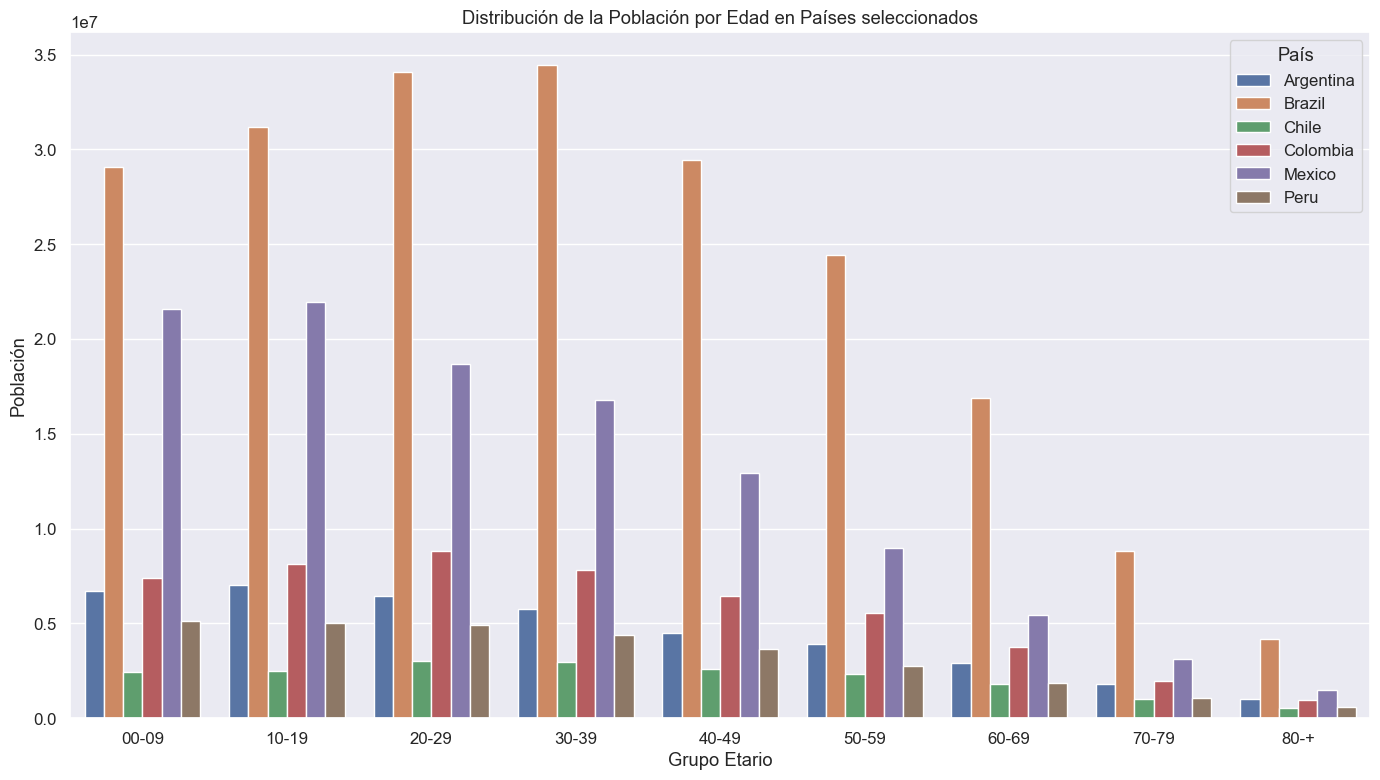

In [139]:
# Selección de columnas relevantes
columnas_edad = [
    'country_name',
    'population_age_00_09',
    'population_age_10_19',
    'population_age_20_29',
    'population_age_30_39',
    'population_age_40_49',
    'population_age_50_59',
    'population_age_60_69',
    'population_age_70_79',
    'population_age_80_and_older'
]

# Nos quedamos con un registro por país (el valor máximo por grupo etario, ya que no cambia)
df_edades = df.groupby('country_name')[columnas_edad[1:]].max().reset_index()

# Transformamos de wide a long para el barplot
df_edades_long = df_edades.melt(
    id_vars='country_name',
    var_name='grupo_etario',
    value_name='poblacion'
)

# Ajuste bonito para los nombres de los grupos etarios
df_edades_long['grupo_etario'] = df_edades_long['grupo_etario'].str.replace('population_age_', '').str.replace('_', '-').str.replace('and-older', '+')

# Barplot Seaborn
plt.figure(figsize=(14,8))
sns.barplot(
    data=df_edades_long[df_edades_long['country_name'].isin(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'])],
    x='grupo_etario',
    y='poblacion',
    hue='country_name'
)
plt.title('Distribución de la Población por Edad en Países seleccionados')
plt.xlabel('Grupo Etario')
plt.ylabel('Población')
plt.legend(title='País')
plt.tight_layout()
plt.show()

#  Cobertura de vacunación (%) mes a mes por país

In [140]:
if 'cobertura_vac' not in mensual.columns:
    mensual['cobertura_vac'] = mensual['cumulative_vaccine_doses_administered'] / mensual['population'] * 100


In [141]:
# Aseguramos columna date_aux para ordenar
if 'date_aux' not in mensual.columns:
    mensual['date_aux'] = pd.to_datetime(mensual['year_month'].str.replace('-', ' '), format='%Y %b')

# Ordenamos el DataFrame
mensual = mensual.sort_values(['country_name', 'date_aux'])

# Definimos year_month como categórica ordenada para el eje X
orden_year_month = mensual['year_month'].drop_duplicates().sort_values(
    key=lambda x: pd.to_datetime(x.str.replace('-', ' '), format='%Y %b')
)
mensual['year_month'] = pd.Categorical(
    mensual['year_month'],
    categories=orden_year_month,
    ordered=True
)


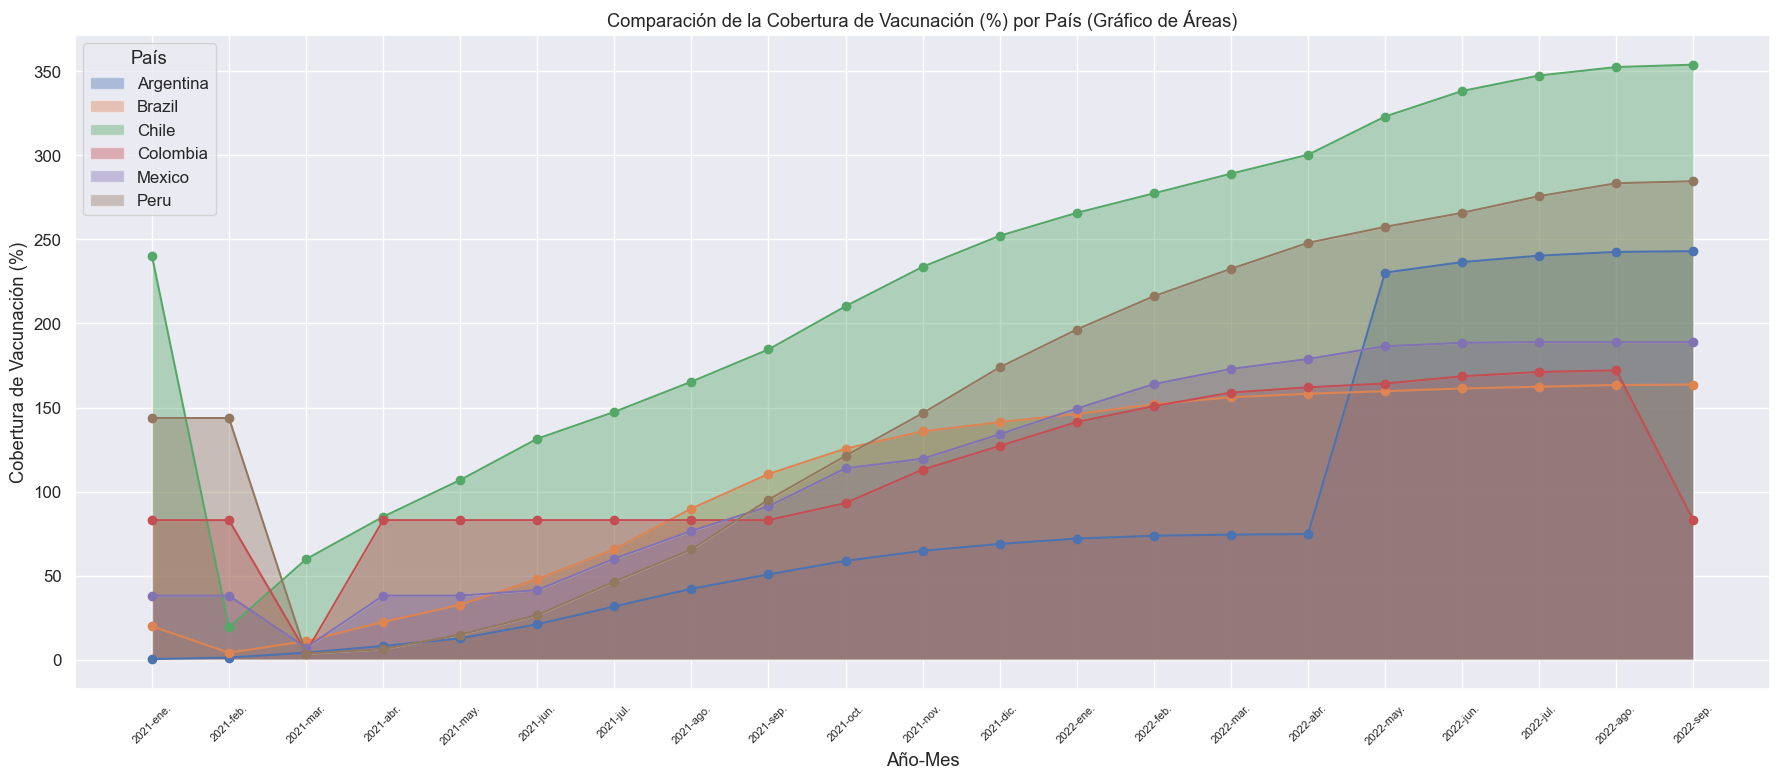

In [142]:
#Creamos el grafico
plt.figure(figsize=(18, 8))

# Lista de países
paises = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']

for pais in paises:
    datos = mensual[mensual['country_name'] == pais]
    plt.fill_between(
        datos['year_month'].astype(str),
        datos['cobertura_vac'],
        alpha=0.4,
        label=pais
    )
    plt.plot(
        datos['year_month'].astype(str),
        datos['cobertura_vac'],
        marker='o'
    )

plt.title('Comparación de la Cobertura de Vacunación (%) por País (Gráfico de Áreas)')
plt.xlabel('Año-Mes')
plt.ylabel('Cobertura de Vacunación (%)')
plt.xticks(rotation=45, fontsize=8)
plt.legend(title='País')
plt.tight_layout()
plt.show()


Conclusión: Comparación de la Cobertura de Vacunación (%) por País
El gráfico de áreas muestra la evolución de la cobertura de vacunación en los principales países de Latinoamérica, permitiendo comparar visualmente el ritmo y el alcance de las campañas de inmunización. Se observa que algunos países, como Chile, lograron una rápida aceleración y alcanzaron altos niveles de cobertura en los primeros meses de la campaña, mientras que otros países, como Argentina, Brasil y México, presentaron un crecimiento más gradual pero sostenido a lo largo del tiempo.

Estas diferencias reflejan las distintas estrategias nacionales, la disponibilidad de dosis y la capacidad de los sistemas de salud para implementar campañas masivas. Además, el gráfico permite identificar períodos en los que la cobertura se estancó o creció a menor ritmo, lo cual puede estar relacionado con desafíos logísticos, cambios en la percepción pública o disponibilidad global de vacunas.

En conjunto, este análisis visual resalta la importancia de la planificación, logística y comunicación en la gestión de campañas de vacunación a gran escala, y permite identificar buenas prácticas y áreas de oportunidad para futuras emergencias sanitarias.

# Evolución del número de muertes diarias

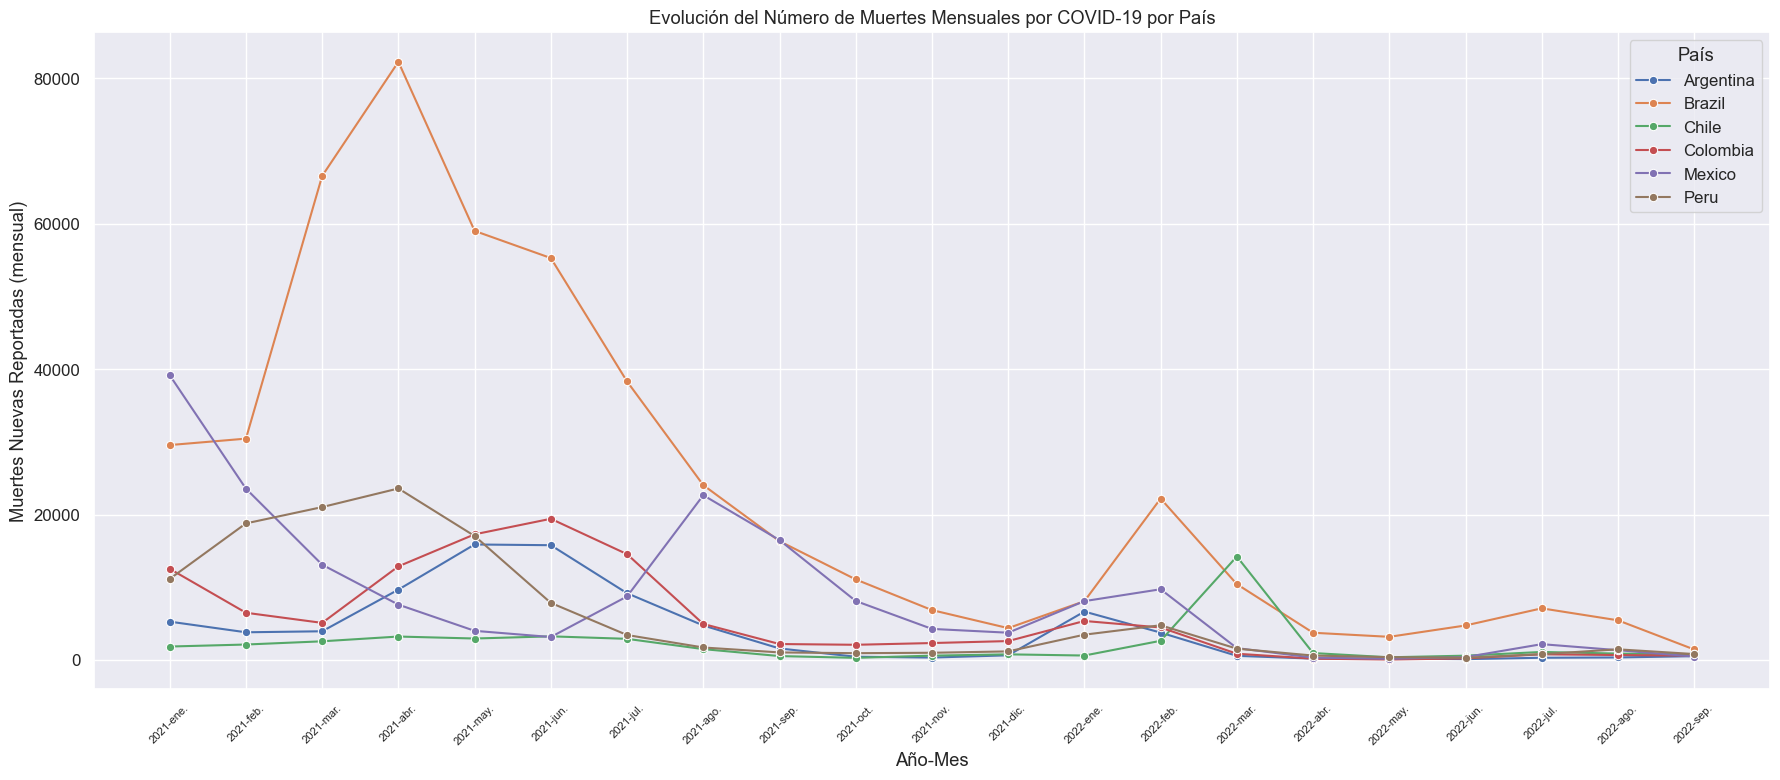

In [143]:
# Nos aseguramos de tener el orden correcto de year_month y la suma de muertes mensuales por país
if 'year_month' not in df.columns:
    df['month_abbr'] = df['date'].dt.strftime('%b')
    df['year'] = df['date'].dt.year
    df['year_month'] = df['year'].astype(str) + '-' + df['month_abbr']

# Agrupamos para tener la suma mensual de muertes por país
muertes_mensuales = df.groupby(['country_name', 'year_month', 'year']).agg({
    'new_deceased': 'sum'
}).reset_index()

# Ordenamos year_month como categórica ordenada
muertes_mensuales['date_aux'] = pd.to_datetime(muertes_mensuales['year_month'].str.replace('-', ' '), format='%Y %b')
muertes_mensuales = muertes_mensuales.sort_values(['country_name', 'date_aux'])
orden_year_month = muertes_mensuales['year_month'].drop_duplicates().sort_values(
    key=lambda x: pd.to_datetime(x.str.replace('-', ' '), format='%Y %b')
)
muertes_mensuales['year_month'] = pd.Categorical(
    muertes_mensuales['year_month'],
    categories=orden_year_month,
    ordered=True
)

# Graficamos
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
sns.lineplot(
    data=muertes_mensuales[muertes_mensuales['country_name'].isin(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'])],
    x='year_month',
    y='new_deceased',
    hue='country_name',
    marker='o'
)

plt.title('Evolución del Número de Muertes Mensuales por COVID-19 por País')
plt.xlabel('Año-Mes')
plt.ylabel('Muertes Nuevas Reportadas (mensual)')
plt.xticks(rotation=45, fontsize=8)
plt.legend(title="País")
plt.tight_layout()
plt.show()


Mortalidad infantil por país

C:\Users\Fernando\AppData\Local\Temp\ipykernel_16376\3532217985.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


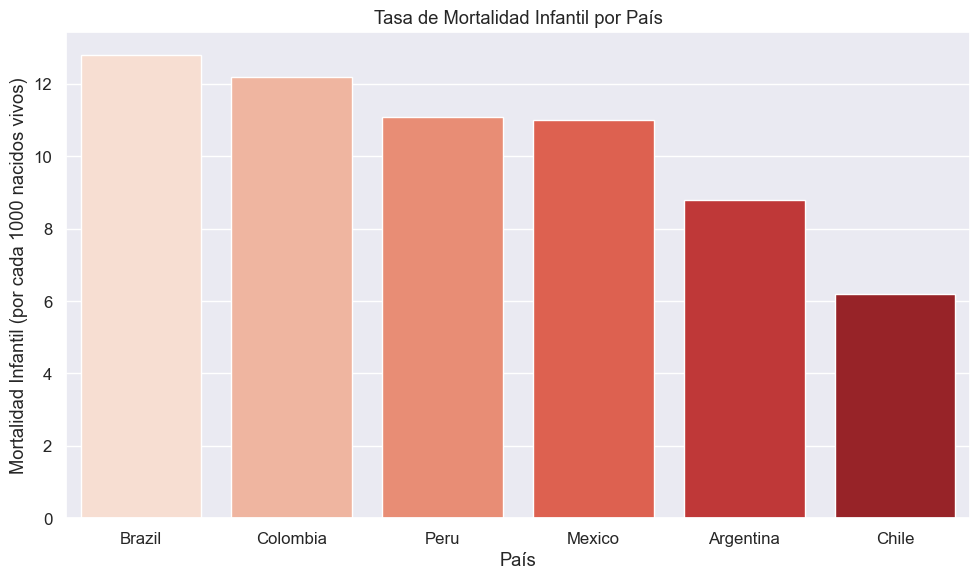

In [144]:
# Nos aseguramos de tener el dato correcto por país
df_mortalidad = df.groupby('country_name')['infant_mortality_rate'].max().reset_index()

# Seleccionamos los países a analizar
paises = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
df_mortalidad = df_mortalidad[df_mortalidad['country_name'].isin(paises)]

# Ordenamos los países por tasa de mortalidad descendente
df_mortalidad = df_mortalidad.sort_values(by='infant_mortality_rate', ascending=False)

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_mortalidad,
    x='country_name',
    y='infant_mortality_rate',
    palette='Reds'
)
plt.title('Tasa de Mortalidad Infantil por País')
plt.xlabel('País')
plt.ylabel('Mortalidad Infantil (por cada 1000 nacidos vivos)')
plt.tight_layout()
plt.show()


# Evolución mensual de casos y muertes nuevas por país 

In [146]:
# Nos aseguramos de tener la columna year_month ordenada
if 'year_month' not in df.columns:
    df['month_abbr'] = df['date'].dt.strftime('%b')
    df['year'] = df['date'].dt.year
    df['year_month'] = df['year'].astype(str) + '-' + df['month_abbr']

# Agrupamos
mensual_casos_muertes = df.groupby(['country_name', 'year_month', 'year']).agg({
    'new_confirmed': 'sum',
    'new_deceased': 'sum'
}).reset_index()

# Ordenamos year_month cronológicamente
mensual_casos_muertes['date_aux'] = pd.to_datetime(mensual_casos_muertes['year_month'].str.replace('-', ' '), format='%Y %b')
mensual_casos_muertes = mensual_casos_muertes.sort_values(['country_name', 'date_aux'])
orden_year_month = mensual_casos_muertes['year_month'].drop_duplicates().sort_values(
    key=lambda x: pd.to_datetime(x.str.replace('-', ' '), format='%Y %b')
)
mensual_casos_muertes['year_month'] = pd.Categorical(
    mensual_casos_muertes['year_month'],
    categories=orden_year_month,
    ordered=True
)


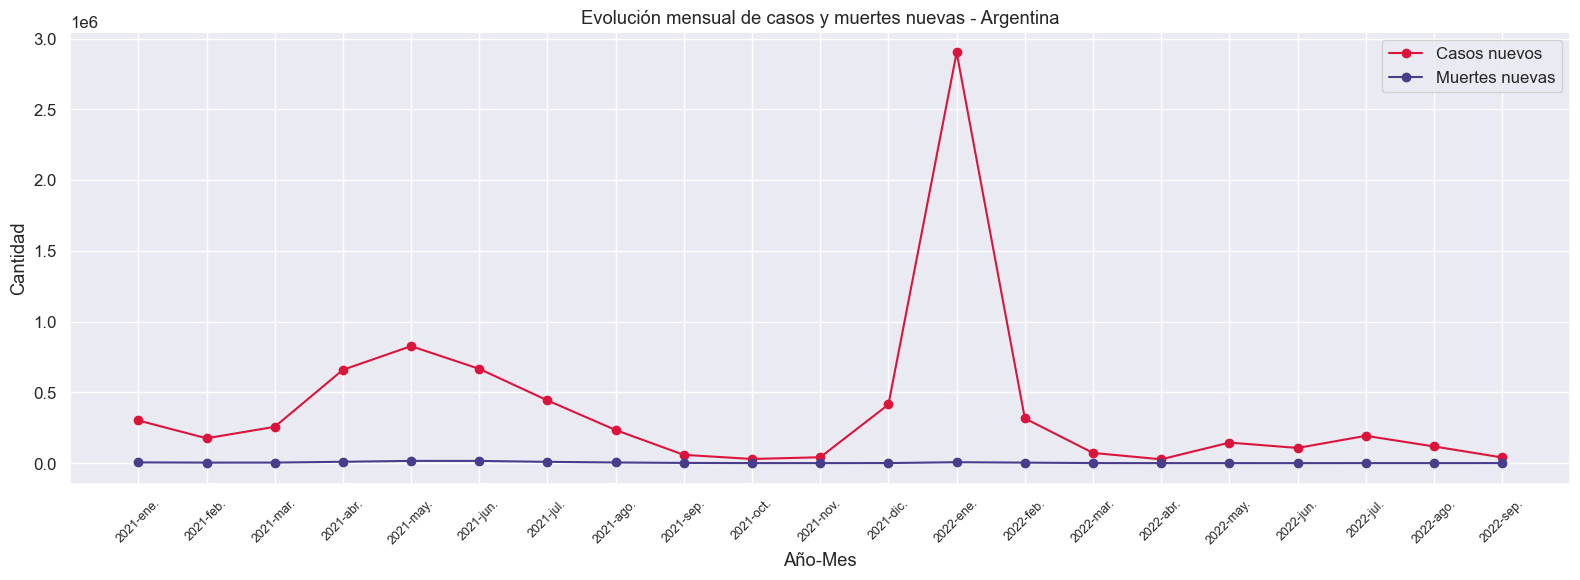

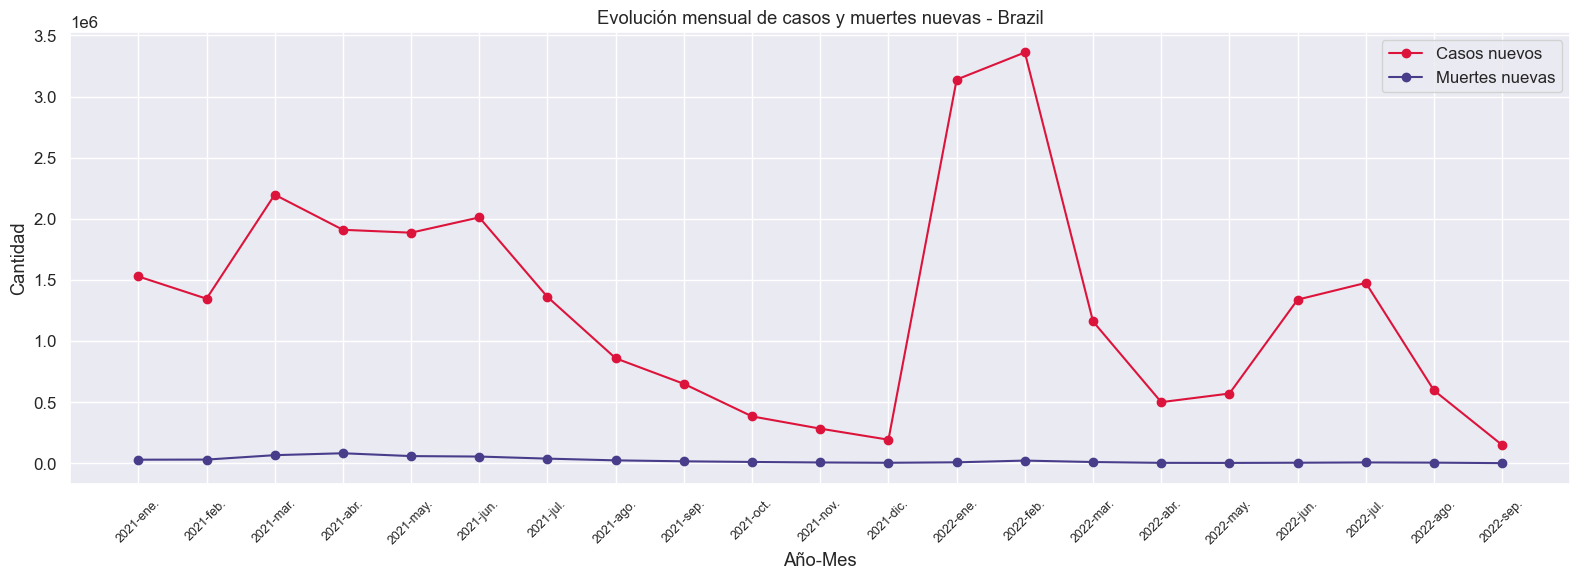

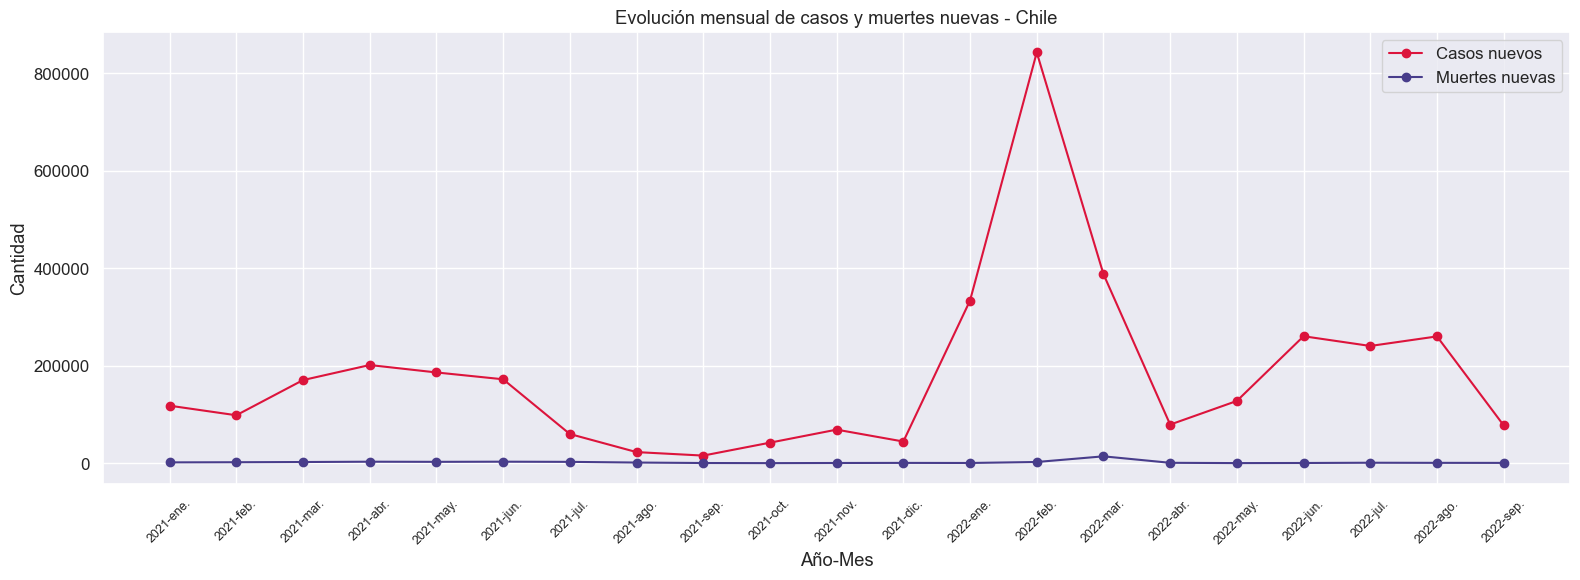

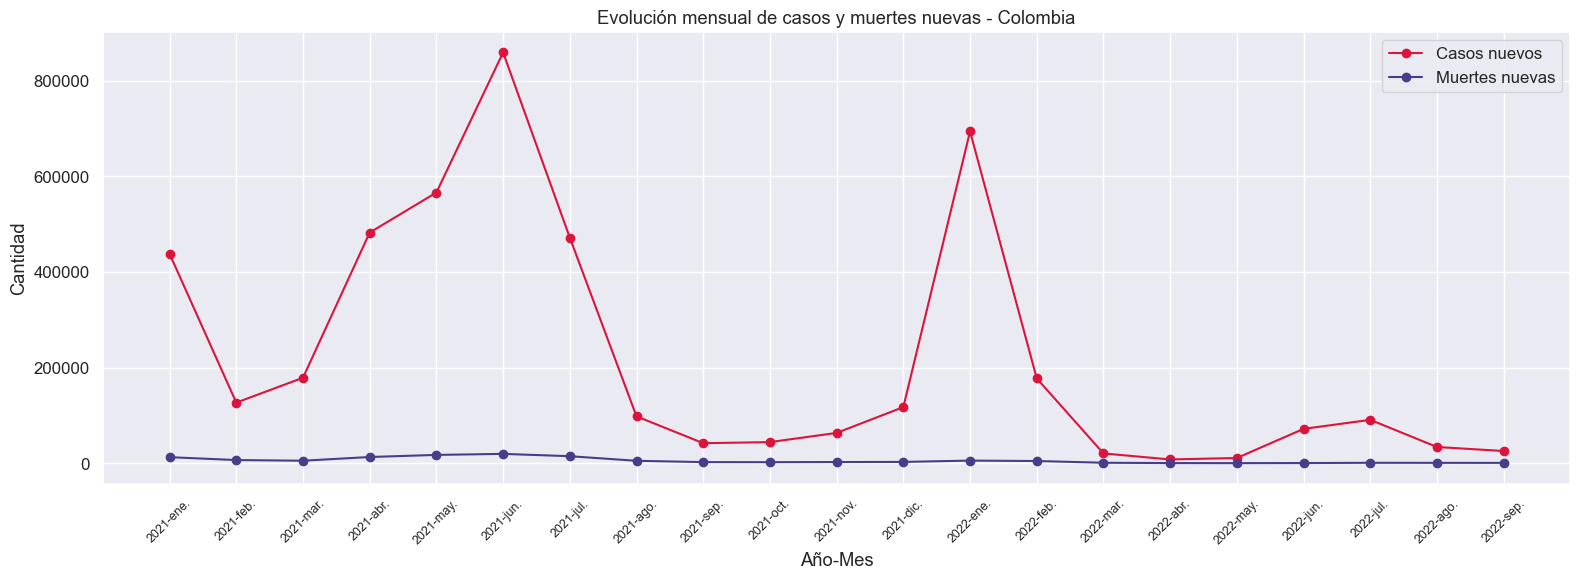

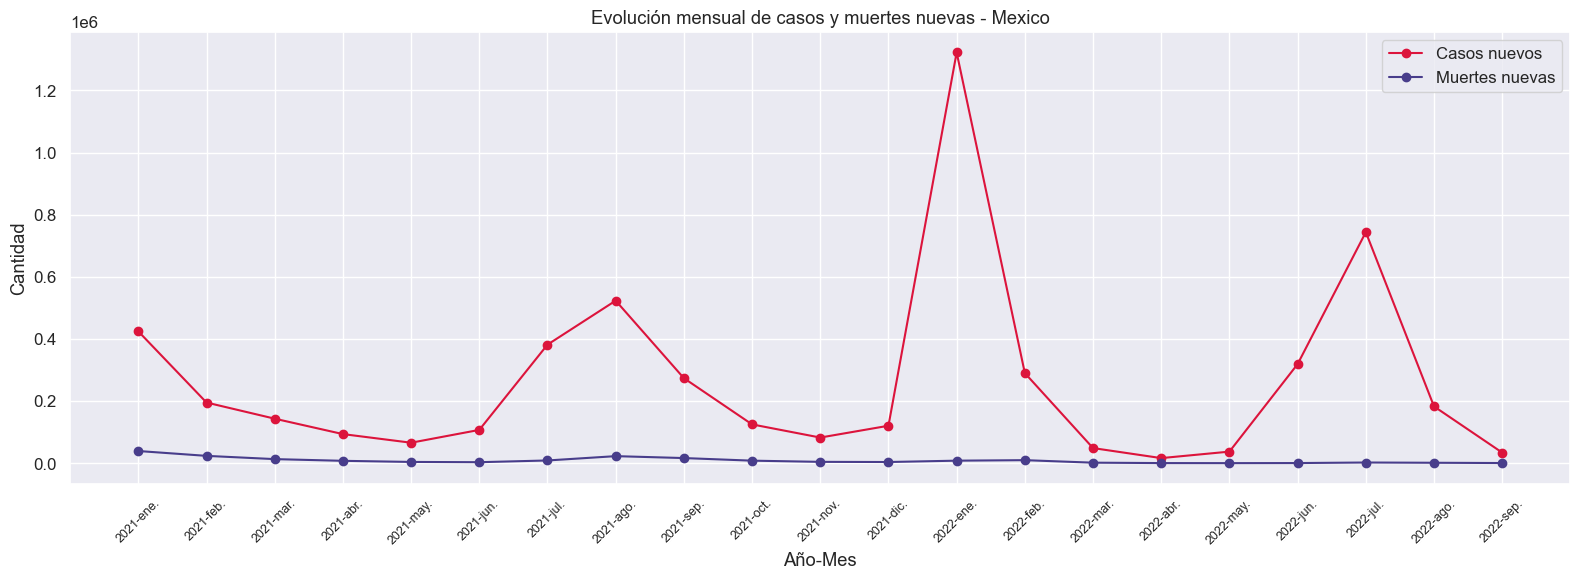

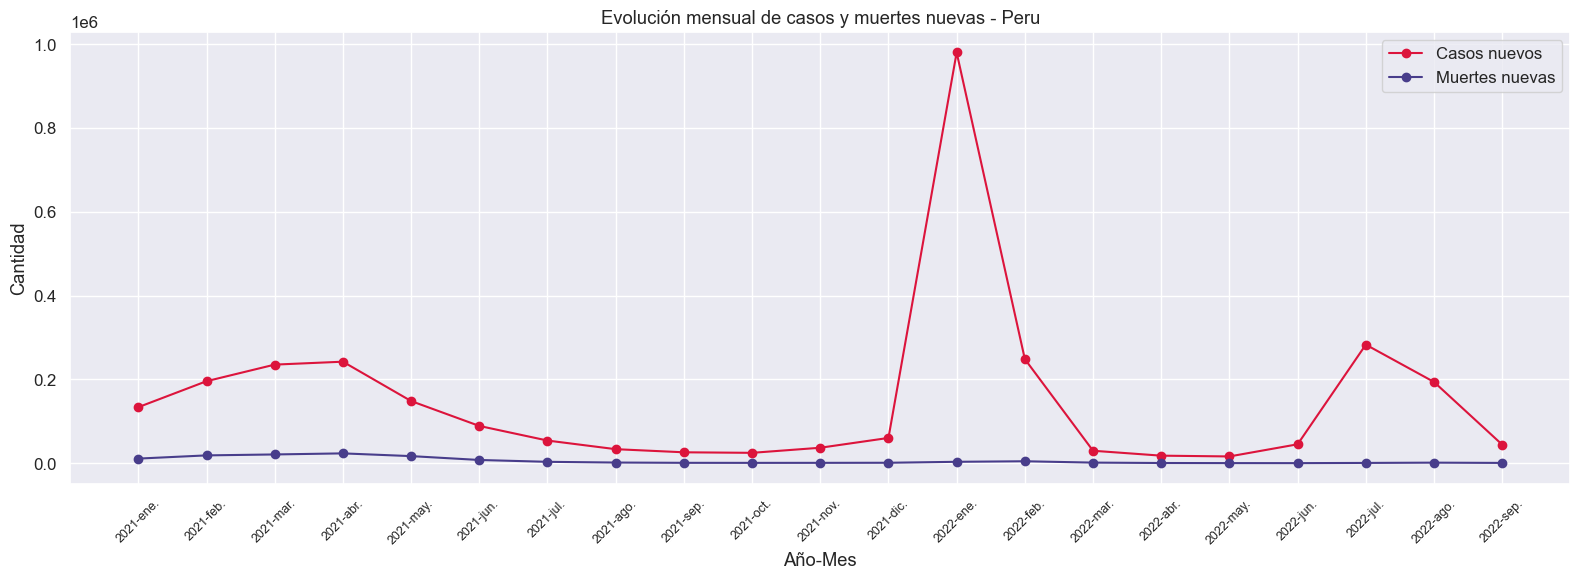

In [147]:

paises = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']

for pais in paises:
    datos = mensual_casos_muertes[mensual_casos_muertes['country_name'] == pais]
    plt.figure(figsize=(16, 6))
    plt.plot(datos['year_month'], datos['new_confirmed'], marker='o', label='Casos nuevos', color='crimson')
    plt.plot(datos['year_month'], datos['new_deceased'], marker='o', label='Muertes nuevas', color='darkslateblue')
    plt.title(f'Evolución mensual de casos y muertes nuevas - {pais}')
    plt.xlabel('Año-Mes')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45, fontsize=9)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Tasa de letalidad mensual (%) por país

In [148]:
# Nos aseguramos de tener los datos agrupados por país y mes
# (Ya lo tienes como 'mensual_casos_muertes' de la celda anterior)

# Calculamos la tasa de letalidad (%) por mes y país
mensual_casos_muertes['letalidad'] = (mensual_casos_muertes['new_deceased'] / mensual_casos_muertes['new_confirmed']) * 100

# Opcional: si hay infinitos o NaN, los reemplazamos por 0 para evitar errores al graficar
mensual_casos_muertes['letalidad'] = mensual_casos_muertes['letalidad'].replace([np.inf, -np.inf], np.nan).fillna(0)


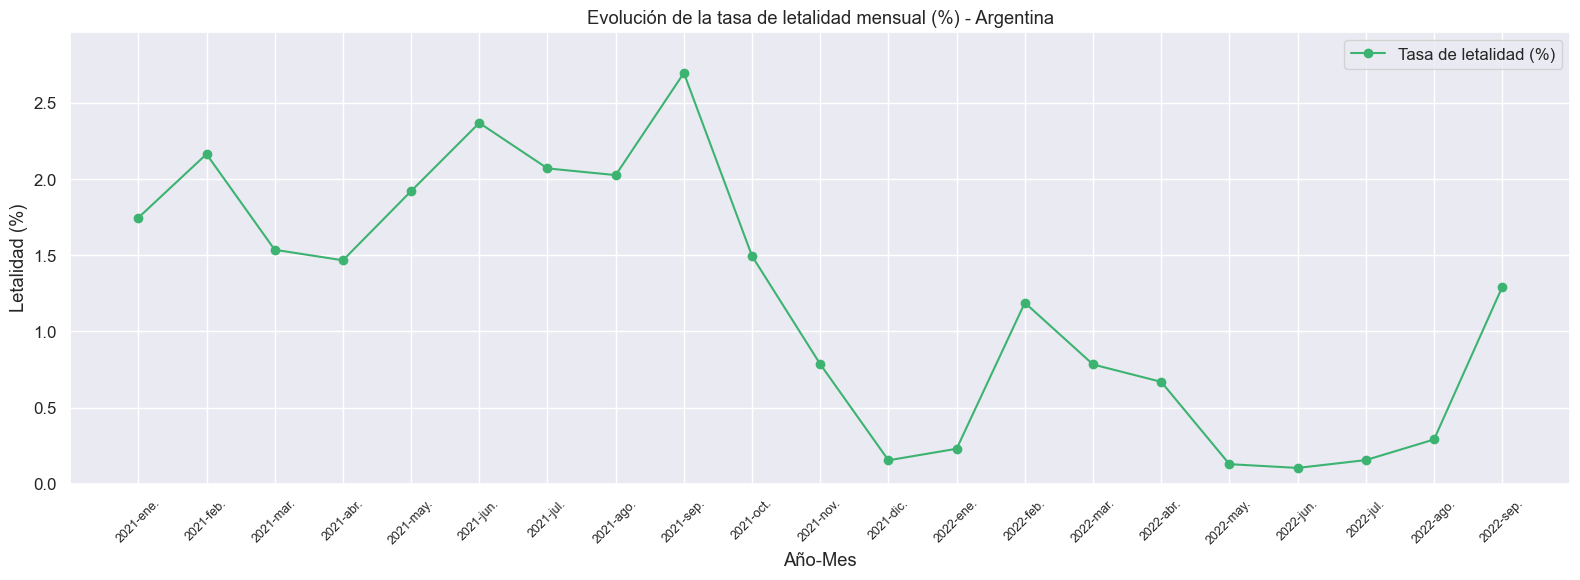

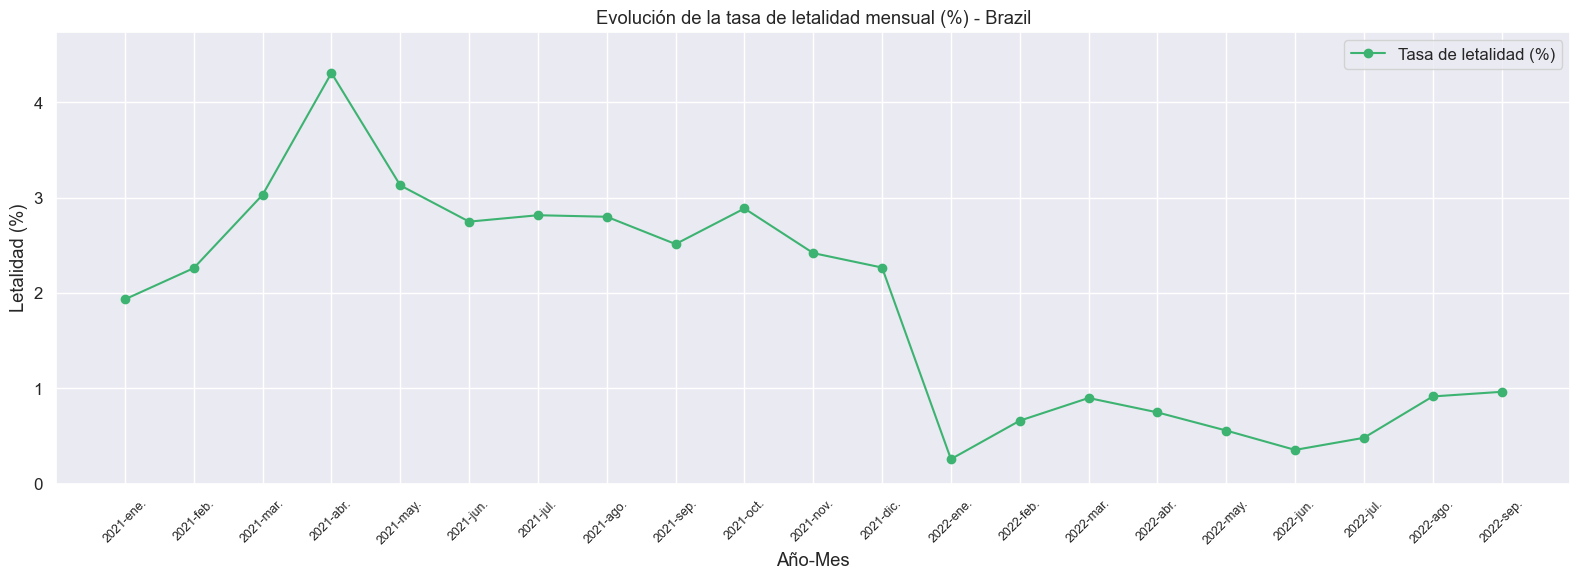

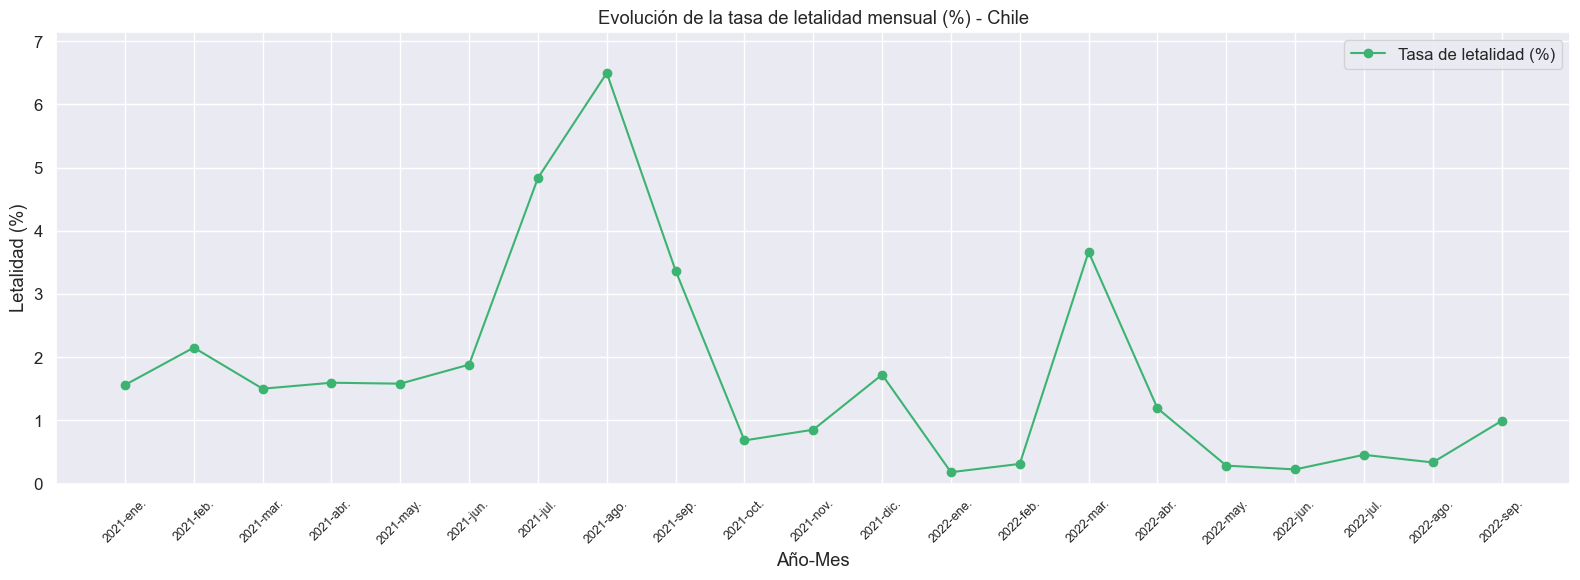

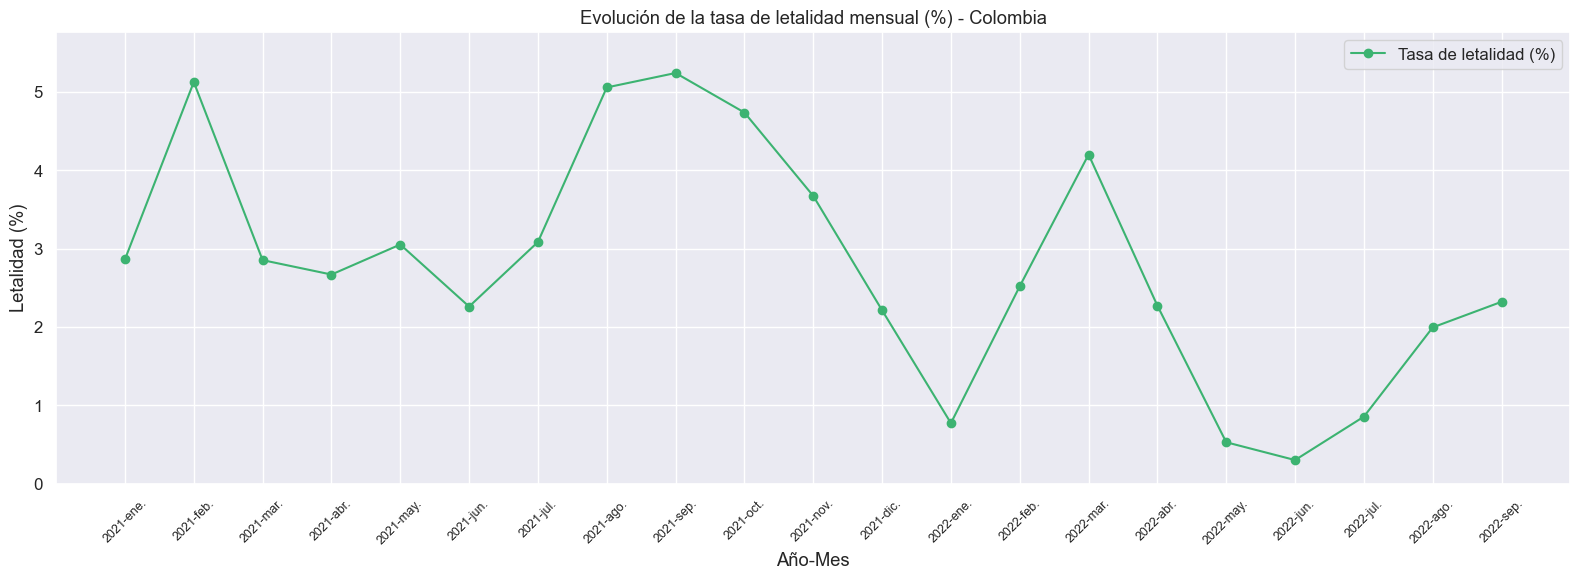

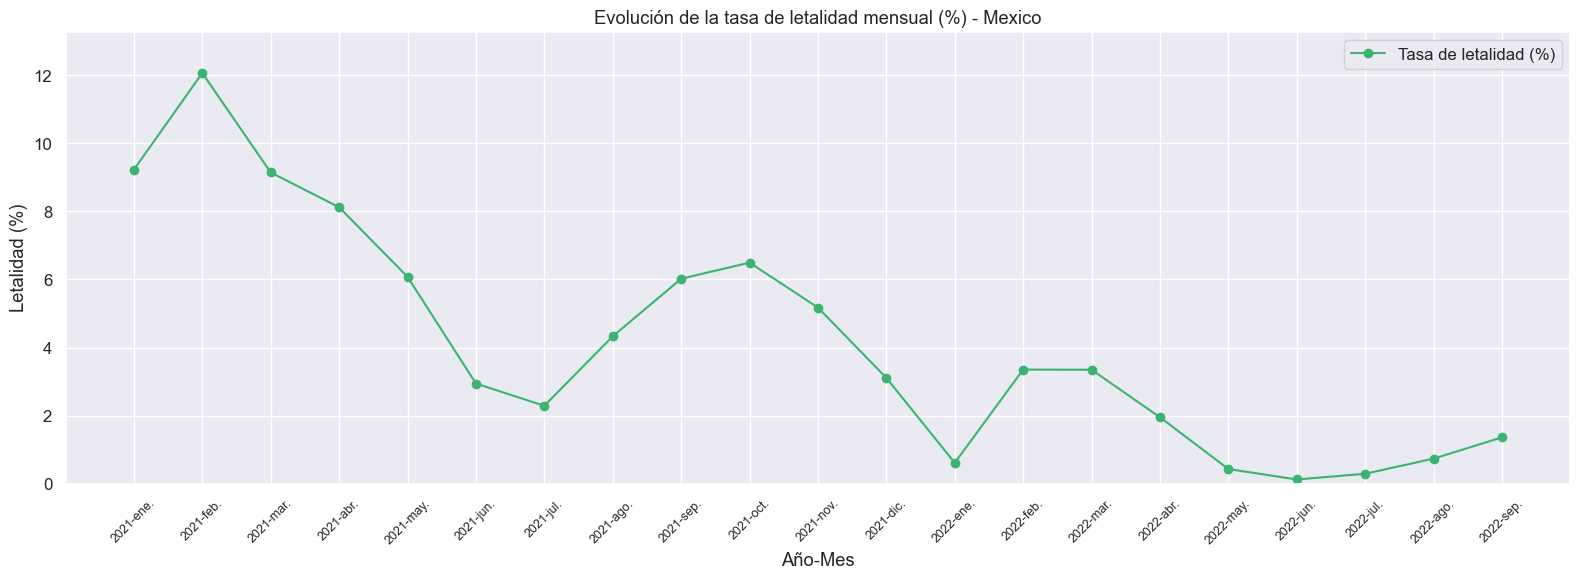

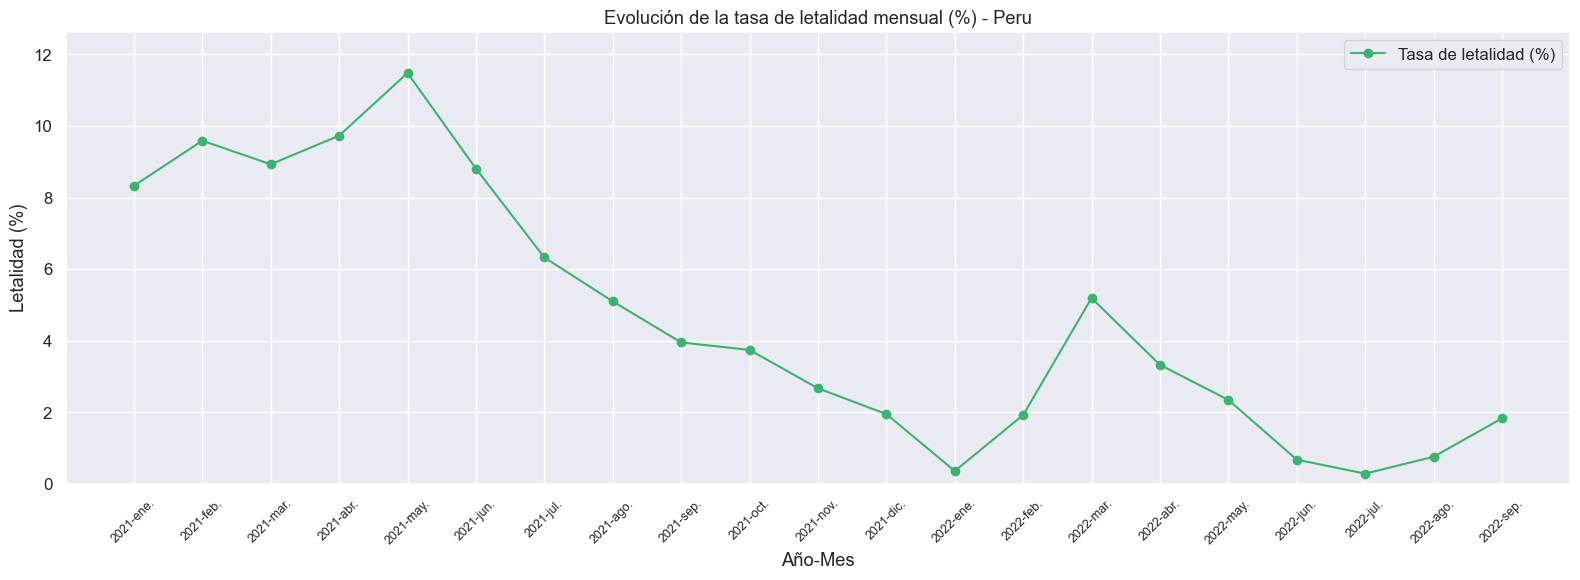

In [149]:
paises = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']

for pais in paises:
    datos = mensual_casos_muertes[mensual_casos_muertes['country_name'] == pais]
    plt.figure(figsize=(16, 6))
    plt.plot(datos['year_month'], datos['letalidad'], marker='o', color='mediumseagreen', label='Tasa de letalidad (%)')
    plt.title(f'Evolución de la tasa de letalidad mensual (%) - {pais}')
    plt.xlabel('Año-Mes')
    plt.ylabel('Letalidad (%)')
    plt.xticks(rotation=45, fontsize=9)
    plt.ylim(0, datos['letalidad'].max() * 1.1)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Comparación de la situación actual (contexto de los datos)
Esto puede implicar:

Comparar la situación al final del período analizado (por ejemplo, el último mes disponible) en cada país.

Mostrar, para cada país, un resumen de indicadores clave:

Casos nuevos,

Muertes nuevas,

Cobertura de vacunación,

Tasa de letalidad,

(Puedes sumar población, incidencia, etc.)



In [150]:
# Seleccionamos el último mes disponible en el dataset
ultimo_mes = mensual_casos_muertes['date_aux'].max()
print(f'Último mes de datos: {ultimo_mes}')

# Merge para traer también la cobertura de vacunación del último mes de cada país
df_final_mes = mensual_casos_muertes[mensual_casos_muertes['date_aux'] == ultimo_mes][
    ['country_name', 'year_month', 'new_confirmed', 'new_deceased', 'letalidad']
]

# Buscamos la cobertura de vacunación correspondiente a ese mes y país
df_cobertura = mensual[['country_name', 'year_month', 'cobertura_vac', 'date_aux']]
df_cobertura_ultimo = df_cobertura[df_cobertura['date_aux'] == ultimo_mes][['country_name', 'cobertura_vac']]

# Unimos
df_final_mes = df_final_mes.merge(df_cobertura_ultimo, on='country_name', how='left')

# Mostramos la tabla
import pandas as pd
print('\nComparación de la situación actual (último mes disponible):')
display(df_final_mes)


Último mes de datos: 2022-09-01 00:00:00

Comparación de la situación actual (último mes disponible):


country_name year_month  new_confirmed  new_deceased  letalidad  \
0    Argentina  2022-sep.        40194.0         519.0   1.291237   
1       Brazil  2022-sep.       149308.0        1438.0   0.963110   
2        Chile  2022-sep.        77664.0         771.0   0.992738   
3     Colombia  2022-sep.        25378.0         589.0   2.320908   
4       Mexico  2022-sep.        34018.0         463.0   1.361044   
5         Peru  2022-sep.        44394.0         811.0   1.826823   

   cobertura_vac  
0     243.008355  
1     163.657061  
2     353.955983  
3      82.998644  
4     188.908841  
5     284.613927

# Gráfico de barras: Letalidad (%) del último mes

C:\Users\Fernando\AppData\Local\Temp\ipykernel_16376\1546134327.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


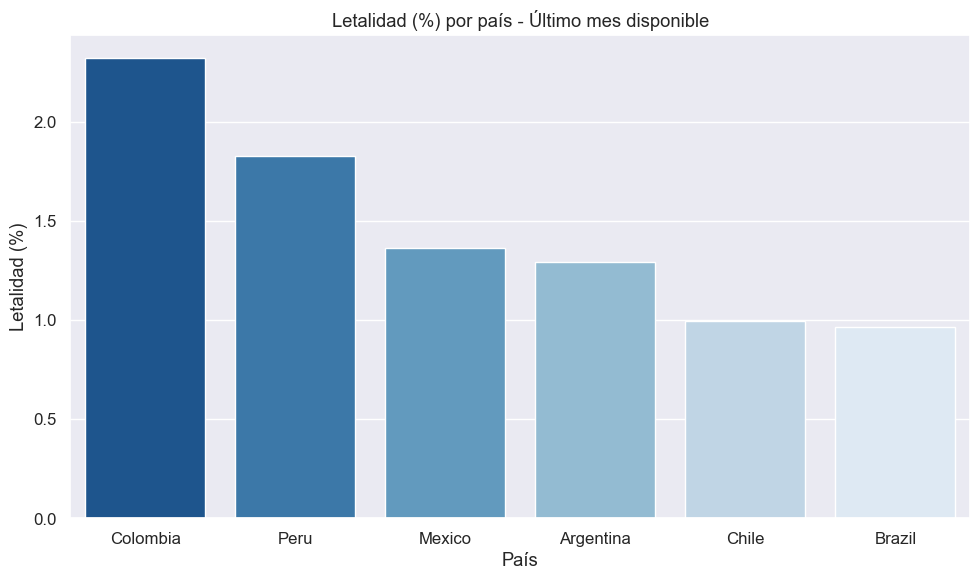

In [151]:
# Ordenamos de mayor a menor letalidad
df_let = df_final_mes.sort_values(by='letalidad', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_let,
    x='country_name',
    y='letalidad',
    palette='Blues_r'
)
plt.title('Letalidad (%) por país - Último mes disponible')
plt.xlabel('País')
plt.ylabel('Letalidad (%)')
plt.tight_layout()
plt.show()


# Gráfico de barras: Cobertura de vacunación (%) del último mes

C:\Users\Fernando\AppData\Local\Temp\ipykernel_16376\823506713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


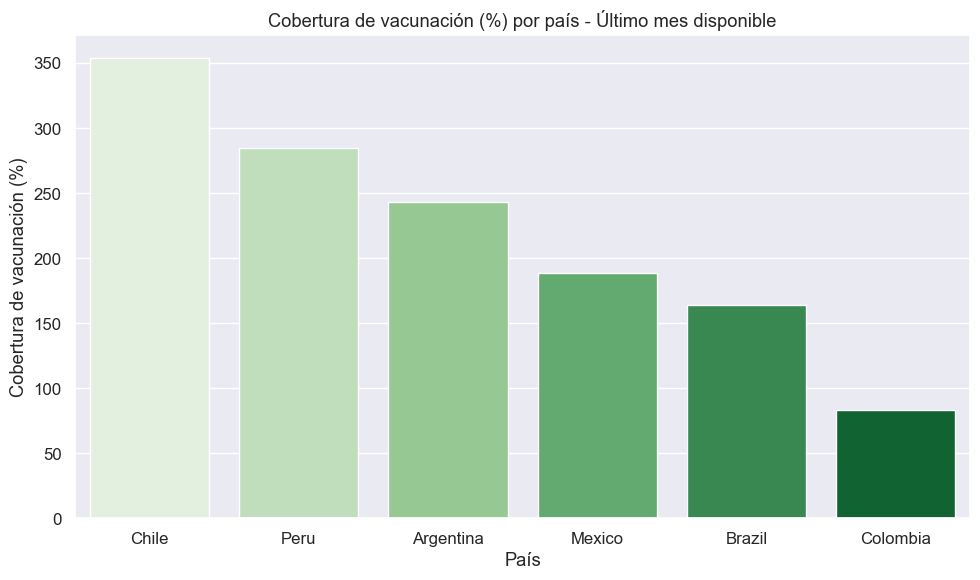

In [152]:
# Ordenamos de mayor a menor cobertura
df_cob = df_final_mes.sort_values(by='cobertura_vac', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_cob,
    x='country_name',
    y='cobertura_vac',
    palette='Greens'
)
plt.title('Cobertura de vacunación (%) por país - Último mes disponible')
plt.xlabel('País')
plt.ylabel('Cobertura de vacunación (%)')
plt.tight_layout()
plt.show()


# __________________________________________________________________________________________

AGREGACION PARA CORREGUIR !